<div class="alert alert-block alert-info">

# Imports

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, RMSprop
from keras.activations import relu, elu
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


<div class="alert alert-block alert-info">

# Dataframes

</div>

In [2]:
df_features = pd.read_csv('./dataset/ted_main_features.csv',sep="|",quotechar='"')

In [3]:
df_features.columns

Index(['comments', 'duration', 'languages', 'num_speaker', 'views',
       'film_month', 'film_dayofweek', 'published_month',
       'published_dayofweek', 'event_TED',
       ...
       'york', 'yorker', 'young', 'youth', 'youtube', 'ze', 'zero', 'zimbardo',
       'zipcar', 'zone'],
      dtype='object', length=4122)

In [4]:
df_features.shape

(2550, 4122)

In [5]:
df_features.head()

,comments,duration,languages,num_speaker,views,film_month,film_dayofweek,published_month,published_dayofweek,event_TED,...,york,yorker,young,youth,youtube,ze,zero,zimbardo,zipcar,zone
0,10,810,1,1,418368,8,5,9,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,795,1,1,542088,8,5,9,4,1,...,0,0,0,0,0,0,0,0,0,0
2,8,723,4,1,707788,8,5,9,4,1,...,1,0,0,0,0,0,0,0,0,0
3,10,934,2,1,527314,8,5,9,2,1,...,0,0,0,0,0,0,0,0,0,0
4,33,722,4,1,613915,7,2,9,3,1,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info">

# Dummies

</div>

## Create Dummies

In [6]:
df_film_month = pd.get_dummies(df_features['film_month'],prefix='film_month',drop_first=True)
df_published_month = pd.get_dummies(df_features['published_month'],prefix='published_month',drop_first=True)

df_film_day = pd.get_dummies(df_features['film_dayofweek'],prefix='film_dayofweek',drop_first=True)
df_published_day = pd.get_dummies(df_features['published_dayofweek'],prefix='published_dayofweek',drop_first=True)

In [7]:
df_film_month.head(2)

,film_month_2,film_month_3,film_month_4,film_month_5,film_month_6,film_month_7,film_month_8,film_month_9,film_month_10,film_month_11,film_month_12
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0


In [8]:
df_film_day.head(2)

,film_dayofweek_1,film_dayofweek_2,film_dayofweek_3,film_dayofweek_4,film_dayofweek_5,film_dayofweek_6
0,0,0,0,0,1,0
1,0,0,0,0,1,0


In [9]:
print(df_film_month.shape)
print(df_film_day.shape)

(2550, 11)
(2550, 6)


In [10]:
df_published_month.head(2)

,published_month_2,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0


In [11]:
df_published_day.head(2)

,published_dayofweek_1,published_dayofweek_2,published_dayofweek_3,published_dayofweek_4,published_dayofweek_5,published_dayofweek_6
0,1,0,0,0,0,0
1,0,0,0,1,0,0


In [12]:
print(df_published_month.shape)
print(df_published_day.shape)

(2550, 11)
(2550, 6)


## Drop Columns

In [13]:
df_features = df_features.drop(columns=['film_month','film_dayofweek','published_month','published_dayofweek','duration'])
df_features.head()

,comments,languages,num_speaker,views,event_TED,event_TEDx,event_noTED,previous_talks,previous_talk_views,previous_views_sum,...,york,yorker,young,youth,youtube,ze,zero,zimbardo,zipcar,zone
0,10,1,1,418368,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,542088,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,4,1,707788,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,10,2,1,527314,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,4,1,613915,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Join Dummies

In [14]:
df_features = df_features.merge(df_film_month, left_index=True, right_index=True)
df_features = df_features.merge(df_published_month, left_index=True, right_index=True)
df_features = df_features.merge(df_film_day, left_index=True, right_index=True)
df_features = df_features.merge(df_published_day, left_index=True, right_index=True)
df_features.head()

,comments,languages,num_speaker,views,event_TED,event_TEDx,event_noTED,previous_talks,previous_talk_views,previous_views_sum,...,film_dayofweek_3,film_dayofweek_4,film_dayofweek_5,film_dayofweek_6,published_dayofweek_1,published_dayofweek_2,published_dayofweek_3,published_dayofweek_4,published_dayofweek_5,published_dayofweek_6
0,10,1,1,418368,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,3,1,1,542088,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,8,4,1,707788,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,2,1,527314,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,33,4,1,613915,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<div class="alert alert-block alert-info">

# Train, Test, Split

</div>

In [15]:
# Generamos la matriz X y el vector y
X = df_features.drop(columns=['views'])
y = df_features['views']

In [16]:
# Separamos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
# Estandarizamos las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Chequeamos las shapes
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (1785, 4150)
X test shape:  (765, 4150)
y train shape:  (1785,)
y test shape:  (765,)


In [18]:
from keras import backend as K

def r2_for_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [19]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae',r2_for_keras])

In [20]:
# Instanciamos nuestro objeto earlystopping y definimos nuestra lista de callbacks
early_stopping = EarlyStopping(monitor='val_mean_absolute_error', min_delta=200e3, patience=4, 
                               verbose=0, restore_best_weights=True, mode='min')
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', min_delta=200e3, patience=4,
#                             factor=0.01, mode='min')
#callbacks_list = [early_stopping, reduce_lr]
callbacks_list = [early_stopping]

In [21]:
history = model.fit(X_train, y_train, batch_size=32, epochs=3000, validation_split = 0.3, 
                    verbose=1)

Train on 1249 samples, validate on 536 samples
Epoch 1/3000
1249/1249 [==============================] - 2s 2ms/step - loss: 8938851963480.1348 - mean_absolute_error: 1669195.2506 - r2_for_keras: -15804484014651488.0000 - val_loss: 8088665409688.8359 - val_mean_absolute_error: 1653097.3731 - val_r2_for_keras: -1.5261
Epoch 2/3000
1249/1249 [==============================] - 0s 350us/step - loss: 8938851284193.4609 - mean_absolute_error: 1669195.0450 - r2_for_keras: -47236533668568232.0000 - val_loss: 8088664901051.2236 - val_mean_absolute_error: 1653097.1306 - val_r2_for_keras: -1.5261
Epoch 3/3000
1249/1249 [==============================] - 0s 348us/step - loss: 8938850874606.5781 - mean_absolute_error: 1669194.9281 - r2_for_keras: -16508440832375364.0000 - val_loss: 8088664024629.4922 - val_mean_absolute_error: 1653096.9739 - val_r2_for_keras: -1.5261
Epoch 4/3000
1249/1249 [==============================] - 0s 344us/step - loss: 8938850083635.8555 - mean_absolute_error: 1669194.687

Epoch 31/3000
1249/1249 [==============================] - 0s 339us/step - loss: 8938566407019.6055 - mean_absolute_error: 1669121.0623 - r2_for_keras: -11893123252926270.0000 - val_loss: 8088480148220.1787 - val_mean_absolute_error: 1653045.8172 - val_r2_for_keras: -1.5260
Epoch 32/3000
1249/1249 [==============================] - 0s 337us/step - loss: 8938526670585.6465 - mean_absolute_error: 1669110.9421 - r2_for_keras: -20393190595705032.0000 - val_loss: 8088453448658.1494 - val_mean_absolute_error: 1653038.4366 - val_r2_for_keras: -1.5260
Epoch 33/3000
1249/1249 [==============================] - 0s 346us/step - loss: 8938470057228.0938 - mean_absolute_error: 1669096.1232 - r2_for_keras: -1456778520307967.7500 - val_loss: 8088423149506.8652 - val_mean_absolute_error: 1653030.4142 - val_r2_for_keras: -1.5260
Epoch 34/3000
1249/1249 [==============================] - 0s 343us/step - loss: 8938426510615.5703 - mean_absolute_error: 1669081.7689 - r2_for_keras: -2622401475840629.0000 -

Epoch 61/3000
1249/1249 [==============================] - 0s 360us/step - loss: 8928744484355.6895 - mean_absolute_error: 1666820.5206 - r2_for_keras: -7137429993992158.0000 - val_loss: 8084598515498.0303 - val_mean_absolute_error: 1652093.2239 - val_r2_for_keras: -1.5238
Epoch 62/3000
1249/1249 [==============================] - 0s 355us/step - loss: 8928006505602.3574 - mean_absolute_error: 1666644.0004 - r2_for_keras: -14514741909939838.0000 - val_loss: 8084285985073.6719 - val_mean_absolute_error: 1652019.3918 - val_r2_for_keras: -1.5236
Epoch 63/3000
1249/1249 [==============================] - 0s 349us/step - loss: 8926812502476.7578 - mean_absolute_error: 1666419.0614 - r2_for_keras: -2092013440433574.2500 - val_loss: 8083957514729.0742 - val_mean_absolute_error: 1651941.7724 - val_r2_for_keras: -1.5234
Epoch 64/3000
1249/1249 [==============================] - 0s 343us/step - loss: 8926010575554.7148 - mean_absolute_error: 1666197.8297 - r2_for_keras: -2342138470814153.5000 - 

Epoch 91/3000
1249/1249 [==============================] - 0s 347us/step - loss: 8864114980616.4023 - mean_absolute_error: 1653215.5445 - r2_for_keras: -4550455196545842.0000 - val_loss: 8064121704264.5967 - val_mean_absolute_error: 1647401.7201 - val_r2_for_keras: -1.5129
Epoch 92/3000
1249/1249 [==============================] - 0s 351us/step - loss: 8863003260496.7559 - mean_absolute_error: 1652585.7780 - r2_for_keras: -10925012507961810.0000 - val_loss: 8062929535954.1494 - val_mean_absolute_error: 1647133.7500 - val_r2_for_keras: -1.5123
Epoch 93/3000
1249/1249 [==============================] - 0s 355us/step - loss: 8858241433416.3516 - mean_absolute_error: 1651670.5825 - r2_for_keras: -9352744332157146.0000 - val_loss: 8061744879829.9697 - val_mean_absolute_error: 1646863.0261 - val_r2_for_keras: -1.5117
Epoch 94/3000
1249/1249 [==============================] - 0s 344us/step - loss: 8856140670482.4473 - mean_absolute_error: 1650853.3514 - r2_for_keras: -8688027491061064.0000 - 

Epoch 121/3000
1249/1249 [==============================] - 0s 349us/step - loss: 8678156651294.5391 - mean_absolute_error: 1612331.2369 - r2_for_keras: -6001607192779405.0000 - val_loss: 8005529476264.1191 - val_mean_absolute_error: 1634224.7295 - val_r2_for_keras: -1.4829
Epoch 122/3000
1249/1249 [==============================] - 0s 355us/step - loss: 8671514943205.9697 - mean_absolute_error: 1610347.0576 - r2_for_keras: -673238508692513280.0000 - val_loss: 8002703219635.5820 - val_mean_absolute_error: 1633581.8451 - val_r2_for_keras: -1.4814
Epoch 123/3000
1249/1249 [==============================] - 0s 355us/step - loss: 8670183270155.6836 - mean_absolute_error: 1608986.5212 - r2_for_keras: -405889817930236864.0000 - val_loss: 7999616141464.8359 - val_mean_absolute_error: 1632888.3638 - val_r2_for_keras: -1.4799
Epoch 124/3000
1249/1249 [==============================] - 0s 354us/step - loss: 8657353317763.7920 - mean_absolute_error: 1605980.3653 - r2_for_keras: -61180052438315064

Epoch 151/3000
1249/1249 [==============================] - 0s 345us/step - loss: 8286998469311.4365 - mean_absolute_error: 1530279.5646 - r2_for_keras: -17556292139603398.0000 - val_loss: 7887307352583.6416 - val_mean_absolute_error: 1607544.1660 - val_r2_for_keras: -1.4238
Epoch 152/3000
1249/1249 [==============================] - 0s 346us/step - loss: 8292184281307.7217 - mean_absolute_error: 1523123.9081 - r2_for_keras: -6654275182274710.0000 - val_loss: 7881700100248.8359 - val_mean_absolute_error: 1606297.7295 - val_r2_for_keras: -1.4211
Epoch 153/3000
1249/1249 [==============================] - 0s 347us/step - loss: 8234392949231.1934 - mean_absolute_error: 1517368.8768 - r2_for_keras: -2694869987920737.5000 - val_loss: 7876086955542.9258 - val_mean_absolute_error: 1605028.0989 - val_r2_for_keras: -1.4183
Epoch 154/3000
1249/1249 [==============================] - 0s 356us/step - loss: 8215458036671.2324 - mean_absolute_error: 1512282.7189 - r2_for_keras: -3450088124074652.500

Epoch 181/3000
1249/1249 [==============================] - 0s 343us/step - loss: 7561802760474.0303 - mean_absolute_error: 1372373.0225 - r2_for_keras: -802785383817315.1250 - val_loss: 7678996790562.3877 - val_mean_absolute_error: 1560037.2705 - val_r2_for_keras: -1.3235
Epoch 182/3000
1249/1249 [==============================] - 0s 342us/step - loss: 7546476973643.8369 - mean_absolute_error: 1359022.3429 - r2_for_keras: -7314284546645787.0000 - val_loss: 7670364811202.8652 - val_mean_absolute_error: 1558071.4160 - val_r2_for_keras: -1.3194
Epoch 183/3000
1249/1249 [==============================] - 0s 346us/step - loss: 7506888559010.1260 - mean_absolute_error: 1358350.4104 - r2_for_keras: -9434595886320966.0000 - val_loss: 7661996720861.6123 - val_mean_absolute_error: 1556157.0392 - val_r2_for_keras: -1.3155
Epoch 184/3000
1249/1249 [==============================] - 0s 344us/step - loss: 7412000632192.5117 - mean_absolute_error: 1348555.3415 - r2_for_keras: -67791376242022256.0000

Epoch 211/3000
1249/1249 [==============================] - 0s 342us/step - loss: 6835523746633.1719 - mean_absolute_error: 1153295.4690 - r2_for_keras: -101253164855236944.0000 - val_loss: 7393469107551.5225 - val_mean_absolute_error: 1495679.1026 - val_r2_for_keras: -1.1930
Epoch 212/3000
1249/1249 [==============================] - 0s 341us/step - loss: 6669389582863.9873 - mean_absolute_error: 1142944.0187 - r2_for_keras: -373890431060229.0625 - val_loss: 7382603872592.2393 - val_mean_absolute_error: 1493308.4235 - val_r2_for_keras: -1.1882
Epoch 213/3000
1249/1249 [==============================] - 0s 352us/step - loss: 6649102627632.5771 - mean_absolute_error: 1128079.4293 - r2_for_keras: -18580241173238660.0000 - val_loss: 7371867902013.1348 - val_mean_absolute_error: 1490968.0410 - val_r2_for_keras: -1.1835
Epoch 214/3000
1249/1249 [==============================] - 0s 340us/step - loss: 6502288166095.4229 - mean_absolute_error: 1121315.2243 - r2_for_keras: -4858005941011783.00

Epoch 241/3000
1249/1249 [==============================] - 0s 346us/step - loss: 5641748389510.5078 - mean_absolute_error: 921995.8486 - r2_for_keras: -2382923894623.3032 - val_loss: 7055399527011.3438 - val_mean_absolute_error: 1426697.7668 - val_r2_for_keras: -1.0524
Epoch 242/3000
1249/1249 [==============================] - 0s 350us/step - loss: 5781888261191.3271 - mean_absolute_error: 911756.6075 - r2_for_keras: -192840180218605.3438 - val_loss: 7044581235391.0449 - val_mean_absolute_error: 1424938.9403 - val_r2_for_keras: -1.0482
Epoch 243/3000
1249/1249 [==============================] - 0s 342us/step - loss: 5625501751041.8447 - mean_absolute_error: 906577.2589 - r2_for_keras: -637637846007886.7500 - val_loss: 7034892228821.9697 - val_mean_absolute_error: 1423368.5933 - val_r2_for_keras: -1.0444
Epoch 244/3000
1249/1249 [==============================] - 0s 341us/step - loss: 5551219261111.4424 - mean_absolute_error: 913613.4301 - r2_for_keras: -10639755876163.4160 - val_loss

Epoch 271/3000
1249/1249 [==============================] - 0s 346us/step - loss: 4961160235399.8916 - mean_absolute_error: 790520.9271 - r2_for_keras: -7684267765641988096.0000 - val_loss: 6743110071678.0898 - val_mean_absolute_error: 1383851.3134 - val_r2_for_keras: -0.9422
Epoch 272/3000
1249/1249 [==============================] - 0s 345us/step - loss: 4734241981894.2002 - mean_absolute_error: 779776.8337 - r2_for_keras: -95855671572796.2188 - val_loss: 6729062040774.6865 - val_mean_absolute_error: 1382269.0840 - val_r2_for_keras: -0.9380
Epoch 273/3000
1249/1249 [==============================] - 0s 347us/step - loss: 5226433092825.2617 - mean_absolute_error: 802502.1667 - r2_for_keras: -1696485479944818.0000 - val_loss: 6722942739043.3438 - val_mean_absolute_error: 1381560.0821 - val_r2_for_keras: -0.9361
Epoch 274/3000
1249/1249 [==============================] - 0s 355us/step - loss: 4789622694497.9727 - mean_absolute_error: 794967.4972 - r2_for_keras: -13047669443099124.0000 -

Epoch 301/3000
1249/1249 [==============================] - 0s 347us/step - loss: 4632846410987.7090 - mean_absolute_error: 771687.3658 - r2_for_keras: -34554174185307.7773 - val_loss: 6551208659830.4482 - val_mean_absolute_error: 1365653.6884 - val_r2_for_keras: -0.8873
Epoch 302/3000
1249/1249 [==============================] - 0s 343us/step - loss: 4600218446983.2764 - mean_absolute_error: 796073.6711 - r2_for_keras: -32090094598594160.0000 - val_loss: 6545772364509.6123 - val_mean_absolute_error: 1365202.7966 - val_r2_for_keras: -0.8859
Epoch 303/3000
1249/1249 [==============================] - 0s 345us/step - loss: 4820187501764.3555 - mean_absolute_error: 773054.8234 - r2_for_keras: -51201807858360.5781 - val_loss: 6540188775561.5518 - val_mean_absolute_error: 1364716.0541 - val_r2_for_keras: -0.8845
Epoch 304/3000
1249/1249 [==============================] - 0s 342us/step - loss: 4806446314692.3555 - mean_absolute_error: 765032.2654 - r2_for_keras: -4780977318758.3965 - val_los

Epoch 331/3000
1249/1249 [==============================] - ETA: 0s - loss: 3988076929934.2222 - mean_absolute_error: 756808.8811 - r2_for_keras: 0.406 - 0s 347us/step - loss: 3804205127709.9248 - mean_absolute_error: 757331.6056 - r2_for_keras: -42237485540672.1641 - val_loss: 6384479809474.8652 - val_mean_absolute_error: 1353939.1325 - val_r2_for_keras: -0.8494
Epoch 332/3000
1249/1249 [==============================] - 0s 344us/step - loss: 4498029666126.9111 - mean_absolute_error: 789523.4380 - r2_for_keras: -231319772260041.7812 - val_loss: 6381379115466.5078 - val_mean_absolute_error: 1353711.6511 - val_r2_for_keras: -0.8487
Epoch 333/3000
1249/1249 [==============================] - 0s 363us/step - loss: 4423212549604.5352 - mean_absolute_error: 792270.9668 - r2_for_keras: -36659605062309608.0000 - val_loss: 6376367364309.9697 - val_mean_absolute_error: 1353387.0280 - val_r2_for_keras: -0.8477
Epoch 334/3000
1249/1249 [==============================] - 0s 341us/step - loss: 4080

Epoch 361/3000
1249/1249 [==============================] - 0s 342us/step - loss: 3872888631279.6030 - mean_absolute_error: 777359.5621 - r2_for_keras: -534253437198958.8750 - val_loss: 6248393073006.8057 - val_mean_absolute_error: 1345349.8451 - val_r2_for_keras: -0.8230
Epoch 362/3000
1249/1249 [==============================] - 0s 353us/step - loss: 3520418786983.6602 - mean_absolute_error: 765934.0709 - r2_for_keras: -560725346053123.8125 - val_loss: 6243114596199.1641 - val_mean_absolute_error: 1345060.8078 - val_r2_for_keras: -0.8221
Epoch 363/3000
1249/1249 [==============================] - 0s 344us/step - loss: 3764062379513.8511 - mean_absolute_error: 784386.0943 - r2_for_keras: -10614151784536348.0000 - val_loss: 6238473528396.4180 - val_mean_absolute_error: 1344782.4757 - val_r2_for_keras: -0.8212
Epoch 364/3000
1249/1249 [==============================] - 0s 343us/step - loss: 3918783116064.9990 - mean_absolute_error: 777005.2624 - r2_for_keras: -96998634927355.4219 - val_

Epoch 391/3000
1249/1249 [==============================] - 0s 343us/step - loss: 3402129921137.9600 - mean_absolute_error: 764190.7738 - r2_for_keras: -2014001813988213.2500 - val_loss: 6121814362020.2988 - val_mean_absolute_error: 1337706.2687 - val_r2_for_keras: -0.8000
Epoch 392/3000
1249/1249 [==============================] - 0s 345us/step - loss: 3849863283750.5337 - mean_absolute_error: 764027.1459 - r2_for_keras: -12954056899866378.0000 - val_loss: 6117519422112.4775 - val_mean_absolute_error: 1337444.5429 - val_r2_for_keras: -0.7992
Epoch 393/3000
1249/1249 [==============================] - 0s 344us/step - loss: 3616804633417.1719 - mean_absolute_error: 757588.8499 - r2_for_keras: -11645026244893558.0000 - val_loss: 6114386523518.0898 - val_mean_absolute_error: 1337186.0037 - val_r2_for_keras: -0.7985
Epoch 394/3000
1249/1249 [==============================] - 0s 341us/step - loss: 3411204341182.8218 - mean_absolute_error: 749943.6536 - r2_for_keras: -3694003862808699.0000 -

Epoch 421/3000
1249/1249 [==============================] - 0s 339us/step - loss: 3952767805641.6846 - mean_absolute_error: 783407.0671 - r2_for_keras: -5240257012493237.0000 - val_loss: 6012529861952.9551 - val_mean_absolute_error: 1330077.4515 - val_r2_for_keras: -0.7789
Epoch 422/3000
1249/1249 [==============================] - 0s 344us/step - loss: 3244233154778.4917 - mean_absolute_error: 727481.4503 - r2_for_keras: -12344032598719.0684 - val_loss: 6007707054018.8652 - val_mean_absolute_error: 1329848.9981 - val_r2_for_keras: -0.7781
Epoch 423/3000
1249/1249 [==============================] - 0s 346us/step - loss: 3671299010235.3369 - mean_absolute_error: 751231.2844 - r2_for_keras: -6555927872596813.0000 - val_loss: 6004408453028.2988 - val_mean_absolute_error: 1329582.2500 - val_r2_for_keras: -0.7774
Epoch 424/3000
1249/1249 [==============================] - 0s 341us/step - loss: 3205788468826.5942 - mean_absolute_error: 728676.1470 - r2_for_keras: -4990760305911157.0000 - val

Epoch 451/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2905006199003.7212 - mean_absolute_error: 717493.8463 - r2_for_keras: -6151837102177412.0000 - val_loss: 5893813647696.2393 - val_mean_absolute_error: 1322251.7127 - val_r2_for_keras: -0.7569
Epoch 452/3000
1249/1249 [==============================] - 0s 343us/step - loss: 2966912894368.8457 - mean_absolute_error: 718389.2843 - r2_for_keras: -3184692674467.7729 - val_loss: 5888963741115.2236 - val_mean_absolute_error: 1321985.9235 - val_r2_for_keras: -0.7561
Epoch 453/3000
1249/1249 [==============================] - 0s 341us/step - loss: 3366636304207.1162 - mean_absolute_error: 731409.9443 - r2_for_keras: -7315920574996.5381 - val_loss: 5885590714704.2393 - val_mean_absolute_error: 1321740.8619 - val_r2_for_keras: -0.7554
Epoch 454/3000
1249/1249 [==============================] - 0s 353us/step - loss: 3900659041405.9502 - mean_absolute_error: 738265.2712 - r2_for_keras: -11692281627725.5352 - val_loss:

Epoch 481/3000
1249/1249 [==============================] - 0s 342us/step - loss: 3148146875495.2510 - mean_absolute_error: 747533.1344 - r2_for_keras: -1347227692153.8652 - val_loss: 5797532914214.2090 - val_mean_absolute_error: 1316210.0989 - val_r2_for_keras: -0.7396
Epoch 482/3000
1249/1249 [==============================] - 0s 343us/step - loss: 3331015859364.7910 - mean_absolute_error: 737706.6024 - r2_for_keras: -455618438718836.6875 - val_loss: 5794994116088.3584 - val_mean_absolute_error: 1316008.0354 - val_r2_for_keras: -0.7391
Epoch 483/3000
1249/1249 [==============================] - 0s 339us/step - loss: 3412082888241.6011 - mean_absolute_error: 734348.1354 - r2_for_keras: -334571638859636.2500 - val_loss: 5792525576467.1045 - val_mean_absolute_error: 1315791.6791 - val_r2_for_keras: -0.7385
Epoch 484/3000
1249/1249 [==============================] - 0s 343us/step - loss: 3239503436243.3179 - mean_absolute_error: 718303.5097 - r2_for_keras: -517320661025384.2500 - val_los

Epoch 511/3000
1249/1249 [==============================] - 0s 345us/step - loss: 2909545694291.6250 - mean_absolute_error: 703693.1440 - r2_for_keras: -109599443125902.8281 - val_loss: 5703792270015.0449 - val_mean_absolute_error: 1309135.9795 - val_r2_for_keras: -0.7213
Epoch 512/3000
1249/1249 [==============================] - 0s 347us/step - loss: 3229092917589.4702 - mean_absolute_error: 707728.3175 - r2_for_keras: -36297287865942.8828 - val_loss: 5700315716287.0449 - val_mean_absolute_error: 1308890.1549 - val_r2_for_keras: -0.7206
Epoch 513/3000
1249/1249 [==============================] - 0s 343us/step - loss: 2677372848678.9434 - mean_absolute_error: 697279.2624 - r2_for_keras: -121386435831891.1719 - val_loss: 5696966368913.1943 - val_mean_absolute_error: 1308599.3713 - val_r2_for_keras: -0.7198
Epoch 514/3000
1249/1249 [==============================] - 0s 345us/step - loss: 3006515500523.7085 - mean_absolute_error: 688186.2559 - r2_for_keras: -30355759404709.6445 - val_los

Epoch 541/3000
1249/1249 [==============================] - 0s 345us/step - loss: 3005634541044.9321 - mean_absolute_error: 707008.7748 - r2_for_keras: -580078324262457.3750 - val_loss: 5596387084196.2988 - val_mean_absolute_error: 1300853.4813 - val_r2_for_keras: -0.7006
Epoch 542/3000
1249/1249 [==============================] - 0s 345us/step - loss: 3292450669632.7690 - mean_absolute_error: 689626.1573 - r2_for_keras: -7169673678656979.0000 - val_loss: 5593412184094.5674 - val_mean_absolute_error: 1300580.3060 - val_r2_for_keras: -0.7000
Epoch 543/3000
1249/1249 [==============================] - 0s 344us/step - loss: 2439924834441.7358 - mean_absolute_error: 667672.9582 - r2_for_keras: -853175356888610.2500 - val_loss: 5589658172461.8506 - val_mean_absolute_error: 1300240.1474 - val_r2_for_keras: -0.6992
Epoch 544/3000
1249/1249 [==============================] - 0s 345us/step - loss: 1872093604814.8088 - mean_absolute_error: 657304.8240 - r2_for_keras: -52726301170052.0938 - val_l

Epoch 571/3000
1249/1249 [==============================] - 0s 342us/step - loss: 2302974682399.4619 - mean_absolute_error: 641328.6585 - r2_for_keras: -5012989371659.6260 - val_loss: 5477101418832.2393 - val_mean_absolute_error: 1291225.2854 - val_r2_for_keras: -0.6770
Epoch 572/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2591673125859.3052 - mean_absolute_error: 652619.0438 - r2_for_keras: -2243509460799274.5000 - val_loss: 5474297076659.5820 - val_mean_absolute_error: 1290912.5560 - val_r2_for_keras: -0.6762
Epoch 573/3000
1249/1249 [==============================] - 0s 342us/step - loss: 2426933657202.1650 - mean_absolute_error: 642835.9476 - r2_for_keras: -20319395712443.0078 - val_loss: 5467532732446.5674 - val_mean_absolute_error: 1290495.4627 - val_r2_for_keras: -0.6752
Epoch 574/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2687570869799.7632 - mean_absolute_error: 659948.2044 - r2_for_keras: -712601386775764.0000 - val_los

1249/1249 [==============================] - 0s 349us/step - loss: 2601890773879.0840 - mean_absolute_error: 628402.1210 - r2_for_keras: -1034497280745648.7500 - val_loss: 5347086011743.5225 - val_mean_absolute_error: 1280613.6996 - val_r2_for_keras: -0.6520
Epoch 602/3000
1249/1249 [==============================] - 0s 357us/step - loss: 2265043021102.5269 - mean_absolute_error: 620480.9460 - r2_for_keras: -30215789549772.5039 - val_loss: 5340815621165.8506 - val_mean_absolute_error: 1280177.2836 - val_r2_for_keras: -0.6510
Epoch 603/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2658836060863.4365 - mean_absolute_error: 640229.9017 - r2_for_keras: -854516514586702.2500 - val_loss: 5337781347404.4180 - val_mean_absolute_error: 1279887.1157 - val_r2_for_keras: -0.6503
Epoch 604/3000
1249/1249 [==============================] - 0s 343us/step - loss: 2501476546240.2563 - mean_absolute_error: 621132.5993 - r2_for_keras: -410494556341561.5000 - val_loss: 5330780811

1249/1249 [==============================] - 0s 341us/step - loss: 2156107828169.4795 - mean_absolute_error: 623833.4577 - r2_for_keras: -47565810276425.2969 - val_loss: 5197280915883.9404 - val_mean_absolute_error: 1270555.6362 - val_r2_for_keras: -0.6287
Epoch 632/3000
1249/1249 [==============================] - 0s 355us/step - loss: 1951798145617.5757 - mean_absolute_error: 610358.8524 - r2_for_keras: -2909102433959043.5000 - val_loss: 5195461061372.1787 - val_mean_absolute_error: 1270343.4739 - val_r2_for_keras: -0.6282
Epoch 633/3000
1249/1249 [==============================] - 0s 344us/step - loss: 2945904983924.6118 - mean_absolute_error: 630788.2585 - r2_for_keras: -1227865255361.5742 - val_loss: 5193166925762.8652 - val_mean_absolute_error: 1270062.3675 - val_r2_for_keras: -0.6275
Epoch 634/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1957367886640.5764 - mean_absolute_error: 615231.6879 - r2_for_keras: -1148951137307972.7500 - val_loss: 51921128603

1249/1249 [==============================] - 0s 348us/step - loss: 1889532759076.8936 - mean_absolute_error: 593153.0121 - r2_for_keras: -5179101189805156.0000 - val_loss: 5123749696038.2090 - val_mean_absolute_error: 1263380.3060 - val_r2_for_keras: -0.6108
Epoch 662/3000
1249/1249 [==============================] - 0s 343us/step - loss: 1954803752603.3628 - mean_absolute_error: 565867.6347 - r2_for_keras: -82454321359482.0156 - val_loss: 5119826006810.7461 - val_mean_absolute_error: 1263150.4646 - val_r2_for_keras: -0.6102
Epoch 663/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1750269505362.1907 - mean_absolute_error: 598685.3038 - r2_for_keras: -946341911267535.8750 - val_loss: 5116595989733.2539 - val_mean_absolute_error: 1262886.2724 - val_r2_for_keras: -0.6096
Epoch 664/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2381252276235.4780 - mean_absolute_error: 597574.2127 - r2_for_keras: -155332605643641.7812 - val_loss: 5113325555

1249/1249 [==============================] - 0s 343us/step - loss: 2027045507344.1919 - mean_absolute_error: 546657.9845 - r2_for_keras: -5654682664025599.0000 - val_loss: 5019051968664.8359 - val_mean_absolute_error: 1254257.6287 - val_r2_for_keras: -0.5902
Epoch 692/3000
1249/1249 [==============================] - 0s 343us/step - loss: 1711179111554.7671 - mean_absolute_error: 580357.3464 - r2_for_keras: -24575266426640.0078 - val_loss: 5015870604731.2236 - val_mean_absolute_error: 1253945.9011 - val_r2_for_keras: -0.5894
Epoch 693/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1400180121711.5039 - mean_absolute_error: 545333.4719 - r2_for_keras: -47879618926.6750 - val_loss: 5010359711835.7012 - val_mean_absolute_error: 1253602.3302 - val_r2_for_keras: -0.5886
Epoch 694/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1948595614407.6348 - mean_absolute_error: 574782.0164 - r2_for_keras: -1250341360821227.0000 - val_loss: 5007987688157

1249/1249 [==============================] - 0s 351us/step - loss: 1757128487205.9185 - mean_absolute_error: 546020.9734 - r2_for_keras: -45349724068332.9688 - val_loss: 4888026317289.0742 - val_mean_absolute_error: 1243357.8470 - val_r2_for_keras: -0.5651
Epoch 722/3000
1249/1249 [==============================] - 0s 342us/step - loss: 2239282285256.3525 - mean_absolute_error: 577712.2340 - r2_for_keras: -9258262795652.8887 - val_loss: 4882804643564.8955 - val_mean_absolute_error: 1243009.0802 - val_r2_for_keras: -0.5643
Epoch 723/3000
1249/1249 [==============================] - 0s 341us/step - loss: 2265605686435.1514 - mean_absolute_error: 562349.6810 - r2_for_keras: -938327426641253.6250 - val_loss: 4878023567390.5674 - val_mean_absolute_error: 1242588.6325 - val_r2_for_keras: -0.5633
Epoch 724/3000
1249/1249 [==============================] - 0s 347us/step - loss: 2283824529598.2065 - mean_absolute_error: 571152.5273 - r2_for_keras: -713745464277163.5000 - val_loss: 4876256368609

Epoch 751/3000
1249/1249 [==============================] - 0s 347us/step - loss: 1538681010661.3545 - mean_absolute_error: 527635.8482 - r2_for_keras: -195860398470172.1250 - val_loss: 4749719851069.1348 - val_mean_absolute_error: 1230577.5858 - val_r2_for_keras: -0.5374
Epoch 752/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1509576949169.7039 - mean_absolute_error: 519233.3447 - r2_for_keras: -6854161378417132.0000 - val_loss: 4745717002178.8652 - val_mean_absolute_error: 1230182.7687 - val_r2_for_keras: -0.5365
Epoch 753/3000
1249/1249 [==============================] - 0s 345us/step - loss: 1903990915203.1768 - mean_absolute_error: 539585.0590 - r2_for_keras: -1946570456058732.5000 - val_loss: 4740449848426.9854 - val_mean_absolute_error: 1229681.7705 - val_r2_for_keras: -0.5355
Epoch 754/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1435156489961.4541 - mean_absolute_error: 536114.1735 - r2_for_keras: -30724707067737.7773 - val_

Epoch 781/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1499214756117.1111 - mean_absolute_error: 506388.4524 - r2_for_keras: -78138018344053760.0000 - val_loss: 4615020650618.2686 - val_mean_absolute_error: 1219391.6996 - val_r2_for_keras: -0.5148
Epoch 782/3000
1249/1249 [==============================] - 0s 347us/step - loss: 1318023423832.7495 - mean_absolute_error: 510649.1876 - r2_for_keras: -178766469896789.8438 - val_loss: 4611467449114.7461 - val_mean_absolute_error: 1218738.0000 - val_r2_for_keras: -0.5135
Epoch 783/3000
1249/1249 [==============================] - 0s 362us/step - loss: 1787352606554.3892 - mean_absolute_error: 534826.0847 - r2_for_keras: -1090424701163698.1250 - val_loss: 4607262530239.0449 - val_mean_absolute_error: 1218360.8825 - val_r2_for_keras: -0.5127
Epoch 784/3000
1249/1249 [==============================] - 0s 348us/step - loss: 1538111485651.9329 - mean_absolute_error: 520737.0043 - r2_for_keras: -3214612611608985.0000 - v

Epoch 811/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1537790605440.7173 - mean_absolute_error: 497906.9953 - r2_for_keras: -124197235742124.0625 - val_loss: 4497925855690.5078 - val_mean_absolute_error: 1207639.2276 - val_r2_for_keras: -0.4901
Epoch 812/3000
1249/1249 [==============================] - 0s 358us/step - loss: 1115598502214.3025 - mean_absolute_error: 482442.0627 - r2_for_keras: -154646827630906.1250 - val_loss: 4494802711200.4775 - val_mean_absolute_error: 1207266.0616 - val_r2_for_keras: -0.4893
Epoch 813/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1174492506382.5525 - mean_absolute_error: 495670.7444 - r2_for_keras: -179692243391929.2812 - val_loss: 4490285453617.6719 - val_mean_absolute_error: 1206870.6007 - val_r2_for_keras: -0.4885
Epoch 814/3000
1249/1249 [==============================] - 0s 352us/step - loss: 1268135211755.7085 - mean_absolute_error: 487088.5841 - r2_for_keras: -246245323493437.6562 - val_l

1249/1249 [==============================] - 0s 343us/step - loss: 1513174254443.6060 - mean_absolute_error: 509475.7956 - r2_for_keras: -438751933649928.3750 - val_loss: 4383581682978.3882 - val_mean_absolute_error: 1195946.4440 - val_r2_for_keras: -0.4652
Epoch 842/3000
1249/1249 [==============================] - 0s 341us/step - loss: 883175070084.6117 - mean_absolute_error: 463919.5862 - r2_for_keras: -876061803660745.6250 - val_loss: 4381920186918.2090 - val_mean_absolute_error: 1195647.1586 - val_r2_for_keras: -0.4645
Epoch 843/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1726470659263.0264 - mean_absolute_error: 505864.6392 - r2_for_keras: -925065943121132.3750 - val_loss: 4378576305442.3882 - val_mean_absolute_error: 1195249.1287 - val_r2_for_keras: -0.4637
Epoch 844/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1388925009978.1072 - mean_absolute_error: 491860.6626 - r2_for_keras: -8875357348593.5801 - val_loss: 4377011841788

1249/1249 [==============================] - 0s 349us/step - loss: 1084307574654.8726 - mean_absolute_error: 460491.8302 - r2_for_keras: -35776726825747.9531 - val_loss: 4271370419490.3882 - val_mean_absolute_error: 1183301.2817 - val_r2_for_keras: -0.4392
Epoch 872/3000
1249/1249 [==============================] - 0s 347us/step - loss: 1424160186877.9504 - mean_absolute_error: 483212.3008 - r2_for_keras: -67820360235638.6172 - val_loss: 4265899728529.1938 - val_mean_absolute_error: 1182848.4795 - val_r2_for_keras: -0.4383
Epoch 873/3000
1249/1249 [==============================] - 0s 346us/step - loss: 1224032543043.0232 - mean_absolute_error: 472823.9570 - r2_for_keras: -195542068836444.7812 - val_loss: 4262287802857.0747 - val_mean_absolute_error: 1182400.4049 - val_r2_for_keras: -0.4375
Epoch 874/3000
1249/1249 [==============================] - 0s 339us/step - loss: 2149996232057.9536 - mean_absolute_error: 480457.1178 - r2_for_keras: -450114608345890.7500 - val_loss: 426063754377

1249/1249 [==============================] - 0s 346us/step - loss: 862057920111.9103 - mean_absolute_error: 431257.2837 - r2_for_keras: -150724054154161.4375 - val_loss: 4149179443475.1045 - val_mean_absolute_error: 1170524.8638 - val_r2_for_keras: -0.4157
Epoch 902/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1064815038040.9543 - mean_absolute_error: 438635.9011 - r2_for_keras: -12487080490627128.0000 - val_loss: 4144977568599.8804 - val_mean_absolute_error: 1170073.5877 - val_r2_for_keras: -0.4149
Epoch 903/3000
1249/1249 [==============================] - 0s 355us/step - loss: 1494356086820.0735 - mean_absolute_error: 460198.0509 - r2_for_keras: -569424934702076.8750 - val_loss: 4138066951947.4629 - val_mean_absolute_error: 1169354.6437 - val_r2_for_keras: -0.4136
Epoch 904/3000
1249/1249 [==============================] - 0s 358us/step - loss: 902688737370.1842 - mean_absolute_error: 463546.5357 - r2_for_keras: -1463836874376426.7500 - val_loss: 413657037

1249/1249 [==============================] - 0s 347us/step - loss: 930546362058.0944 - mean_absolute_error: 449338.5462 - r2_for_keras: -286847117678022.3125 - val_loss: 4069546892456.1196 - val_mean_absolute_error: 1159844.3526 - val_r2_for_keras: -0.3952
Epoch 932/3000
1249/1249 [==============================] - 0s 341us/step - loss: 1206679178991.8079 - mean_absolute_error: 455995.0010 - r2_for_keras: -496348291015593.1875 - val_loss: 4067762411733.9702 - val_mean_absolute_error: 1159582.5187 - val_r2_for_keras: -0.3947
Epoch 933/3000
1249/1249 [==============================] - 0s 345us/step - loss: 1826330517835.2217 - mean_absolute_error: 469017.6649 - r2_for_keras: -454641675812115.6250 - val_loss: 4064695808183.4028 - val_mean_absolute_error: 1159242.6828 - val_r2_for_keras: -0.3942
Epoch 934/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1172773818167.9551 - mean_absolute_error: 463079.6889 - r2_for_keras: -3054715538928012.0000 - val_loss: 4062351172

1249/1249 [==============================] - 0s 340us/step - loss: 741374442675.1385 - mean_absolute_error: 423565.6870 - r2_for_keras: -21915022485691.8203 - val_loss: 4008853232074.5073 - val_mean_absolute_error: 1151985.1119 - val_r2_for_keras: -0.3819
Epoch 962/3000
1249/1249 [==============================] - 0s 349us/step - loss: 1329746187299.2539 - mean_absolute_error: 455244.3971 - r2_for_keras: -901216378302348.5000 - val_loss: 4003510514336.4775 - val_mean_absolute_error: 1151732.3545 - val_r2_for_keras: -0.3815
Epoch 963/3000
1249/1249 [==============================] - 0s 346us/step - loss: 583503247894.3411 - mean_absolute_error: 409197.5283 - r2_for_keras: -26245962281998.8125 - val_loss: 4003040767938.8657 - val_mean_absolute_error: 1151462.4496 - val_r2_for_keras: -0.3810
Epoch 964/3000
1249/1249 [==============================] - 0s 345us/step - loss: 1456568333445.6367 - mean_absolute_error: 447644.3317 - r2_for_keras: -3188937166441954.0000 - val_loss: 4000079561926

Epoch 991/3000
1249/1249 [==============================] - 0s 346us/step - loss: 895523536620.5284 - mean_absolute_error: 440917.8347 - r2_for_keras: -662923917486477.7500 - val_loss: 3923412141254.6865 - val_mean_absolute_error: 1142230.5840 - val_r2_for_keras: -0.3644
Epoch 992/3000
1249/1249 [==============================] - 0s 348us/step - loss: 707623233114.5941 - mean_absolute_error: 404973.7254 - r2_for_keras: -1028596538999465.3750 - val_loss: 3923784115765.4927 - val_mean_absolute_error: 1141981.3004 - val_r2_for_keras: -0.3639
Epoch 993/3000
1249/1249 [==============================] - 0s 350us/step - loss: 1112189996098.4084 - mean_absolute_error: 435181.6878 - r2_for_keras: -311672372521384.0000 - val_loss: 3922931416109.8506 - val_mean_absolute_error: 1141713.3825 - val_r2_for_keras: -0.3634
Epoch 994/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1351033207457.9216 - mean_absolute_error: 445025.6414 - r2_for_keras: -49289244134934.6562 - val_los

Epoch 1021/3000
1249/1249 [==============================] - 0s 349us/step - loss: 969082337557.1112 - mean_absolute_error: 443739.0248 - r2_for_keras: -566441552070745.5000 - val_loss: 3855235396501.0151 - val_mean_absolute_error: 1133436.8937 - val_r2_for_keras: -0.3488
Epoch 1022/3000
1249/1249 [==============================] - 0s 356us/step - loss: 685837977388.4772 - mean_absolute_error: 418942.6859 - r2_for_keras: -9497401856764262.0000 - val_loss: 3856655857022.0894 - val_mean_absolute_error: 1133309.2500 - val_r2_for_keras: -0.3486
Epoch 1023/3000
1249/1249 [==============================] - 0s 343us/step - loss: 1210377460716.3235 - mean_absolute_error: 439631.5976 - r2_for_keras: -21734699195031.3438 - val_loss: 3858183534439.1641 - val_mean_absolute_error: 1133323.0653 - val_r2_for_keras: -0.3486
Epoch 1024/3000
1249/1249 [==============================] - 0s 351us/step - loss: 1132657101021.3611 - mean_absolute_error: 427253.4013 - r2_for_keras: -401660114660197.9375 - val

1249/1249 [==============================] - 0s 343us/step - loss: 887537805421.8607 - mean_absolute_error: 413116.5342 - r2_for_keras: -1219415175427755.7500 - val_loss: 3803451490304.0000 - val_mean_absolute_error: 1126988.7743 - val_r2_for_keras: -0.3377
Epoch 1052/3000
1249/1249 [==============================] - 0s 340us/step - loss: 983955339213.1689 - mean_absolute_error: 452243.5825 - r2_for_keras: -1108360649650585.2500 - val_loss: 3798540523733.9702 - val_mean_absolute_error: 1126888.1175 - val_r2_for_keras: -0.3377
Epoch 1053/3000
1249/1249 [==============================] - 0s 346us/step - loss: 845692303492.8167 - mean_absolute_error: 421252.2397 - r2_for_keras: -89152049478970.9062 - val_loss: 3796094473720.3584 - val_mean_absolute_error: 1126687.2369 - val_r2_for_keras: -0.3374
Epoch 1054/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1056746447208.7366 - mean_absolute_error: 436357.0785 - r2_for_keras: -9282266429098900.0000 - val_loss: 37922905

1249/1249 [==============================] - 0s 346us/step - loss: 720401864882.7286 - mean_absolute_error: 410416.6245 - r2_for_keras: -565803159685983.3750 - val_loss: 3757246560103.1641 - val_mean_absolute_error: 1120626.8116 - val_r2_for_keras: -0.3265
Epoch 1082/3000
1249/1249 [==============================] - 0s 351us/step - loss: 845117048122.0048 - mean_absolute_error: 411210.5420 - r2_for_keras: -378578871004648.6875 - val_loss: 3755057055163.2241 - val_mean_absolute_error: 1120464.3825 - val_r2_for_keras: -0.3263
Epoch 1083/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1110949821071.2185 - mean_absolute_error: 431279.2590 - r2_for_keras: -2238642523526.3237 - val_loss: 3749353674232.3584 - val_mean_absolute_error: 1120158.9590 - val_r2_for_keras: -0.3260
Epoch 1084/3000
1249/1249 [==============================] - 0s 349us/step - loss: 988061215052.8615 - mean_absolute_error: 411204.2950 - r2_for_keras: -5893882342977499.0000 - val_loss: 37454828246

1249/1249 [==============================] - 0s 342us/step - loss: 601109717588.8551 - mean_absolute_error: 398892.3424 - r2_for_keras: -741910381152660.2500 - val_loss: 3681921919251.1045 - val_mean_absolute_error: 1113580.0019 - val_r2_for_keras: -0.3155
Epoch 1112/3000
1249/1249 [==============================] - 0s 339us/step - loss: 955509254581.8030 - mean_absolute_error: 391726.5503 - r2_for_keras: -365539501597884.5625 - val_loss: 3677973760641.9106 - val_mean_absolute_error: 1113392.3414 - val_r2_for_keras: -0.3155
Epoch 1113/3000
1249/1249 [==============================] - 0s 359us/step - loss: 792347636877.9376 - mean_absolute_error: 428645.2124 - r2_for_keras: -10734292439140.8965 - val_loss: 3678651821529.7910 - val_mean_absolute_error: 1113081.7444 - val_r2_for_keras: -0.3149
Epoch 1114/3000
1249/1249 [==============================] - 0s 347us/step - loss: 819943822335.1801 - mean_absolute_error: 434344.4213 - r2_for_keras: -157462345471587.7500 - val_loss: 367683567616

1249/1249 [==============================] - 0s 341us/step - loss: 782213944440.5188 - mean_absolute_error: 415548.8709 - r2_for_keras: -477547764580403.6250 - val_loss: 3627870365726.5674 - val_mean_absolute_error: 1107194.5056 - val_r2_for_keras: -0.3041
Epoch 1142/3000
1249/1249 [==============================] - 0s 346us/step - loss: 582590155839.1289 - mean_absolute_error: 397469.8907 - r2_for_keras: -17198751029399654.0000 - val_loss: 3627435774013.1343 - val_mean_absolute_error: 1107012.2593 - val_r2_for_keras: -0.3039
Epoch 1143/3000
1249/1249 [==============================] - 0s 356us/step - loss: 859659461372.3105 - mean_absolute_error: 422069.1899 - r2_for_keras: -10467364004291.8145 - val_loss: 3629835084142.8062 - val_mean_absolute_error: 1106713.1474 - val_r2_for_keras: -0.3031
Epoch 1144/3000
1249/1249 [==============================] - 0s 353us/step - loss: 1126404638104.9543 - mean_absolute_error: 410721.2433 - r2_for_keras: -5061362343495.7725 - val_loss: 36261023100

1249/1249 [==============================] - 0s 342us/step - loss: 1098757508237.8350 - mean_absolute_error: 413595.3105 - r2_for_keras: -730885499272887.2500 - val_loss: 3598197233877.9702 - val_mean_absolute_error: 1101653.6269 - val_r2_for_keras: -0.2939
Epoch 1172/3000
1249/1249 [==============================] - 0s 338us/step - loss: 935257638949.7134 - mean_absolute_error: 406730.1994 - r2_for_keras: -360641492008237.7500 - val_loss: 3600104754038.4478 - val_mean_absolute_error: 1101686.8116 - val_r2_for_keras: -0.2939
Epoch 1173/3000
1249/1249 [==============================] - 0s 342us/step - loss: 649500739910.3026 - mean_absolute_error: 404692.7878 - r2_for_keras: -35515458016139092.0000 - val_loss: 3596399309472.4775 - val_mean_absolute_error: 1101595.6735 - val_r2_for_keras: -0.2939
Epoch 1174/3000
1249/1249 [==============================] - 0s 346us/step - loss: 679005363718.9688 - mean_absolute_error: 402588.0225 - r2_for_keras: -3546977194351898.0000 - val_loss: 3592831

1249/1249 [==============================] - 0s 341us/step - loss: 895295004232.5573 - mean_absolute_error: 425526.7089 - r2_for_keras: -396354409856288.6875 - val_loss: 3554015871465.0747 - val_mean_absolute_error: 1098747.9179 - val_r2_for_keras: -0.2909
Epoch 1202/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1040696207233.7422 - mean_absolute_error: 421284.5100 - r2_for_keras: -2565099225731081.0000 - val_loss: 3551024111982.8062 - val_mean_absolute_error: 1098426.2332 - val_r2_for_keras: -0.2905
Epoch 1203/3000
1249/1249 [==============================] - 0s 347us/step - loss: 1264338205119.6414 - mean_absolute_error: 439661.9732 - r2_for_keras: -765340586602603.5000 - val_loss: 3548315961007.7612 - val_mean_absolute_error: 1098119.5914 - val_r2_for_keras: -0.2900
Epoch 1204/3000
1249/1249 [==============================] - 0s 351us/step - loss: 865241069651.2155 - mean_absolute_error: 391534.6194 - r2_for_keras: -24605412007745.0000 - val_loss: 353982441

1249/1249 [==============================] - 0s 351us/step - loss: 677646214275.9968 - mean_absolute_error: 395504.1291 - r2_for_keras: -240304967637366.6875 - val_loss: 3567168856675.3433 - val_mean_absolute_error: 1096079.8862 - val_r2_for_keras: -0.2850
Epoch 1232/3000
1249/1249 [==============================] - 0s 347us/step - loss: 699933088267.0681 - mean_absolute_error: 399920.7239 - r2_for_keras: -103895451458828.9844 - val_loss: 3565276638681.7910 - val_mean_absolute_error: 1095971.6325 - val_r2_for_keras: -0.2849
Epoch 1233/3000
1249/1249 [==============================] - 0s 344us/step - loss: 653867906496.4612 - mean_absolute_error: 408303.8319 - r2_for_keras: -2780769884036706.0000 - val_loss: 3565069134099.1045 - val_mean_absolute_error: 1095984.4272 - val_r2_for_keras: -0.2851
Epoch 1234/3000
1249/1249 [==============================] - 0s 342us/step - loss: 725996361936.5508 - mean_absolute_error: 422003.0182 - r2_for_keras: -14457965468363.7930 - val_loss: 35646643094

1249/1249 [==============================] - 0s 349us/step - loss: 508397234603.9648 - mean_absolute_error: 391212.4820 - r2_for_keras: -188194476746205.2188 - val_loss: 3544487453527.8804 - val_mean_absolute_error: 1094436.7892 - val_r2_for_keras: -0.2827
Epoch 1262/3000
1249/1249 [==============================] - 0s 355us/step - loss: 964209284354.2546 - mean_absolute_error: 417954.8043 - r2_for_keras: -1159824770315410.0000 - val_loss: 3541144773219.3433 - val_mean_absolute_error: 1094400.5840 - val_r2_for_keras: -0.2829
Epoch 1263/3000
1249/1249 [==============================] - 0s 342us/step - loss: 662359548605.7966 - mean_absolute_error: 397488.2735 - r2_for_keras: -1952365120021771.5000 - val_loss: 3541006294673.1938 - val_mean_absolute_error: 1094418.9440 - val_r2_for_keras: -0.2830
Epoch 1264/3000
1249/1249 [==============================] - 0s 344us/step - loss: 665295062251.2986 - mean_absolute_error: 416358.1439 - r2_for_keras: -2999998329567036.0000 - val_loss: 35378562

1249/1249 [==============================] - 0s 347us/step - loss: 623053224882.1136 - mean_absolute_error: 386675.2026 - r2_for_keras: -169815758051925.6562 - val_loss: 3530195233532.1792 - val_mean_absolute_error: 1091253.7108 - val_r2_for_keras: -0.2781
Epoch 1292/3000
1249/1249 [==============================] - 0s 343us/step - loss: 854059990050.2802 - mean_absolute_error: 415406.2627 - r2_for_keras: -5525376133124.1641 - val_loss: 3526807648347.7017 - val_mean_absolute_error: 1091199.8396 - val_r2_for_keras: -0.2781
Epoch 1293/3000
1249/1249 [==============================] - 0s 339us/step - loss: 656772119461.3033 - mean_absolute_error: 396725.2606 - r2_for_keras: -7030037459116.9893 - val_loss: 3523582326386.6270 - val_mean_absolute_error: 1091115.9478 - val_r2_for_keras: -0.2781
Epoch 1294/3000
1249/1249 [==============================] - 0s 349us/step - loss: 652708766358.4436 - mean_absolute_error: 399381.1085 - r2_for_keras: -3013788001218995.5000 - val_loss: 3522370708556.

1249/1249 [==============================] - 0s 347us/step - loss: 857059024745.1465 - mean_absolute_error: 394849.7586 - r2_for_keras: -36920628594555496.0000 - val_loss: 3514503688864.4775 - val_mean_absolute_error: 1089276.2519 - val_r2_for_keras: -0.2749
Epoch 1322/3000
1249/1249 [==============================] - 0s 339us/step - loss: 591182830102.5460 - mean_absolute_error: 399956.2339 - r2_for_keras: -188272109397665.9375 - val_loss: 3513613498704.2388 - val_mean_absolute_error: 1089366.2183 - val_r2_for_keras: -0.2752
Epoch 1323/3000
1249/1249 [==============================] - 0s 339us/step - loss: 570074414487.4684 - mean_absolute_error: 382403.6312 - r2_for_keras: -599032355373461.7500 - val_loss: 3517185476760.8359 - val_mean_absolute_error: 1089452.8190 - val_r2_for_keras: -0.2753
Epoch 1324/3000
1249/1249 [==============================] - 0s 343us/step - loss: 711008343212.9896 - mean_absolute_error: 399513.1383 - r2_for_keras: -599046825527490.3750 - val_loss: 351726456

1249/1249 [==============================] - 0s 343us/step - loss: 740157799660.9384 - mean_absolute_error: 409521.1848 - r2_for_keras: -1441977038265954.0000 - val_loss: 3498523410187.4629 - val_mean_absolute_error: 1087209.5187 - val_r2_for_keras: -0.2718
Epoch 1352/3000
1249/1249 [==============================] - 0s 340us/step - loss: 706968268186.7478 - mean_absolute_error: 397482.9415 - r2_for_keras: -16927711289547010.0000 - val_loss: 3504298645962.5073 - val_mean_absolute_error: 1087413.7257 - val_r2_for_keras: -0.2722
Epoch 1353/3000
1249/1249 [==============================] - 0s 345us/step - loss: 800933849401.1849 - mean_absolute_error: 383747.8379 - r2_for_keras: -1004144619631998.0000 - val_loss: 3504020773322.5073 - val_mean_absolute_error: 1087411.9123 - val_r2_for_keras: -0.2723
Epoch 1354/3000
1249/1249 [==============================] - 0s 339us/step - loss: 886963368595.1641 - mean_absolute_error: 398017.5853 - r2_for_keras: -3182586364391767.5000 - val_loss: 350212

Epoch 1381/3000
1249/1249 [==============================] - 0s 343us/step - loss: 767000302876.4900 - mean_absolute_error: 409610.1795 - r2_for_keras: -360209120504691.0625 - val_loss: 3480248945037.3730 - val_mean_absolute_error: 1085139.9981 - val_r2_for_keras: -0.2702
Epoch 1382/3000
1249/1249 [==============================] - 0s 344us/step - loss: 620255555967.6926 - mean_absolute_error: 374074.5429 - r2_for_keras: -1249206416572940.0000 - val_loss: 3479248619183.7612 - val_mean_absolute_error: 1085208.8937 - val_r2_for_keras: -0.2705
Epoch 1383/3000
1249/1249 [==============================] - 0s 346us/step - loss: 662938266244.4067 - mean_absolute_error: 386477.5006 - r2_for_keras: -409446488037042.3125 - val_loss: 3483248044551.6416 - val_mean_absolute_error: 1085270.9347 - val_r2_for_keras: -0.2704
Epoch 1384/3000
1249/1249 [==============================] - 0s 338us/step - loss: 567035775793.3962 - mean_absolute_error: 395249.6296 - r2_for_keras: -17169413741194.1758 - val_l

Epoch 1411/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1069156030543.5260 - mean_absolute_error: 407222.2796 - r2_for_keras: -113295350171593.1562 - val_loss: 3466288489792.9551 - val_mean_absolute_error: 1082490.7369 - val_r2_for_keras: -0.2662
Epoch 1412/3000
1249/1249 [==============================] - 0s 342us/step - loss: 716618474732.1185 - mean_absolute_error: 393684.3520 - r2_for_keras: -77580217784760.3125 - val_loss: 3464726401085.1343 - val_mean_absolute_error: 1082214.4160 - val_r2_for_keras: -0.2658
Epoch 1413/3000
1249/1249 [==============================] - 0s 346us/step - loss: 458768890770.1393 - mean_absolute_error: 379067.8724 - r2_for_keras: -5343697555045.2578 - val_loss: 3460907444254.5674 - val_mean_absolute_error: 1082136.3601 - val_r2_for_keras: -0.2660
Epoch 1414/3000
1249/1249 [==============================] - 0s 339us/step - loss: 672741131660.8102 - mean_absolute_error: 389973.2416 - r2_for_keras: -136647579097593.8750 - val_los

1249/1249 [==============================] - 0s 340us/step - loss: 498709272876.9896 - mean_absolute_error: 390419.7063 - r2_for_keras: -8797423808711.2441 - val_loss: 3424660402114.8657 - val_mean_absolute_error: 1078295.7705 - val_r2_for_keras: -0.2604
Epoch 1442/3000
1249/1249 [==============================] - 0s 344us/step - loss: 534705435370.0689 - mean_absolute_error: 374697.3007 - r2_for_keras: -121772948501282.6406 - val_loss: 3423481552284.6567 - val_mean_absolute_error: 1078242.1175 - val_r2_for_keras: -0.2603
Epoch 1443/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1059800669737.8126 - mean_absolute_error: 392272.6775 - r2_for_keras: -48933150425270.8203 - val_loss: 3420390060704.4775 - val_mean_absolute_error: 1078161.9608 - val_r2_for_keras: -0.2604
Epoch 1444/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1539400888611.8687 - mean_absolute_error: 424976.7727 - r2_for_keras: -606663463447384.8750 - val_loss: 342132528485

Epoch 1471/3000
1249/1249 [==============================] - 0s 351us/step - loss: 805163659749.3547 - mean_absolute_error: 404545.6119 - r2_for_keras: -372077452807492.6875 - val_loss: 3434807022118.2090 - val_mean_absolute_error: 1077683.3470 - val_r2_for_keras: -0.2597
Epoch 1472/3000
1249/1249 [==============================] - 0s 339us/step - loss: 730649129225.6333 - mean_absolute_error: 401498.7062 - r2_for_keras: -378988844250308800.0000 - val_loss: 3432904157948.1792 - val_mean_absolute_error: 1077630.1418 - val_r2_for_keras: -0.2599
Epoch 1473/3000
1249/1249 [==============================] - 0s 353us/step - loss: 670376562212.4836 - mean_absolute_error: 398049.5028 - r2_for_keras: -3703479557893871.0000 - val_loss: 3428971148914.6270 - val_mean_absolute_error: 1077774.3694 - val_r2_for_keras: -0.2605
Epoch 1474/3000
1249/1249 [==============================] - 0s 339us/step - loss: 432231385425.7806 - mean_absolute_error: 355273.1598 - r2_for_keras: -81214777979722.0000 - va

Epoch 1501/3000
1249/1249 [==============================] - 0s 339us/step - loss: 921105762060.5028 - mean_absolute_error: 415696.3855 - r2_for_keras: -17261253484234.9688 - val_loss: 3427739439898.7461 - val_mean_absolute_error: 1076757.3601 - val_r2_for_keras: -0.2582
Epoch 1502/3000
1249/1249 [==============================] - 0s 340us/step - loss: 962571924039.8174 - mean_absolute_error: 401997.2025 - r2_for_keras: -224083804185.4360 - val_loss: 3424666001041.1938 - val_mean_absolute_error: 1076738.2071 - val_r2_for_keras: -0.2582
Epoch 1503/3000
1249/1249 [==============================] - 0s 341us/step - loss: 390480508168.4035 - mean_absolute_error: 364913.9246 - r2_for_keras: -47925886029426.3594 - val_loss: 3424906285361.6719 - val_mean_absolute_error: 1076822.5354 - val_r2_for_keras: -0.2584
Epoch 1504/3000
1249/1249 [==============================] - 0s 339us/step - loss: 899601708815.7822 - mean_absolute_error: 401735.6486 - r2_for_keras: -76851393814769.8750 - val_loss: 3

1249/1249 [==============================] - 0s 341us/step - loss: 1164688796501.4700 - mean_absolute_error: 393831.9860 - r2_for_keras: -86555750345350.8906 - val_loss: 3419791550739.1045 - val_mean_absolute_error: 1075618.0299 - val_r2_for_keras: -0.2565
Epoch 1532/3000
1249/1249 [==============================] - 0s 344us/step - loss: 825289844806.5076 - mean_absolute_error: 407243.9412 - r2_for_keras: -5220199948500243.0000 - val_loss: 3418737637956.7759 - val_mean_absolute_error: 1075573.2761 - val_r2_for_keras: -0.2565
Epoch 1533/3000
1249/1249 [==============================] - 0s 340us/step - loss: 661678071473.4988 - mean_absolute_error: 377995.9775 - r2_for_keras: -626440092554130.1250 - val_loss: 3415354133610.9849 - val_mean_absolute_error: 1075519.8825 - val_r2_for_keras: -0.2566
Epoch 1534/3000
1249/1249 [==============================] - 0s 343us/step - loss: 690357358819.1001 - mean_absolute_error: 392336.3022 - r2_for_keras: -56252682521006.4375 - val_loss: 34158753189

1249/1249 [==============================] - 0s 346us/step - loss: 975098557238.3154 - mean_absolute_error: 419993.9968 - r2_for_keras: -69706824037705.6094 - val_loss: 3394971580752.2388 - val_mean_absolute_error: 1072669.1343 - val_r2_for_keras: -0.2518
Epoch 1562/3000
1249/1249 [==============================] - 0s 349us/step - loss: 873443508585.5564 - mean_absolute_error: 413664.7628 - r2_for_keras: -109824033121127.5625 - val_loss: 3397474797720.8359 - val_mean_absolute_error: 1072574.1101 - val_r2_for_keras: -0.2516
Epoch 1563/3000
1249/1249 [==============================] - 0s 341us/step - loss: 881232244314.0304 - mean_absolute_error: 402685.1159 - r2_for_keras: -6877289732601.8652 - val_loss: 3405961334111.5225 - val_mean_absolute_error: 1072809.0317 - val_r2_for_keras: -0.2516
Epoch 1564/3000
1249/1249 [==============================] - 0s 343us/step - loss: 529341946251.1705 - mean_absolute_error: 379373.8935 - r2_for_keras: -364032597363630.0000 - val_loss: 3405348120606.

1249/1249 [==============================] - 0s 341us/step - loss: 1026682364771.4076 - mean_absolute_error: 408211.4250 - r2_for_keras: -127288938205179.9219 - val_loss: 3397151777623.8804 - val_mean_absolute_error: 1072421.5243 - val_r2_for_keras: -0.2521
Epoch 1592/3000
1249/1249 [==============================] - 0s 339us/step - loss: 632687541583.3210 - mean_absolute_error: 392728.1882 - r2_for_keras: -495847062486317.6875 - val_loss: 3395047269941.4927 - val_mean_absolute_error: 1072358.6437 - val_r2_for_keras: -0.2522
Epoch 1593/3000
1249/1249 [==============================] - 0s 343us/step - loss: 500445013863.5068 - mean_absolute_error: 361792.8751 - r2_for_keras: -672860566755873.1250 - val_loss: 3397066635600.2388 - val_mean_absolute_error: 1072573.4235 - val_r2_for_keras: -0.2526
Epoch 1594/3000
1249/1249 [==============================] - 0s 351us/step - loss: 645753640272.5508 - mean_absolute_error: 388972.0909 - r2_for_keras: -45138768617005.5312 - val_loss: 33965721224

1249/1249 [==============================] - 0s 364us/step - loss: 532535167950.3987 - mean_absolute_error: 383796.4843 - r2_for_keras: -64125244096655.4844 - val_loss: 3387501278834.6270 - val_mean_absolute_error: 1071998.3601 - val_r2_for_keras: -0.2511
Epoch 1622/3000
1249/1249 [==============================] - 0s 347us/step - loss: 601427563660.1954 - mean_absolute_error: 393682.1739 - r2_for_keras: -1665124639734521.7500 - val_loss: 3389966257992.5972 - val_mean_absolute_error: 1072019.4030 - val_r2_for_keras: -0.2512
Epoch 1623/3000
1249/1249 [==============================] - 0s 339us/step - loss: 926596833004.5284 - mean_absolute_error: 399814.8648 - r2_for_keras: -134936139511244.7500 - val_loss: 3386366461371.2241 - val_mean_absolute_error: 1071999.7892 - val_r2_for_keras: -0.2516
Epoch 1624/3000
1249/1249 [==============================] - 0s 339us/step - loss: 927070452579.4076 - mean_absolute_error: 401706.4963 - r2_for_keras: -2794766649452023.5000 - val_loss: 3380658080

1249/1249 [==============================] - 0s 342us/step - loss: 512598153431.2506 - mean_absolute_error: 375163.2841 - r2_for_keras: -2143009437172.1196 - val_loss: 3399845995840.9551 - val_mean_absolute_error: 1071461.7985 - val_r2_for_keras: -0.2510
Epoch 1652/3000
1249/1249 [==============================] - 0s 341us/step - loss: 726157780485.3291 - mean_absolute_error: 402730.2975 - r2_for_keras: -573298699472734.5000 - val_loss: 3403440318739.1045 - val_mean_absolute_error: 1071751.2295 - val_r2_for_keras: -0.2514
Epoch 1653/3000
1249/1249 [==============================] - 0s 339us/step - loss: 620833924757.6237 - mean_absolute_error: 384762.7964 - r2_for_keras: -5567410579158792.0000 - val_loss: 3400571559569.1938 - val_mean_absolute_error: 1071984.7201 - val_r2_for_keras: -0.2520
Epoch 1654/3000
1249/1249 [==============================] - 0s 340us/step - loss: 790524273315.5612 - mean_absolute_error: 389954.3158 - r2_for_keras: -2930024846174697.5000 - val_loss: 33963902806

1249/1249 [==============================] - 0s 352us/step - loss: 1191501053134.6035 - mean_absolute_error: 411029.9609 - r2_for_keras: -81835350892484.2188 - val_loss: 3423142846586.2686 - val_mean_absolute_error: 1072996.3321 - val_r2_for_keras: -0.2526
Epoch 1682/3000
1249/1249 [==============================] - 0s 346us/step - loss: 1234894636840.7878 - mean_absolute_error: 421444.0878 - r2_for_keras: -22350284237446.9258 - val_loss: 3418653939681.4326 - val_mean_absolute_error: 1072842.9608 - val_r2_for_keras: -0.2526
Epoch 1683/3000
1249/1249 [==============================] - 0s 348us/step - loss: 1443369901351.9680 - mean_absolute_error: 410852.4526 - r2_for_keras: -1036095820118817.0000 - val_loss: 3425418804269.8506 - val_mean_absolute_error: 1072974.5093 - val_r2_for_keras: -0.2525
Epoch 1684/3000
1249/1249 [==============================] - 0s 339us/step - loss: 675805152766.7701 - mean_absolute_error: 367793.2606 - r2_for_keras: -3581817583919870.5000 - val_loss: 34245812

1249/1249 [==============================] - 0s 347us/step - loss: 690051825099.9392 - mean_absolute_error: 394852.8862 - r2_for_keras: -2249808544428218.0000 - val_loss: 3427134939747.3433 - val_mean_absolute_error: 1073346.7146 - val_r2_for_keras: -0.2530
Epoch 1712/3000
1249/1249 [==============================] - 0s 342us/step - loss: 597592063357.2330 - mean_absolute_error: 388743.1684 - r2_for_keras: -6212952870598827.0000 - val_loss: 3428714838596.7759 - val_mean_absolute_error: 1073460.7257 - val_r2_for_keras: -0.2532
Epoch 1713/3000
1249/1249 [==============================] - 0s 343us/step - loss: 727225683104.6918 - mean_absolute_error: 392094.3104 - r2_for_keras: -36415170791382.2031 - val_loss: 3426208855422.0894 - val_mean_absolute_error: 1073399.5261 - val_r2_for_keras: -0.2533
Epoch 1714/3000
1249/1249 [==============================] - 0s 342us/step - loss: 774498577830.2258 - mean_absolute_error: 389715.9419 - r2_for_keras: -198308564216140.0312 - val_loss: 3422754047

1249/1249 [==============================] - 0s 345us/step - loss: 576245192554.7863 - mean_absolute_error: 392565.4990 - r2_for_keras: -13371057908698228.0000 - val_loss: 3416166631332.2983 - val_mean_absolute_error: 1072918.9291 - val_r2_for_keras: -0.2522
Epoch 1742/3000
1249/1249 [==============================] - 0s 339us/step - loss: 831143106200.9031 - mean_absolute_error: 384694.9493 - r2_for_keras: -2315378699428134.5000 - val_loss: 3417974212027.2241 - val_mean_absolute_error: 1073161.4104 - val_r2_for_keras: -0.2526
Epoch 1743/3000
1249/1249 [==============================] - 0s 341us/step - loss: 608817683292.8488 - mean_absolute_error: 381933.2814 - r2_for_keras: -7849717218868670.0000 - val_loss: 3421819645401.7910 - val_mean_absolute_error: 1073450.9552 - val_r2_for_keras: -0.2529
Epoch 1744/3000
1249/1249 [==============================] - 0s 343us/step - loss: 857903589013.6237 - mean_absolute_error: 391072.0110 - r2_for_keras: -6247056217644497.0000 - val_loss: 342051

1249/1249 [==============================] - 0s 347us/step - loss: 624145095490.6133 - mean_absolute_error: 362172.8162 - r2_for_keras: -1930930365318234.0000 - val_loss: 3412062500955.7017 - val_mean_absolute_error: 1072282.9496 - val_r2_for_keras: -0.2507
Epoch 1772/3000
1249/1249 [==============================] - 0s 343us/step - loss: 1203031149900.0415 - mean_absolute_error: 409973.7185 - r2_for_keras: -119639343546642.7188 - val_loss: 3412377824974.3281 - val_mean_absolute_error: 1072019.1474 - val_r2_for_keras: -0.2501
Epoch 1773/3000
1249/1249 [==============================] - 0s 347us/step - loss: 691289558013.5404 - mean_absolute_error: 404369.5460 - r2_for_keras: -12326020963899334.0000 - val_loss: 3410336094911.0449 - val_mean_absolute_error: 1072036.2948 - val_r2_for_keras: -0.2504
Epoch 1774/3000
1249/1249 [==============================] - 0s 339us/step - loss: 543219805030.6869 - mean_absolute_error: 385636.5156 - r2_for_keras: -10142376786119350.0000 - val_loss: 34098

1249/1249 [==============================] - 0s 341us/step - loss: 1038731726126.1168 - mean_absolute_error: 406819.7561 - r2_for_keras: -56139823572523.8750 - val_loss: 3406113498922.0298 - val_mean_absolute_error: 1071629.2687 - val_r2_for_keras: -0.2499
Epoch 1802/3000
1249/1249 [==============================] - 0s 342us/step - loss: 895609161975.5966 - mean_absolute_error: 388585.5978 - r2_for_keras: -5385386825321574.0000 - val_loss: 3406197874076.6567 - val_mean_absolute_error: 1071542.0354 - val_r2_for_keras: -0.2498
Epoch 1803/3000
1249/1249 [==============================] - 0s 339us/step - loss: 543383940388.6886 - mean_absolute_error: 366562.4652 - r2_for_keras: -5525464958825657.0000 - val_loss: 3404320167905.4326 - val_mean_absolute_error: 1071637.0093 - val_r2_for_keras: -0.2501
Epoch 1804/3000
1249/1249 [==============================] - 0s 345us/step - loss: 886908920536.0320 - mean_absolute_error: 401300.4810 - r2_for_keras: -14515889838813030.0000 - val_loss: 3406651

1249/1249 [==============================] - 0s 356us/step - loss: 1040041281034.2482 - mean_absolute_error: 398465.9511 - r2_for_keras: -272944573322681.0938 - val_loss: 3401835942682.7461 - val_mean_absolute_error: 1071059.5392 - val_r2_for_keras: -0.2484
Epoch 1832/3000
1249/1249 [==============================] - 0s 341us/step - loss: 977765808536.2882 - mean_absolute_error: 408139.8885 - r2_for_keras: -3386404701097337.0000 - val_loss: 3409441694796.4180 - val_mean_absolute_error: 1071050.6250 - val_r2_for_keras: -0.2479
Epoch 1833/3000
1249/1249 [==============================] - 0s 341us/step - loss: 804886426528.0769 - mean_absolute_error: 390034.3631 - r2_for_keras: -516356442586794.0625 - val_loss: 3405522066844.6567 - val_mean_absolute_error: 1070736.8284 - val_r2_for_keras: -0.2473
Epoch 1834/3000
1249/1249 [==============================] - 0s 339us/step - loss: 651240591955.1129 - mean_absolute_error: 376209.2553 - r2_for_keras: -11331669433652.2754 - val_loss: 3411393697

1249/1249 [==============================] - 0s 344us/step - loss: 629973788348.9768 - mean_absolute_error: 397872.7158 - r2_for_keras: -3675635680367257.0000 - val_loss: 3408108845147.7017 - val_mean_absolute_error: 1070769.4216 - val_r2_for_keras: -0.2476
Epoch 1862/3000
1249/1249 [==============================] - 0s 342us/step - loss: 444669989936.3715 - mean_absolute_error: 375826.1950 - r2_for_keras: -13144054974024018.0000 - val_loss: 3407806550077.1343 - val_mean_absolute_error: 1070898.3787 - val_r2_for_keras: -0.2480
Epoch 1863/3000
1249/1249 [==============================] - 0s 340us/step - loss: 588542516310.0850 - mean_absolute_error: 367619.4679 - r2_for_keras: -1684442130303747.5000 - val_loss: 3403345496950.4478 - val_mean_absolute_error: 1071199.0019 - val_r2_for_keras: -0.2488
Epoch 1864/3000
1249/1249 [==============================] - 0s 339us/step - loss: 439650133638.1297 - mean_absolute_error: 371128.0884 - r2_for_keras: -762114264939.6156 - val_loss: 3402518581

1249/1249 [==============================] - 0s 346us/step - loss: 939773738207.8206 - mean_absolute_error: 392658.4856 - r2_for_keras: -8324245838079651.0000 - val_loss: 3417523907324.1792 - val_mean_absolute_error: 1070627.9627 - val_r2_for_keras: -0.2463
Epoch 1892/3000
1249/1249 [==============================] - 0s 341us/step - loss: 663272833371.6189 - mean_absolute_error: 385437.8525 - r2_for_keras: -337789487503865.9375 - val_loss: 3415504862498.3882 - val_mean_absolute_error: 1070662.5560 - val_r2_for_keras: -0.2465
Epoch 1893/3000
1249/1249 [==============================] - 0s 338us/step - loss: 1191410356233.8381 - mean_absolute_error: 407960.8612 - r2_for_keras: -1470592950778604.5000 - val_loss: 3411980262079.0449 - val_mean_absolute_error: 1070583.7892 - val_r2_for_keras: -0.2468
Epoch 1894/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1370594529881.2617 - mean_absolute_error: 401571.6439 - r2_for_keras: -10781837108137.1152 - val_loss: 34083154

1249/1249 [==============================] - 0s 342us/step - loss: 653475586036.9319 - mean_absolute_error: 379946.1983 - r2_for_keras: -45065004530963.5078 - val_loss: 3428268434752.9551 - val_mean_absolute_error: 1071562.4534 - val_r2_for_keras: -0.2488
Epoch 1922/3000
1249/1249 [==============================] - 0s 343us/step - loss: 543711346363.3371 - mean_absolute_error: 369912.3912 - r2_for_keras: -273655343987384.0625 - val_loss: 3427895407753.5522 - val_mean_absolute_error: 1071646.2090 - val_r2_for_keras: -0.2491
Epoch 1923/3000
1249/1249 [==============================] - 0s 352us/step - loss: 681649277634.7158 - mean_absolute_error: 386896.0496 - r2_for_keras: -1319597498707012.7500 - val_loss: 3425903500700.6567 - val_mean_absolute_error: 1071542.3601 - val_r2_for_keras: -0.2489
Epoch 1924/3000
1249/1249 [==============================] - 0s 346us/step - loss: 1002595216642.2546 - mean_absolute_error: 403217.0062 - r2_for_keras: -169923637726873.7500 - val_loss: 3423622867

1249/1249 [==============================] - 0s 357us/step - loss: 688492033813.9312 - mean_absolute_error: 386429.2761 - r2_for_keras: -55205164412458.2812 - val_loss: 3407965378040.3584 - val_mean_absolute_error: 1070692.5896 - val_r2_for_keras: -0.2481
Epoch 1952/3000
1249/1249 [==============================] - 0s 344us/step - loss: 880598144961.9984 - mean_absolute_error: 385210.9064 - r2_for_keras: -458154954761.0510 - val_loss: 3413793801659.2241 - val_mean_absolute_error: 1070723.4720 - val_r2_for_keras: -0.2478
Epoch 1953/3000
1249/1249 [==============================] - 0s 343us/step - loss: 729471725345.8191 - mean_absolute_error: 389589.1495 - r2_for_keras: -126243084439442.9688 - val_loss: 3418815471249.1938 - val_mean_absolute_error: 1070872.4142 - val_r2_for_keras: -0.2480
Epoch 1954/3000
1249/1249 [==============================] - 0s 340us/step - loss: 878665315691.1962 - mean_absolute_error: 387428.9230 - r2_for_keras: -78564036954804.7812 - val_loss: 3422963207519.52

1249/1249 [==============================] - 0s 342us/step - loss: 529279943197.1049 - mean_absolute_error: 375959.8239 - r2_for_keras: -349418264481040.1875 - val_loss: 3422606096964.7759 - val_mean_absolute_error: 1071660.0280 - val_r2_for_keras: -0.2498
Epoch 1982/3000
1249/1249 [==============================] - 0s 347us/step - loss: 600772300570.4404 - mean_absolute_error: 379159.3814 - r2_for_keras: -529489675426153.5625 - val_loss: 3418741656193.9106 - val_mean_absolute_error: 1071730.7257 - val_r2_for_keras: -0.2499
Epoch 1983/3000
1249/1249 [==============================] - 0s 341us/step - loss: 643389175481.6974 - mean_absolute_error: 384257.1692 - r2_for_keras: -2652040092623549.0000 - val_loss: 3417266677546.0298 - val_mean_absolute_error: 1071702.9254 - val_r2_for_keras: -0.2501
Epoch 1984/3000
1249/1249 [==============================] - 0s 339us/step - loss: 558062048697.9023 - mean_absolute_error: 373667.2561 - r2_for_keras: -1346132019862639.5000 - val_loss: 341328841

1249/1249 [==============================] - 0s 342us/step - loss: 713361121056.9991 - mean_absolute_error: 388467.7850 - r2_for_keras: -164381830077053.0625 - val_loss: 3374485884010.9849 - val_mean_absolute_error: 1068254.9646 - val_r2_for_keras: -0.2453
Epoch 2012/3000
1249/1249 [==============================] - 0s 343us/step - loss: 819170729754.4404 - mean_absolute_error: 389119.0919 - r2_for_keras: -2387679071619607.5000 - val_loss: 3379461564935.6416 - val_mean_absolute_error: 1068415.7276 - val_r2_for_keras: -0.2454
Epoch 2013/3000
1249/1249 [==============================] - 0s 340us/step - loss: 639733996698.9528 - mean_absolute_error: 377270.2066 - r2_for_keras: -518866491624562.8125 - val_loss: 3377643482830.3281 - val_mean_absolute_error: 1068401.2519 - val_r2_for_keras: -0.2455
Epoch 2014/3000
1249/1249 [==============================] - 0s 347us/step - loss: 536084491261.8991 - mean_absolute_error: 365927.5988 - r2_for_keras: -5924281966755.1318 - val_loss: 337701890323

1249/1249 [==============================] - 0s 339us/step - loss: 741811352499.7534 - mean_absolute_error: 392198.6181 - r2_for_keras: -723122344166004.8750 - val_loss: 3391230171594.5073 - val_mean_absolute_error: 1068188.3638 - val_r2_for_keras: -0.2442
Epoch 2042/3000
1249/1249 [==============================] - 0s 355us/step - loss: 790888028122.2866 - mean_absolute_error: 406617.7124 - r2_for_keras: -833841360440264.2500 - val_loss: 3392085144469.0151 - val_mean_absolute_error: 1068093.0802 - val_r2_for_keras: -0.2439
Epoch 2043/3000
1249/1249 [==============================] - 0s 347us/step - loss: 730015049208.2114 - mean_absolute_error: 397797.7724 - r2_for_keras: -2017185908109642.5000 - val_loss: 3393000539579.2241 - val_mean_absolute_error: 1068100.3843 - val_r2_for_keras: -0.2438
Epoch 2044/3000
1249/1249 [==============================] - 0s 344us/step - loss: 875084696908.0416 - mean_absolute_error: 400911.8011 - r2_for_keras: -456655062947165.2500 - val_loss: 3387212173

1249/1249 [==============================] - 0s 348us/step - loss: 547567007110.2514 - mean_absolute_error: 362271.7399 - r2_for_keras: -98207656185642.0312 - val_loss: 3376385805908.0596 - val_mean_absolute_error: 1067782.2668 - val_r2_for_keras: -0.2436
Epoch 2072/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1017841250372.8678 - mean_absolute_error: 418717.1369 - r2_for_keras: -988289292227775.8750 - val_loss: 3378953823308.4180 - val_mean_absolute_error: 1067766.6754 - val_r2_for_keras: -0.2433
Epoch 2073/3000
1249/1249 [==============================] - 0s 347us/step - loss: 572379069685.4956 - mean_absolute_error: 378955.3065 - r2_for_keras: -3646017596209.4238 - val_loss: 3380474904086.9253 - val_mean_absolute_error: 1067786.9869 - val_r2_for_keras: -0.2433
Epoch 2074/3000
1249/1249 [==============================] - 0s 343us/step - loss: 677623179859.2155 - mean_absolute_error: 370805.7784 - r2_for_keras: -2784325690555916.5000 - val_loss: 337864671574

1249/1249 [==============================] - 0s 339us/step - loss: 750057568767.5901 - mean_absolute_error: 394480.4685 - r2_for_keras: -73163657179243.4219 - val_loss: 3368015407134.5674 - val_mean_absolute_error: 1066609.8843 - val_r2_for_keras: -0.2411
Epoch 2102/3000
1249/1249 [==============================] - 0s 343us/step - loss: 484256266162.9335 - mean_absolute_error: 376521.1022 - r2_for_keras: -1751659021843862.7500 - val_loss: 3368550188719.7612 - val_mean_absolute_error: 1066632.6623 - val_r2_for_keras: -0.2411
Epoch 2103/3000
1249/1249 [==============================] - 0s 339us/step - loss: 535930706413.5532 - mean_absolute_error: 377893.9516 - r2_for_keras: -1673095768918315.2500 - val_loss: 3368583700113.1938 - val_mean_absolute_error: 1066661.7780 - val_r2_for_keras: -0.2412
Epoch 2104/3000
1249/1249 [==============================] - 0s 341us/step - loss: 439749426478.5268 - mean_absolute_error: 359780.3992 - r2_for_keras: -10248112127291330.0000 - val_loss: 33692590

1249/1249 [==============================] - 0s 345us/step - loss: 1100305821368.0576 - mean_absolute_error: 395216.7271 - r2_for_keras: -19656700140038.9805 - val_loss: 3374553274581.9702 - val_mean_absolute_error: 1066751.0858 - val_r2_for_keras: -0.2418
Epoch 2132/3000
1249/1249 [==============================] - 0s 340us/step - loss: 1818370660042.0945 - mean_absolute_error: 413182.9133 - r2_for_keras: -393634406036114.3750 - val_loss: 3373818179767.4028 - val_mean_absolute_error: 1066705.9646 - val_r2_for_keras: -0.2418
Epoch 2133/3000
1249/1249 [==============================] - 0s 339us/step - loss: 737645574506.3763 - mean_absolute_error: 402849.1665 - r2_for_keras: -1054048714641600.7500 - val_loss: 3372016217561.7910 - val_mean_absolute_error: 1066763.5410 - val_r2_for_keras: -0.2423
Epoch 2134/3000
1249/1249 [==============================] - 0s 339us/step - loss: 652413956046.8086 - mean_absolute_error: 387190.3625 - r2_for_keras: -830178980961535.7500 - val_loss: 337008722

Epoch 2161/3000
1249/1249 [==============================] - 0s 340us/step - loss: 445248599413.7518 - mean_absolute_error: 367980.7873 - r2_for_keras: -12540030456774.6191 - val_loss: 3376217497722.2686 - val_mean_absolute_error: 1067178.9496 - val_r2_for_keras: -0.2430
Epoch 2162/3000
1249/1249 [==============================] - 0s 347us/step - loss: 778996723570.9847 - mean_absolute_error: 380224.4033 - r2_for_keras: -3293327168426465.5000 - val_loss: 3375848215078.2090 - val_mean_absolute_error: 1067199.9720 - val_r2_for_keras: -0.2431
Epoch 2163/3000
1249/1249 [==============================] - 0s 339us/step - loss: 947457311690.7094 - mean_absolute_error: 393906.6074 - r2_for_keras: -706425492024651.2500 - val_loss: 3375023079668.5371 - val_mean_absolute_error: 1067172.2257 - val_r2_for_keras: -0.2431
Epoch 2164/3000
1249/1249 [==============================] - 0s 343us/step - loss: 543621337984.9223 - mean_absolute_error: 374735.5892 - r2_for_keras: -169212165562308.1875 - val_l

1249/1249 [==============================] - 0s 339us/step - loss: 1182906714392.3909 - mean_absolute_error: 414647.5024 - r2_for_keras: -872280691891547.6250 - val_loss: 3379575930146.3882 - val_mean_absolute_error: 1065971.7817 - val_r2_for_keras: -0.2398
Epoch 2192/3000
1249/1249 [==============================] - 0s 346us/step - loss: 806065119769.8254 - mean_absolute_error: 395372.6133 - r2_for_keras: -741057302300144.8750 - val_loss: 3383063587824.7163 - val_mean_absolute_error: 1065912.8433 - val_r2_for_keras: -0.2395
Epoch 2193/3000
1249/1249 [==============================] - 0s 348us/step - loss: 448844201669.1754 - mean_absolute_error: 363612.1704 - r2_for_keras: -2282598903809494.5000 - val_loss: 3384551661934.8062 - val_mean_absolute_error: 1065932.1511 - val_r2_for_keras: -0.2396
Epoch 2194/3000
1249/1249 [==============================] - 0s 344us/step - loss: 784509176606.5396 - mean_absolute_error: 404458.1018 - r2_for_keras: -1727349603232797.5000 - val_loss: 33829108

1249/1249 [==============================] - 0s 339us/step - loss: 1034822879199.2058 - mean_absolute_error: 413443.7666 - r2_for_keras: -98935957469460.3281 - val_loss: 3374225402864.7163 - val_mean_absolute_error: 1065702.4981 - val_r2_for_keras: -0.2401
Epoch 2222/3000
1249/1249 [==============================] - 0s 343us/step - loss: 699771160089.0056 - mean_absolute_error: 396011.2154 - r2_for_keras: -1845317561459756.2500 - val_loss: 3377313467009.9106 - val_mean_absolute_error: 1065818.1063 - val_r2_for_keras: -0.2402
Epoch 2223/3000
1249/1249 [==============================] - 0s 346us/step - loss: 454230361612.7078 - mean_absolute_error: 362160.5141 - r2_for_keras: -93871671780028.9531 - val_loss: 3377110371924.0596 - val_mean_absolute_error: 1065781.6940 - val_r2_for_keras: -0.2401
Epoch 2224/3000
1249/1249 [==============================] - 0s 348us/step - loss: 457896238218.5556 - mean_absolute_error: 370512.9076 - r2_for_keras: -223393937959532.6250 - val_loss: 33759535304

1249/1249 [==============================] - 0s 338us/step - loss: 610045896039.9167 - mean_absolute_error: 379880.3619 - r2_for_keras: -34386575606978688.0000 - val_loss: 3377285433252.2983 - val_mean_absolute_error: 1065103.2500 - val_r2_for_keras: -0.2380
Epoch 2252/3000
1249/1249 [==============================] - 0s 343us/step - loss: 459753440202.7094 - mean_absolute_error: 373913.4031 - r2_for_keras: -853357031598123.3750 - val_loss: 3374612777357.3730 - val_mean_absolute_error: 1065233.7966 - val_r2_for_keras: -0.2384
Epoch 2253/3000
1249/1249 [==============================] - 0s 340us/step - loss: 993520390265.3386 - mean_absolute_error: 395838.1657 - r2_for_keras: -757838774581786.6250 - val_loss: 3372514345938.1494 - val_mean_absolute_error: 1065254.4757 - val_r2_for_keras: -0.2384
Epoch 2254/3000
1249/1249 [==============================] - 0s 347us/step - loss: 469096976079.0136 - mean_absolute_error: 372541.3114 - r2_for_keras: -20476212966894428.0000 - val_loss: 3372382

1249/1249 [==============================] - 0s 341us/step - loss: 1069955183303.6350 - mean_absolute_error: 390161.4820 - r2_for_keras: -35212911854222312.0000 - val_loss: 3361999456653.3730 - val_mean_absolute_error: 1064802.1623 - val_r2_for_keras: -0.2383
Epoch 2282/3000
1249/1249 [==============================] - 0s 354us/step - loss: 712349176902.5076 - mean_absolute_error: 398294.3550 - r2_for_keras: -75696793815431.0938 - val_loss: 3362755714705.1938 - val_mean_absolute_error: 1065046.0373 - val_r2_for_keras: -0.2385
Epoch 2283/3000
1249/1249 [==============================] - 0s 352us/step - loss: 966310011351.4172 - mean_absolute_error: 401722.6801 - r2_for_keras: -67068991985750.0938 - val_loss: 3360793461225.0747 - val_mean_absolute_error: 1064897.5951 - val_r2_for_keras: -0.2383
Epoch 2284/3000
1249/1249 [==============================] - 0s 346us/step - loss: 469035062923.7854 - mean_absolute_error: 383259.7263 - r2_for_keras: -4435963816618316.0000 - val_loss: 335758475

1249/1249 [==============================] - 0s 347us/step - loss: 589173445641.0184 - mean_absolute_error: 387628.5871 - r2_for_keras: -571926730800285.3750 - val_loss: 3375312114947.8208 - val_mean_absolute_error: 1065224.9328 - val_r2_for_keras: -0.2385
Epoch 2312/3000
1249/1249 [==============================] - 0s 349us/step - loss: 1136239599373.3225 - mean_absolute_error: 398214.5448 - r2_for_keras: -159143730603039.2188 - val_loss: 3375227458086.2090 - val_mean_absolute_error: 1065110.7388 - val_r2_for_keras: -0.2383
Epoch 2313/3000
1249/1249 [==============================] - 0s 337us/step - loss: 586576749495.0328 - mean_absolute_error: 371419.2011 - r2_for_keras: -1612543951366830.2500 - val_loss: 3377442582711.4028 - val_mean_absolute_error: 1065144.1604 - val_r2_for_keras: -0.2381
Epoch 2314/3000
1249/1249 [==============================] - 0s 339us/step - loss: 560177492705.8702 - mean_absolute_error: 374725.2804 - r2_for_keras: -86997729646035.3594 - val_loss: 3378334627

1249/1249 [==============================] - 0s 355us/step - loss: 655417808192.9736 - mean_absolute_error: 395968.7142 - r2_for_keras: -28263747546089.0586 - val_loss: 3390279660926.0894 - val_mean_absolute_error: 1064368.2854 - val_r2_for_keras: -0.2358
Epoch 2342/3000
1249/1249 [==============================] - 0s 343us/step - loss: 1057462850851.0488 - mean_absolute_error: 410891.2254 - r2_for_keras: -809555655275534.7500 - val_loss: 3387887577363.1045 - val_mean_absolute_error: 1064497.2575 - val_r2_for_keras: -0.2360
Epoch 2343/3000
1249/1249 [==============================] - 0s 339us/step - loss: 727106983424.4099 - mean_absolute_error: 399932.6418 - r2_for_keras: -149836257935897.0625 - val_loss: 3384884072264.5972 - val_mean_absolute_error: 1064479.4104 - val_r2_for_keras: -0.2361
Epoch 2344/3000
1249/1249 [==============================] - 0s 341us/step - loss: 478373320882.7286 - mean_absolute_error: 367566.4111 - r2_for_keras: -9475181862371392.0000 - val_loss: 3382091604

1249/1249 [==============================] - 0s 344us/step - loss: 413562527698.0881 - mean_absolute_error: 369103.4517 - r2_for_keras: -693549530821174.5000 - val_loss: 3361546733965.3730 - val_mean_absolute_error: 1062999.1828 - val_r2_for_keras: -0.2353
Epoch 2372/3000
1249/1249 [==============================] - 0s 344us/step - loss: 876620838047.8719 - mean_absolute_error: 394938.3924 - r2_for_keras: -2389536533216571.0000 - val_loss: 3364423181388.4180 - val_mean_absolute_error: 1063178.3078 - val_r2_for_keras: -0.2356
Epoch 2373/3000
1249/1249 [==============================] - 0s 345us/step - loss: 628097995303.7629 - mean_absolute_error: 368288.3120 - r2_for_keras: -94067156408406.0938 - val_loss: 3365279954057.5522 - val_mean_absolute_error: 1063356.0802 - val_r2_for_keras: -0.2359
Epoch 2374/3000
1249/1249 [==============================] - 0s 338us/step - loss: 946515119967.3082 - mean_absolute_error: 383898.0832 - r2_for_keras: -3199381206435496.5000 - val_loss: 3364150312

1249/1249 [==============================] - 0s 339us/step - loss: 753644360804.8423 - mean_absolute_error: 380485.5152 - r2_for_keras: -1142244578543154.5000 - val_loss: 3361788215540.5371 - val_mean_absolute_error: 1062208.7369 - val_r2_for_keras: -0.2342
Epoch 2402/3000
1249/1249 [==============================] - 0s 339us/step - loss: 669672040557.8607 - mean_absolute_error: 382017.4178 - r2_for_keras: -2484901340576689.5000 - val_loss: 3356009286273.9106 - val_mean_absolute_error: 1062038.8675 - val_r2_for_keras: -0.2340
Epoch 2403/3000
1249/1249 [==============================] - 0s 343us/step - loss: 676728183005.3611 - mean_absolute_error: 383331.2478 - r2_for_keras: -326239058432914.1250 - val_loss: 3355138479119.2837 - val_mean_absolute_error: 1062286.5019 - val_r2_for_keras: -0.2345
Epoch 2404/3000
1249/1249 [==============================] - 0s 350us/step - loss: 630198847604.4196 - mean_absolute_error: 375874.7542 - r2_for_keras: -2719482894629219.0000 - val_loss: 33570717

1249/1249 [==============================] - 0s 339us/step - loss: 621159805324.8102 - mean_absolute_error: 384392.3470 - r2_for_keras: -6227913799433137.0000 - val_loss: 3384349157651.1045 - val_mean_absolute_error: 1063609.5093 - val_r2_for_keras: -0.2366
Epoch 2432/3000
1249/1249 [==============================] - 0s 345us/step - loss: 865355094608.7559 - mean_absolute_error: 409810.9168 - r2_for_keras: -77100109903308.7969 - val_loss: 3381626021429.4927 - val_mean_absolute_error: 1063723.5317 - val_r2_for_keras: -0.2369
Epoch 2433/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1191882402702.0400 - mean_absolute_error: 398306.8538 - r2_for_keras: -1030298625254313.1250 - val_loss: 3378474714066.1494 - val_mean_absolute_error: 1063680.5914 - val_r2_for_keras: -0.2368
Epoch 2434/3000
1249/1249 [==============================] - 0s 339us/step - loss: 535028616989.7198 - mean_absolute_error: 370245.8963 - r2_for_keras: -1119616448779246.0000 - val_loss: 33771052

1249/1249 [==============================] - 0s 348us/step - loss: 387375585524.3171 - mean_absolute_error: 354737.6573 - r2_for_keras: -82928473424571232.0000 - val_loss: 3356500724109.3730 - val_mean_absolute_error: 1062270.1082 - val_r2_for_keras: -0.2359
Epoch 2462/3000
1249/1249 [==============================] - 0s 337us/step - loss: 567013537865.7870 - mean_absolute_error: 370762.0267 - r2_for_keras: -627589506956445.3750 - val_loss: 3355461996116.0596 - val_mean_absolute_error: 1062542.8265 - val_r2_for_keras: -0.2365
Epoch 2463/3000
1249/1249 [==============================] - 0s 339us/step - loss: 827573794597.0985 - mean_absolute_error: 393470.1903 - r2_for_keras: -19854309900352.7812 - val_loss: 3352445469894.6865 - val_mean_absolute_error: 1062405.3377 - val_r2_for_keras: -0.2363
Epoch 2464/3000
1249/1249 [==============================] - 0s 350us/step - loss: 542208354335.1545 - mean_absolute_error: 379638.4589 - r2_for_keras: -1768435377302977.2500 - val_loss: 335180232

1249/1249 [==============================] - 0s 345us/step - loss: 564325942297.4155 - mean_absolute_error: 373779.3843 - r2_for_keras: -1149589804790720.0000 - val_loss: 3344562134673.1938 - val_mean_absolute_error: 1061653.5392 - val_r2_for_keras: -0.2351
Epoch 2492/3000
1249/1249 [==============================] - 0s 343us/step - loss: 513771920142.1425 - mean_absolute_error: 375149.2606 - r2_for_keras: -238996656638723.4688 - val_loss: 3344289755319.4028 - val_mean_absolute_error: 1061530.1847 - val_r2_for_keras: -0.2349
Epoch 2493/3000
1249/1249 [==============================] - 0s 343us/step - loss: 443086352123.2858 - mean_absolute_error: 350398.7202 - r2_for_keras: -92943697501006.9062 - val_loss: 3342997048916.0596 - val_mean_absolute_error: 1061498.1250 - val_r2_for_keras: -0.2349
Epoch 2494/3000
1249/1249 [==============================] - 0s 345us/step - loss: 667371103447.6221 - mean_absolute_error: 380644.3946 - r2_for_keras: -2174675763379764.0000 - val_loss: 3341233144

1249/1249 [==============================] - 0s 339us/step - loss: 773763798011.9008 - mean_absolute_error: 374988.8507 - r2_for_keras: -22080702379368312.0000 - val_loss: 3343662765560.3584 - val_mean_absolute_error: 1061167.9683 - val_r2_for_keras: -0.2342
Epoch 2522/3000
1249/1249 [==============================] - 0s 343us/step - loss: 609726686822.4821 - mean_absolute_error: 388697.1767 - r2_for_keras: -23455540255029.1055 - val_loss: 3341620225589.4927 - val_mean_absolute_error: 1060778.5504 - val_r2_for_keras: -0.2335
Epoch 2523/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1013638164771.8687 - mean_absolute_error: 402043.0452 - r2_for_keras: -1526118067902904.2500 - val_loss: 3346496835645.1343 - val_mean_absolute_error: 1060850.3825 - val_r2_for_keras: -0.2334
Epoch 2524/3000
1249/1249 [==============================] - 0s 340us/step - loss: 732031383019.0938 - mean_absolute_error: 378950.5590 - r2_for_keras: -373390082844505.5625 - val_loss: 33430755

1249/1249 [==============================] - 0s 343us/step - loss: 647531716929.3835 - mean_absolute_error: 372500.8369 - r2_for_keras: -26346941302799256.0000 - val_loss: 3349282162596.2983 - val_mean_absolute_error: 1060469.0205 - val_r2_for_keras: -0.2325
Epoch 2552/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1021283836868.1506 - mean_absolute_error: 392035.1000 - r2_for_keras: -1076341995137762.7500 - val_loss: 3346757105511.1641 - val_mean_absolute_error: 1060004.2743 - val_r2_for_keras: -0.2317
Epoch 2553/3000
1249/1249 [==============================] - 0s 339us/step - loss: 471544723982.3475 - mean_absolute_error: 354879.8513 - r2_for_keras: -3297307946313417.0000 - val_loss: 3348937419760.7163 - val_mean_absolute_error: 1060097.6754 - val_r2_for_keras: -0.2317
Epoch 2554/3000
1249/1249 [==============================] - 0s 343us/step - loss: 835103018296.3651 - mean_absolute_error: 389320.4230 - r2_for_keras: -1080875499896844.2500 - val_loss: 33527

1249/1249 [==============================] - 0s 343us/step - loss: 940001478765.8606 - mean_absolute_error: 388006.3163 - r2_for_keras: -672556418423289.8750 - val_loss: 3362341143750.6865 - val_mean_absolute_error: 1059941.9571 - val_r2_for_keras: -0.2310
Epoch 2582/3000
1249/1249 [==============================] - 0s 341us/step - loss: 515885260360.5572 - mean_absolute_error: 385472.4796 - r2_for_keras: -75735896188047424.0000 - val_loss: 3359537760164.2983 - val_mean_absolute_error: 1059853.3899 - val_r2_for_keras: -0.2308
Epoch 2583/3000
1249/1249 [==============================] - 0s 343us/step - loss: 652266673062.6357 - mean_absolute_error: 383314.4279 - r2_for_keras: -1005029114674438.3750 - val_loss: 3347457221708.4180 - val_mean_absolute_error: 1059673.2929 - val_r2_for_keras: -0.2309
Epoch 2584/3000
1249/1249 [==============================] - 0s 347us/step - loss: 477543219423.0008 - mean_absolute_error: 373116.0576 - r2_for_keras: -2346597699117193.0000 - val_loss: 3346991

Epoch 2611/3000
1249/1249 [==============================] - 0s 339us/step - loss: 458774773204.1377 - mean_absolute_error: 361731.9752 - r2_for_keras: -153274955242751.7812 - val_loss: 3353017033804.4180 - val_mean_absolute_error: 1059859.3563 - val_r2_for_keras: -0.2319
Epoch 2612/3000
1249/1249 [==============================] - 0s 347us/step - loss: 518622447129.0056 - mean_absolute_error: 366597.0204 - r2_for_keras: -2116041598864433.2500 - val_loss: 3350713730980.2983 - val_mean_absolute_error: 1059707.7705 - val_r2_for_keras: -0.2318
Epoch 2613/3000
1249/1249 [==============================] - 0s 342us/step - loss: 557031236089.0312 - mean_absolute_error: 372182.6195 - r2_for_keras: -821436146909288.1250 - val_loss: 3349169632393.5522 - val_mean_absolute_error: 1059858.3713 - val_r2_for_keras: -0.2323
Epoch 2614/3000
1249/1249 [==============================] - 0s 344us/step - loss: 1035819150838.5717 - mean_absolute_error: 382428.4416 - r2_for_keras: -203588946360539488.0000 - 

Epoch 2641/3000
1249/1249 [==============================] - 0s 341us/step - loss: 728045599967.8207 - mean_absolute_error: 395513.4075 - r2_for_keras: -5054400373445981.0000 - val_loss: 3347771669305.3135 - val_mean_absolute_error: 1058771.6474 - val_r2_for_keras: -0.2300
Epoch 2642/3000
1249/1249 [==============================] - 0s 346us/step - loss: 559948317941.3419 - mean_absolute_error: 368564.8366 - r2_for_keras: -32988082619508.4219 - val_loss: 3348576224454.6865 - val_mean_absolute_error: 1058701.5168 - val_r2_for_keras: -0.2297
Epoch 2643/3000
1249/1249 [==============================] - 0s 339us/step - loss: 732765869902.6038 - mean_absolute_error: 378143.8131 - r2_for_keras: -10574678009007.4551 - val_loss: 3345664634085.2539 - val_mean_absolute_error: 1058628.2108 - val_r2_for_keras: -0.2296
Epoch 2644/3000
1249/1249 [==============================] - 0s 347us/step - loss: 833801135496.7111 - mean_absolute_error: 391799.6399 - r2_for_keras: -714506440324189.5000 - val_lo

Epoch 2671/3000
1249/1249 [==============================] - 0s 339us/step - loss: 818053764623.1674 - mean_absolute_error: 396099.5827 - r2_for_keras: -651545039519179.1250 - val_loss: 3352921163439.7612 - val_mean_absolute_error: 1059259.1362 - val_r2_for_keras: -0.2294
Epoch 2672/3000
1249/1249 [==============================] - 0s 351us/step - loss: 662772873611.1705 - mean_absolute_error: 365123.3006 - r2_for_keras: -6909305539851344.0000 - val_loss: 3349460858727.1641 - val_mean_absolute_error: 1059322.6716 - val_r2_for_keras: -0.2296
Epoch 2673/3000
1249/1249 [==============================] - 0s 345us/step - loss: 583915770172.2594 - mean_absolute_error: 372147.7180 - r2_for_keras: -14790247728034.5605 - val_loss: 3348138084015.7612 - val_mean_absolute_error: 1059338.5205 - val_r2_for_keras: -0.2295
Epoch 2674/3000
1249/1249 [==============================] - 0s 342us/step - loss: 946455328520.4036 - mean_absolute_error: 393773.2696 - r2_for_keras: -3070450483453853.0000 - val_

Epoch 2701/3000
1249/1249 [==============================] - 0s 340us/step - loss: 589990425523.7534 - mean_absolute_error: 371071.4896 - r2_for_keras: -1425404035237597.0000 - val_loss: 3335944823639.8804 - val_mean_absolute_error: 1058892.0149 - val_r2_for_keras: -0.2286
Epoch 2702/3000
1249/1249 [==============================] - 0s 339us/step - loss: 653978906725.6877 - mean_absolute_error: 385760.6725 - r2_for_keras: -4231309192352.7095 - val_loss: 3339866306162.6270 - val_mean_absolute_error: 1058796.1213 - val_r2_for_keras: -0.2283
Epoch 2703/3000
1249/1249 [==============================] - 0s 338us/step - loss: 728177563852.9640 - mean_absolute_error: 395640.5448 - r2_for_keras: -1100599035092420.6250 - val_loss: 3342606168736.4775 - val_mean_absolute_error: 1058716.2257 - val_r2_for_keras: -0.2281
Epoch 2704/3000
1249/1249 [==============================] - 0s 340us/step - loss: 961572299965.3868 - mean_absolute_error: 378592.1314 - r2_for_keras: -1855869329824354.7500 - val_

1249/1249 [==============================] - 0s 339us/step - loss: 627414322586.7478 - mean_absolute_error: 396736.1857 - r2_for_keras: -301033838252211.6250 - val_loss: 3352550663978.0298 - val_mean_absolute_error: 1058159.1381 - val_r2_for_keras: -0.2273
Epoch 2732/3000
1249/1249 [==============================] - 0s 344us/step - loss: 666416817118.3859 - mean_absolute_error: 388098.7597 - r2_for_keras: -2440404571566777.5000 - val_loss: 3352802361344.0000 - val_mean_absolute_error: 1058258.1399 - val_r2_for_keras: -0.2275
Epoch 2733/3000
1249/1249 [==============================] - 0s 343us/step - loss: 540140955931.0552 - mean_absolute_error: 372637.4329 - r2_for_keras: -13149859073847.1328 - val_loss: 3354082441796.7759 - val_mean_absolute_error: 1058444.4067 - val_r2_for_keras: -0.2278
Epoch 2734/3000
1249/1249 [==============================] - 0s 344us/step - loss: 484713243936.0128 - mean_absolute_error: 363872.5905 - r2_for_keras: -1694874066844.7861 - val_loss: 3354218267602

1249/1249 [==============================] - 0s 343us/step - loss: 416353006738.7542 - mean_absolute_error: 351288.1475 - r2_for_keras: -1893866083636835.5000 - val_loss: 3327141128222.5674 - val_mean_absolute_error: 1057728.7780 - val_r2_for_keras: -0.2266
Epoch 2762/3000
1249/1249 [==============================] - 0s 339us/step - loss: 919567197294.6805 - mean_absolute_error: 382945.1136 - r2_for_keras: -3027659982188166.0000 - val_loss: 3325698753245.6118 - val_mean_absolute_error: 1057670.5280 - val_r2_for_keras: -0.2265
Epoch 2763/3000
1249/1249 [==============================] - 0s 345us/step - loss: 632944868124.0801 - mean_absolute_error: 372333.8896 - r2_for_keras: -113068428720942.1250 - val_loss: 3324804943933.1343 - val_mean_absolute_error: 1057507.9272 - val_r2_for_keras: -0.2262
Epoch 2764/3000
1249/1249 [==============================] - 0s 348us/step - loss: 602841893555.9584 - mean_absolute_error: 394895.4623 - r2_for_keras: -201769792047993.5625 - val_loss: 332503935

1249/1249 [==============================] - 0s 342us/step - loss: 429222027559.1481 - mean_absolute_error: 358117.1762 - r2_for_keras: -7582250671727911.0000 - val_loss: 3357069928723.1045 - val_mean_absolute_error: 1058083.9198 - val_r2_for_keras: -0.2260
Epoch 2792/3000
1249/1249 [==============================] - 0s 347us/step - loss: 491373796133.9183 - mean_absolute_error: 371897.6394 - r2_for_keras: -87487383427577.8750 - val_loss: 3358184048548.2983 - val_mean_absolute_error: 1058163.7201 - val_r2_for_keras: -0.2262
Epoch 2793/3000
1249/1249 [==============================] - 0s 340us/step - loss: 548322212264.6853 - mean_absolute_error: 369889.6184 - r2_for_keras: -465975162611834.1875 - val_loss: 3357930422272.0000 - val_mean_absolute_error: 1058206.2593 - val_r2_for_keras: -0.2265
Epoch 2794/3000
1249/1249 [==============================] - 0s 348us/step - loss: 982252583855.5516 - mean_absolute_error: 391868.4746 - r2_for_keras: -16024548771811.3184 - val_loss: 335605031376

1249/1249 [==============================] - 0s 355us/step - loss: 470605753917.0793 - mean_absolute_error: 366279.6721 - r2_for_keras: -95504866621899.9688 - val_loss: 3367723331767.4028 - val_mean_absolute_error: 1060619.0560 - val_r2_for_keras: -0.2311
Epoch 2822/3000
1249/1249 [==============================] - 0s 340us/step - loss: 781153806636.0673 - mean_absolute_error: 403016.4013 - r2_for_keras: -578233132035639.2500 - val_loss: 3369497005896.5972 - val_mean_absolute_error: 1060943.9795 - val_r2_for_keras: -0.2317
Epoch 2823/3000
1249/1249 [==============================] - 0s 338us/step - loss: 646532373993.4540 - mean_absolute_error: 364360.1415 - r2_for_keras: -335033748455396.9375 - val_loss: 3374595381951.0449 - val_mean_absolute_error: 1060986.5149 - val_r2_for_keras: -0.2315
Epoch 2824/3000
1249/1249 [==============================] - 0s 346us/step - loss: 1279836171458.3059 - mean_absolute_error: 403958.1330 - r2_for_keras: -265959862984893.4375 - val_loss: 33792933115

1249/1249 [==============================] - 0s 343us/step - loss: 434446204358.2001 - mean_absolute_error: 344935.1361 - r2_for_keras: -39207288109686.4609 - val_loss: 3374952676397.8506 - val_mean_absolute_error: 1059589.6530 - val_r2_for_keras: -0.2289
Epoch 2852/3000
1249/1249 [==============================] - 0s 339us/step - loss: 707253213102.0144 - mean_absolute_error: 390632.7391 - r2_for_keras: -154446171160404.6875 - val_loss: 3378875825686.9253 - val_mean_absolute_error: 1059710.0541 - val_r2_for_keras: -0.2291
Epoch 2853/3000
1249/1249 [==============================] - 0s 337us/step - loss: 435309573611.0936 - mean_absolute_error: 364204.9890 - r2_for_keras: -12247630527527.3516 - val_loss: 3379175244998.6865 - val_mean_absolute_error: 1059744.8153 - val_r2_for_keras: -0.2291
Epoch 2854/3000
1249/1249 [==============================] - 0s 346us/step - loss: 529788531793.1657 - mean_absolute_error: 362045.0892 - r2_for_keras: -797876150229865.1250 - val_loss: 3378668931469

1249/1249 [==============================] - 0s 340us/step - loss: 723861339845.1753 - mean_absolute_error: 380726.9076 - r2_for_keras: -2006525310982046.5000 - val_loss: 3397590270196.5371 - val_mean_absolute_error: 1062103.6716 - val_r2_for_keras: -0.2345
Epoch 2882/3000
1249/1249 [==============================] - 0s 340us/step - loss: 591768632069.1241 - mean_absolute_error: 384236.4631 - r2_for_keras: -98613810851186.5938 - val_loss: 3398844950069.4927 - val_mean_absolute_error: 1062200.7631 - val_r2_for_keras: -0.2346
Epoch 2883/3000
1249/1249 [==============================] - 0s 339us/step - loss: 776754165453.3739 - mean_absolute_error: 386666.5754 - r2_for_keras: -904868579155619.5000 - val_loss: 3399833056882.6270 - val_mean_absolute_error: 1062364.2108 - val_r2_for_keras: -0.2348
Epoch 2884/3000
1249/1249 [==============================] - 0s 344us/step - loss: 510637342946.2802 - mean_absolute_error: 368037.0512 - r2_for_keras: -369165403083758.0000 - val_loss: 33988756678

Epoch 2911/3000
1249/1249 [==============================] - 0s 342us/step - loss: 1047558087144.6342 - mean_absolute_error: 381287.7554 - r2_for_keras: -146270259036329.6875 - val_loss: 3382995246492.6567 - val_mean_absolute_error: 1062639.5317 - val_r2_for_keras: -0.2352
Epoch 2912/3000
1249/1249 [==============================] - 0s 343us/step - loss: 2142280113521.2812 - mean_absolute_error: 397916.8219 - r2_for_keras: -1131216025823.8533 - val_loss: 3398462896708.7759 - val_mean_absolute_error: 1062965.6306 - val_r2_for_keras: -0.2357
Epoch 2913/3000
1249/1249 [==============================] - 0s 352us/step - loss: 493687519322.1841 - mean_absolute_error: 369174.7976 - r2_for_keras: -325957082997948.5625 - val_loss: 3397960417524.5371 - val_mean_absolute_error: 1063052.8284 - val_r2_for_keras: -0.2357
Epoch 2914/3000
1249/1249 [==============================] - 0s 346us/step - loss: 584756533059.4331 - mean_absolute_error: 374194.6666 - r2_for_keras: -3528849557588831.5000 - val_

1249/1249 [==============================] - 0s 346us/step - loss: 538979682092.4772 - mean_absolute_error: 361135.0241 - r2_for_keras: -1309855398732844.2500 - val_loss: 3406479467596.4180 - val_mean_absolute_error: 1064020.9795 - val_r2_for_keras: -0.2372
Epoch 2942/3000
1249/1249 [==============================] - 0s 338us/step - loss: 465062987812.7910 - mean_absolute_error: 360336.6923 - r2_for_keras: -10014431505385.0488 - val_loss: 3406078829399.8804 - val_mean_absolute_error: 1063994.0877 - val_r2_for_keras: -0.2371
Epoch 2943/3000
1249/1249 [==============================] - 0s 340us/step - loss: 696932840621.9409 - mean_absolute_error: 379941.7806 - r2_for_keras: -9512366.4269 - val_loss: 3406011172772.2983 - val_mean_absolute_error: 1064004.1455 - val_r2_for_keras: -0.2371
Epoch 2944/3000
1249/1249 [==============================] - 0s 343us/step - loss: 461089441932.3139 - mean_absolute_error: 371539.9638 - r2_for_keras: -84061004975.4482 - val_loss: 3406383233360.2388 - va

1249/1249 [==============================] - 0s 340us/step - loss: 812461861590.3923 - mean_absolute_error: 393847.3895 - r2_for_keras: -3667995218961833.0000 - val_loss: 3401637863546.2686 - val_mean_absolute_error: 1063398.4646 - val_r2_for_keras: -0.2360
Epoch 2972/3000
1249/1249 [==============================] - 0s 342us/step - loss: 819557473394.7030 - mean_absolute_error: 367934.4093 - r2_for_keras: -1587395970479.2466 - val_loss: 3409490422279.6416 - val_mean_absolute_error: 1063642.5093 - val_r2_for_keras: -0.2365
Epoch 2973/3000
1249/1249 [==============================] - 0s 339us/step - loss: 1629210946646.0847 - mean_absolute_error: 405648.1271 - r2_for_keras: -158337033270850.8438 - val_loss: 3409924744023.8804 - val_mean_absolute_error: 1063407.6362 - val_r2_for_keras: -0.2359
Epoch 2974/3000
1249/1249 [==============================] - 0s 347us/step - loss: 604497759793.6013 - mean_absolute_error: 361878.8733 - r2_for_keras: -1095628124536660.6250 - val_loss: 3408304983

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_r2_for_keras', 'loss', 'mean_absolute_error', 'r2_for_keras'])

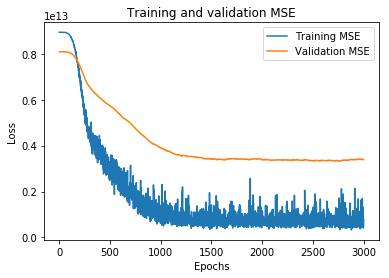

In [23]:
import matplotlib.pyplot as plt

acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

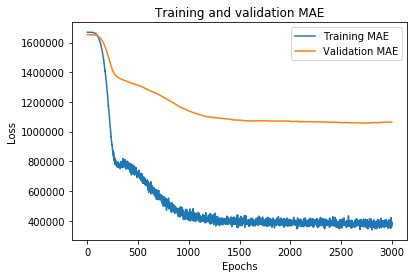

In [24]:
# "bo" es por "blue dot"
plt.plot(epochs, acc, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model2 = Sequential()

model2.add(Dense(512, input_dim=X_train.shape[1]))
model2.add(Activation('relu'))

model2.add(Dense(256))
model2.add(Activation('relu'))

model2.add(Dense(256))
model2.add(Activation('relu'))
model2.add(Dropout(0.1))

model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))

model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(32))
model2.add(Activation('relu'))
model2.add(Dropout(0.6))

model2.add(Dense(1))

model2.compile(optimizer=RMSprop(lr=1e-5), loss='mse', metrics=['mae',r2_for_keras])

In [26]:
history2 = model2.fit(X_train, y_train, batch_size=16, epochs=3000, validation_split = 0.3, 
                    verbose=1)

Train on 1249 samples, validate on 536 samples
Epoch 1/3000
1249/1249 [==============================] - 1s 866us/step - loss: 8938853207719.6602 - mean_absolute_error: 1669195.6467 - r2_for_keras: -5375116207097988.0000 - val_loss: 8088666325236.5371 - val_mean_absolute_error: 1653097.6343 - val_r2_for_keras: -2.1346
Epoch 2/3000
1249/1249 [==============================] - 1s 512us/step - loss: 8938852272519.8906 - mean_absolute_error: 1669195.3348 - r2_for_keras: -1407687945060590.2500 - val_loss: 8088665843987.1045 - val_mean_absolute_error: 1653097.4701 - val_r2_for_keras: -2.1346
Epoch 3/3000
1249/1249 [==============================] - 1s 512us/step - loss: 8938851824012.8105 - mean_absolute_error: 1669195.2226 - r2_for_keras: -77934954656141536.0000 - val_loss: 8088665360781.3730 - val_mean_absolute_error: 1653097.3358 - val_r2_for_keras: -2.1346
Epoch 4/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8938851417154.4082 - mean_absolute_error: 1669195.040

Epoch 31/3000
1249/1249 [==============================] - 1s 512us/step - loss: 8938293001426.7031 - mean_absolute_error: 1669040.8981 - r2_for_keras: -22083047534673676.0000 - val_loss: 8088220576752.7168 - val_mean_absolute_error: 1652969.2537 - val_r2_for_keras: -2.1342
Epoch 32/3000
1249/1249 [==============================] - 1s 509us/step - loss: 8938126686275.2285 - mean_absolute_error: 1669006.1821 - r2_for_keras: -69858077806786224.0000 - val_loss: 8088138527637.0146 - val_mean_absolute_error: 1652946.0429 - val_r2_for_keras: -2.1341
Epoch 33/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8938057783225.4922 - mean_absolute_error: 1668973.5692 - r2_for_keras: -8468992274355631.0000 - val_loss: 8088052295955.1045 - val_mean_absolute_error: 1652921.8489 - val_r2_for_keras: -2.1341
Epoch 34/3000
1249/1249 [==============================] - 1s 504us/step - loss: 8937851701207.0078 - mean_absolute_error: 1668942.2501 - r2_for_keras: -3502617314099490.5000 -

Epoch 61/3000
1249/1249 [==============================] - 1s 507us/step - loss: 8902359654498.3828 - mean_absolute_error: 1660679.6260 - r2_for_keras: -10083821849823796.0000 - val_loss: 8070183653192.5967 - val_mean_absolute_error: 1648113.9198 - val_r2_for_keras: -2.1175
Epoch 62/3000
1249/1249 [==============================] - 1s 507us/step - loss: 8896503916771.9199 - mean_absolute_error: 1659868.9555 - r2_for_keras: -12988504449511298.0000 - val_loss: 8068304235260.1787 - val_mean_absolute_error: 1647613.6810 - val_r2_for_keras: -2.1158
Epoch 63/3000
1249/1249 [==============================] - 1s 509us/step - loss: 8896284342312.9922 - mean_absolute_error: 1659189.5204 - r2_for_keras: -392442880514518784.0000 - val_loss: 8066327117824.0000 - val_mean_absolute_error: 1647087.2537 - val_r2_for_keras: -2.1139
Epoch 64/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8889770718118.6348 - mean_absolute_error: 1657574.5201 - r2_for_keras: -27078050511753820.000

Epoch 91/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8518462524347.9521 - mean_absolute_error: 1567777.0220 - r2_for_keras: -136331666914923360.0000 - val_loss: 7891434696398.3281 - val_mean_absolute_error: 1599770.0709 - val_r2_for_keras: -1.9571
Epoch 92/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8449012879186.1904 - mean_absolute_error: 1562377.5894 - r2_for_keras: -3730233607241795.0000 - val_loss: 7879602476780.8955 - val_mean_absolute_error: 1596483.3190 - val_r2_for_keras: -1.9467
Epoch 93/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8491240010137.9277 - mean_absolute_error: 1558628.9826 - r2_for_keras: -7189777839425064.0000 - val_loss: 7864948018772.0596 - val_mean_absolute_error: 1592441.8545 - val_r2_for_keras: -1.9340
Epoch 94/3000
1249/1249 [==============================] - 1s 508us/step - loss: 8448890664463.1680 - mean_absolute_error: 1550878.4131 - r2_for_keras: -1358478916582137088.000

Epoch 121/3000
1249/1249 [==============================] - 1s 507us/step - loss: 6946293403238.0723 - mean_absolute_error: 1214295.3342 - r2_for_keras: -1673003446034439.2500 - val_loss: 7211223337601.9102 - val_mean_absolute_error: 1418709.0597 - val_r2_for_keras: -1.4236
Epoch 122/3000
1249/1249 [==============================] - 1s 511us/step - loss: 6994538359812.0996 - mean_absolute_error: 1212116.4371 - r2_for_keras: -6537997205991245.0000 - val_loss: 7186385719846.2090 - val_mean_absolute_error: 1413470.5672 - val_r2_for_keras: -1.4075
Epoch 123/3000
1249/1249 [==============================] - 1s 509us/step - loss: 6854084764369.4727 - mean_absolute_error: 1207942.0718 - r2_for_keras: -957778174674576.0000 - val_loss: 7160126534304.4775 - val_mean_absolute_error: 1408262.1026 - val_r2_for_keras: -1.3911
Epoch 124/3000
1249/1249 [==============================] - 1s 509us/step - loss: 6835433841249.9727 - mean_absolute_error: 1197201.7152 - r2_for_keras: -1515445586542343.5000 

Epoch 151/3000
1249/1249 [==============================] - 1s 514us/step - loss: 6410277503382.6484 - mean_absolute_error: 1142876.0745 - r2_for_keras: -12161932278235452.0000 - val_loss: 6706302634136.8359 - val_mean_absolute_error: 1371077.3228 - val_r2_for_keras: -1.2370
Epoch 152/3000
1249/1249 [==============================] - 1s 505us/step - loss: 6380741275848.0449 - mean_absolute_error: 1123645.9175 - r2_for_keras: -3332796246656446.0000 - val_loss: 6698468772726.4482 - val_mean_absolute_error: 1370990.6259 - val_r2_for_keras: -1.2365
Epoch 153/3000
1249/1249 [==============================] - 1s 509us/step - loss: 5751595536538.1328 - mean_absolute_error: 1115696.3914 - r2_for_keras: -1740925798848140.5000 - val_loss: 6693798105149.1348 - val_mean_absolute_error: 1371015.5690 - val_r2_for_keras: -1.2365
Epoch 154/3000
1249/1249 [==============================] - 1s 507us/step - loss: 6017843792024.4932 - mean_absolute_error: 1108252.1829 - r2_for_keras: -191754946176268.9688

Epoch 181/3000
1249/1249 [==============================] - 1s 506us/step - loss: 5867414067477.1113 - mean_absolute_error: 1092163.8390 - r2_for_keras: -802964417586169.2500 - val_loss: 6529838438369.4326 - val_mean_absolute_error: 1370034.7388 - val_r2_for_keras: -1.2315
Epoch 182/3000
1249/1249 [==============================] - 1s 509us/step - loss: 5989862350526.6172 - mean_absolute_error: 1077300.6341 - r2_for_keras: -4159633392311763.0000 - val_loss: 6522785203643.2236 - val_mean_absolute_error: 1370032.5187 - val_r2_for_keras: -1.2313
Epoch 183/3000
1249/1249 [==============================] - 1s 508us/step - loss: 5938340553759.9746 - mean_absolute_error: 1103695.3963 - r2_for_keras: -15450384930440216.0000 - val_loss: 6519177836146.6270 - val_mean_absolute_error: 1369239.6082 - val_r2_for_keras: -1.2292
Epoch 184/3000
1249/1249 [==============================] - 1s 511us/step - loss: 5735710806576.7812 - mean_absolute_error: 1076639.5251 - r2_for_keras: -16843065620165764.000

Epoch 211/3000
1249/1249 [==============================] - 1s 513us/step - loss: 5800402325920.4863 - mean_absolute_error: 1054695.1041 - r2_for_keras: -4342142198916718.5000 - val_loss: 6372967144371.5820 - val_mean_absolute_error: 1359664.0280 - val_r2_for_keras: -1.2015
Epoch 212/3000
1249/1249 [==============================] - 1s 510us/step - loss: 5569979875432.9414 - mean_absolute_error: 1065696.0286 - r2_for_keras: -5350956001634166.0000 - val_loss: 6366140023517.6123 - val_mean_absolute_error: 1359571.3974 - val_r2_for_keras: -1.2011
Epoch 213/3000
1249/1249 [==============================] - 1s 510us/step - loss: 5606641266133.7773 - mean_absolute_error: 1036904.5058 - r2_for_keras: -366180892550687.8750 - val_loss: 6359395780271.7607 - val_mean_absolute_error: 1359334.3843 - val_r2_for_keras: -1.2003
Epoch 214/3000
1249/1249 [==============================] - 1s 515us/step - loss: 5650491460277.5986 - mean_absolute_error: 1033191.1196 - r2_for_keras: -2912605201586683.0000 

Epoch 241/3000
1249/1249 [==============================] - 1s 508us/step - loss: 5598584512925.2070 - mean_absolute_error: 1016022.5486 - r2_for_keras: -1180437092081999.0000 - val_loss: 6187817889975.4033 - val_mean_absolute_error: 1349119.0728 - val_r2_for_keras: -1.1705
Epoch 242/3000
1249/1249 [==============================] - 1s 507us/step - loss: 4706990051206.6611 - mean_absolute_error: 996230.5196 - r2_for_keras: -466944647526255808.0000 - val_loss: 6176660376193.9102 - val_mean_absolute_error: 1349262.6175 - val_r2_for_keras: -1.1710
Epoch 243/3000
1249/1249 [==============================] - 1s 506us/step - loss: 5662987965462.1357 - mean_absolute_error: 1036653.2740 - r2_for_keras: -1445345668115946.0000 - val_loss: 6171443074796.8955 - val_mean_absolute_error: 1348761.8321 - val_r2_for_keras: -1.1696
Epoch 244/3000
1249/1249 [==============================] - 1s 507us/step - loss: 4855508310666.9658 - mean_absolute_error: 977808.6579 - r2_for_keras: -2312736878455392.5000

Epoch 271/3000
1249/1249 [==============================] - 1s 512us/step - loss: 5273116760741.2012 - mean_absolute_error: 955188.9584 - r2_for_keras: -1585678542354447.0000 - val_loss: 5974482403083.4629 - val_mean_absolute_error: 1333918.0476 - val_r2_for_keras: -1.1284
Epoch 272/3000
1249/1249 [==============================] - 1s 508us/step - loss: 4907013034885.8418 - mean_absolute_error: 952079.1843 - r2_for_keras: -30751151769401808.0000 - val_loss: 5964379754801.6719 - val_mean_absolute_error: 1333600.6586 - val_r2_for_keras: -1.1277
Epoch 273/3000
1249/1249 [==============================] - 1s 504us/step - loss: 4699109839894.1357 - mean_absolute_error: 955812.4301 - r2_for_keras: -41380421206095.0234 - val_loss: 5958157213329.1943 - val_mean_absolute_error: 1332997.2257 - val_r2_for_keras: -1.1262
Epoch 274/3000
1249/1249 [==============================] - 1s 509us/step - loss: 4868886964661.8027 - mean_absolute_error: 960132.9930 - r2_for_keras: -1151722254333822.5000 - va

Epoch 301/3000
1249/1249 [==============================] - 1s 509us/step - loss: 4698771815818.3506 - mean_absolute_error: 908901.3683 - r2_for_keras: -54096155191798232.0000 - val_loss: 5735160246944.4775 - val_mean_absolute_error: 1311888.9646 - val_r2_for_keras: -1.0686
Epoch 302/3000
1249/1249 [==============================] - 1s 507us/step - loss: 5303288614508.6309 - mean_absolute_error: 961753.4732 - r2_for_keras: -166945550731761.3750 - val_loss: 5730529987690.9854 - val_mean_absolute_error: 1310701.1474 - val_r2_for_keras: -1.0648
Epoch 303/3000
1249/1249 [==============================] - 1s 511us/step - loss: 4240944470634.1714 - mean_absolute_error: 920543.4495 - r2_for_keras: -821393176603980.3750 - val_loss: 5722147852104.5967 - val_mean_absolute_error: 1309920.4058 - val_r2_for_keras: -1.0625
Epoch 304/3000
1249/1249 [==============================] - 1s 510us/step - loss: 4605240662194.7285 - mean_absolute_error: 900399.7622 - r2_for_keras: -137815672653114.2969 - val

Epoch 331/3000
1249/1249 [==============================] - 1s 504us/step - loss: 4733141367061.1113 - mean_absolute_error: 888493.1063 - r2_for_keras: -38937645262384560.0000 - val_loss: 5459588131824.7168 - val_mean_absolute_error: 1285347.8993 - val_r2_for_keras: -0.9975
Epoch 332/3000
1249/1249 [==============================] - 1s 511us/step - loss: 4456721433363.0615 - mean_absolute_error: 877577.2402 - r2_for_keras: -810729773476934.0000 - val_loss: 5448763267041.4326 - val_mean_absolute_error: 1284211.8433 - val_r2_for_keras: -0.9945
Epoch 333/3000
1249/1249 [==============================] - 1s 514us/step - loss: 4993479474655.6162 - mean_absolute_error: 915654.1018 - r2_for_keras: -462682899962572.8750 - val_loss: 5440665971452.1787 - val_mean_absolute_error: 1282957.1623 - val_r2_for_keras: -0.9909
Epoch 334/3000
1249/1249 [==============================] - 1s 508us/step - loss: 3877402633282.8184 - mean_absolute_error: 842167.8852 - r2_for_keras: -33485624835781.3125 - val_

Epoch 361/3000
1249/1249 [==============================] - 1s 504us/step - loss: 3821568305379.9199 - mean_absolute_error: 823650.6813 - r2_for_keras: -47179735838124584.0000 - val_loss: 5157286384410.7461 - val_mean_absolute_error: 1253805.5494 - val_r2_for_keras: -0.9138
Epoch 362/3000
1249/1249 [==============================] - 1s 508us/step - loss: 3848890216346.3374 - mean_absolute_error: 815701.4069 - r2_for_keras: -3191176023885783.0000 - val_loss: 5144077384505.3135 - val_mean_absolute_error: 1252586.6231 - val_r2_for_keras: -0.9108
Epoch 363/3000
1249/1249 [==============================] - 1s 508us/step - loss: 4596787157453.7842 - mean_absolute_error: 835726.7437 - r2_for_keras: -17879623893752.8047 - val_loss: 5131399711361.9102 - val_mean_absolute_error: 1251332.2463 - val_r2_for_keras: -0.9076
Epoch 364/3000
1249/1249 [==============================] - 1s 506us/step - loss: 3904030688661.8286 - mean_absolute_error: 818969.1335 - r2_for_keras: -2708768158218110.5000 - va

Epoch 391/3000
1249/1249 [==============================] - 1s 515us/step - loss: 3492751618297.2358 - mean_absolute_error: 778456.2728 - r2_for_keras: -498861146052812.8750 - val_loss: 4822576187055.7607 - val_mean_absolute_error: 1217312.9356 - val_r2_for_keras: -0.8170
Epoch 392/3000
1249/1249 [==============================] - 1s 508us/step - loss: 3972886538764.7080 - mean_absolute_error: 835123.2743 - r2_for_keras: -202118822616884.7812 - val_loss: 4817277382350.3281 - val_mean_absolute_error: 1215642.8937 - val_r2_for_keras: -0.8122
Epoch 393/3000
1249/1249 [==============================] - 1s 506us/step - loss: 3432319297370.3892 - mean_absolute_error: 778493.7448 - r2_for_keras: -8355572676178960.0000 - val_loss: 4803471924636.6562 - val_mean_absolute_error: 1214476.6175 - val_r2_for_keras: -0.8094
Epoch 394/3000
1249/1249 [==============================] - 1s 508us/step - loss: 3310285448511.2310 - mean_absolute_error: 765052.2211 - r2_for_keras: -9138822127871.6367 - val_lo

1249/1249 [==============================] - 1s 509us/step - loss: 3757973258863.0903 - mean_absolute_error: 760514.6690 - r2_for_keras: -1092339273102416.8750 - val_loss: 4502281996440.8359 - val_mean_absolute_error: 1175381.9692 - val_r2_for_keras: -0.7083
Epoch 422/3000
1249/1249 [==============================] - 1s 508us/step - loss: 3880118728047.2954 - mean_absolute_error: 762441.2682 - r2_for_keras: -123588457655483.5938 - val_loss: 4490317908609.9102 - val_mean_absolute_error: 1173718.2799 - val_r2_for_keras: -0.7042
Epoch 423/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2962719355751.0967 - mean_absolute_error: 729656.9060 - r2_for_keras: -64944279573486.5547 - val_loss: 4480904500483.8213 - val_mean_absolute_error: 1172632.7584 - val_r2_for_keras: -0.7017
Epoch 424/3000
1249/1249 [==============================] - 1s 507us/step - loss: 3391659869288.1216 - mean_absolute_error: 752330.9463 - r2_for_keras: -4533699748533611.0000 - val_loss: 447505371

1249/1249 [==============================] - 1s 506us/step - loss: 3273536201523.8560 - mean_absolute_error: 733292.6815 - r2_for_keras: -5988677587468786.0000 - val_loss: 4177668738888.5972 - val_mean_absolute_error: 1133963.8890 - val_r2_for_keras: -0.6064
Epoch 452/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2711254415545.2876 - mean_absolute_error: 692300.5717 - r2_for_keras: -2125878442584750.5000 - val_loss: 4164782462700.8955 - val_mean_absolute_error: 1132285.0886 - val_r2_for_keras: -0.6023
Epoch 453/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2904653182124.9897 - mean_absolute_error: 721379.7165 - r2_for_keras: -4619516234940429.0000 - val_loss: 4153085071176.5972 - val_mean_absolute_error: 1130589.5905 - val_r2_for_keras: -0.5981
Epoch 454/3000
1249/1249 [==============================] - 1s 511us/step - loss: 2942494886204.4644 - mean_absolute_error: 734514.5032 - r2_for_keras: -245646050042190.3750 - val_loss: 4143883

1249/1249 [==============================] - 1s 509us/step - loss: 3519406030441.3516 - mean_absolute_error: 708264.8481 - r2_for_keras: -63349282086879.0625 - val_loss: 3871055551167.0449 - val_mean_absolute_error: 1090174.0103 - val_r2_for_keras: -0.5018
Epoch 482/3000
1249/1249 [==============================] - 1s 506us/step - loss: 2636559516723.6509 - mean_absolute_error: 690737.8721 - r2_for_keras: -92704939959537856.0000 - val_loss: 3863772297796.7759 - val_mean_absolute_error: 1088759.4552 - val_r2_for_keras: -0.4984
Epoch 483/3000
1249/1249 [==============================] - 1s 509us/step - loss: 3185953160081.3198 - mean_absolute_error: 712195.9760 - r2_for_keras: -570177712829140.6250 - val_loss: 3856038730920.1196 - val_mean_absolute_error: 1087521.3274 - val_r2_for_keras: -0.4957
Epoch 484/3000
1249/1249 [==============================] - 1s 507us/step - loss: 3161453325106.2158 - mean_absolute_error: 722671.5727 - r2_for_keras: -12825478302305960.0000 - val_loss: 3850578

1249/1249 [==============================] - 1s 510us/step - loss: 2644374633984.4102 - mean_absolute_error: 693163.8933 - r2_for_keras: -1216414736721334.5000 - val_loss: 3598375391048.5972 - val_mean_absolute_error: 1048762.0979 - val_r2_for_keras: -0.4058
Epoch 512/3000
1249/1249 [==============================] - 1s 506us/step - loss: 3225738971790.2446 - mean_absolute_error: 704283.4886 - r2_for_keras: -6220302608453353.0000 - val_loss: 3593645919094.4478 - val_mean_absolute_error: 1047652.7146 - val_r2_for_keras: -0.4031
Epoch 513/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2259436089031.6475 - mean_absolute_error: 674478.5547 - r2_for_keras: -328852507776.5016 - val_loss: 3586284643648.9551 - val_mean_absolute_error: 1046319.5103 - val_r2_for_keras: -0.3999
Epoch 514/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2761229786374.3540 - mean_absolute_error: 687976.9677 - r2_for_keras: -132291608823346.9375 - val_loss: 35696526671

Epoch 541/3000
1249/1249 [==============================] - 1s 506us/step - loss: 2592559022329.2358 - mean_absolute_error: 696182.0672 - r2_for_keras: -14391548190383506.0000 - val_loss: 3352500861508.7759 - val_mean_absolute_error: 1010876.2220 - val_r2_for_keras: -0.3222
Epoch 542/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2255040912916.0864 - mean_absolute_error: 645084.2190 - r2_for_keras: -1540665909602440.0000 - val_loss: 3343377017351.6416 - val_mean_absolute_error: 1009719.6931 - val_r2_for_keras: -0.3199
Epoch 543/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2634744429568.8198 - mean_absolute_error: 665557.1789 - r2_for_keras: -6723984131444353.0000 - val_loss: 3337598410385.1938 - val_mean_absolute_error: 1008408.4468 - val_r2_for_keras: -0.3168
Epoch 544/3000
1249/1249 [==============================] - 1s 511us/step - loss: 2619587107476.8042 - mean_absolute_error: 677061.2919 - r2_for_keras: -193264917753058.8125 - v

1249/1249 [==============================] - 1s 508us/step - loss: 2287666762538.0176 - mean_absolute_error: 657020.0636 - r2_for_keras: -4991218509115526.0000 - val_loss: 3144016131209.5522 - val_mean_absolute_error: 975367.0093 - val_r2_for_keras: -0.2473
Epoch 572/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2181651422217.0183 - mean_absolute_error: 632968.9487 - r2_for_keras: -194538305062464.0312 - val_loss: 3134655722144.4775 - val_mean_absolute_error: 974090.5168 - val_r2_for_keras: -0.2446
Epoch 573/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2645488788452.9448 - mean_absolute_error: 672220.3012 - r2_for_keras: -616564349978687.6250 - val_loss: 3136621829043.5820 - val_mean_absolute_error: 973675.4235 - val_r2_for_keras: -0.2436
Epoch 574/3000
1249/1249 [==============================] - 1s 510us/step - loss: 2648045886687.8208 - mean_absolute_error: 666001.0040 - r2_for_keras: -228975318454543.9062 - val_loss: 312947251218

1249/1249 [==============================] - 1s 510us/step - loss: 3686834510501.2007 - mean_absolute_error: 695613.7186 - r2_for_keras: -4834825084375745.0000 - val_loss: 2933355575387.7017 - val_mean_absolute_error: 938035.4272 - val_r2_for_keras: -0.1704
Epoch 602/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1809588835043.5100 - mean_absolute_error: 669164.7959 - r2_for_keras: -219538989891072.2188 - val_loss: 2932298275274.5073 - val_mean_absolute_error: 937194.7659 - val_r2_for_keras: -0.1686
Epoch 603/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1404265705262.1167 - mean_absolute_error: 622090.6482 - r2_for_keras: -546939745851347.5625 - val_loss: 2924314560420.2983 - val_mean_absolute_error: 935797.2687 - val_r2_for_keras: -0.1660
Epoch 604/3000
1249/1249 [==============================] - 1s 510us/step - loss: 2606344290054.7642 - mean_absolute_error: 653848.0981 - r2_for_keras: -4500571348747958.5000 - val_loss: 29179227673

1249/1249 [==============================] - 1s 507us/step - loss: 2641991335385.0566 - mean_absolute_error: 659980.0146 - r2_for_keras: -2951123321100964.5000 - val_loss: 2758334730790.2090 - val_mean_absolute_error: 905023.7174 - val_r2_for_keras: -0.1047
Epoch 632/3000
1249/1249 [==============================] - 1s 510us/step - loss: 2390399377700.6885 - mean_absolute_error: 667224.9698 - r2_for_keras: -11997156390926.4707 - val_loss: 2753760669145.7910 - val_mean_absolute_error: 904233.3638 - val_r2_for_keras: -0.1030
Epoch 633/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2337856829166.1680 - mean_absolute_error: 631238.3665 - r2_for_keras: -13120599899716202.0000 - val_loss: 2755078257709.8506 - val_mean_absolute_error: 903799.1213 - val_r2_for_keras: -0.1018
Epoch 634/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1823625568039.5581 - mean_absolute_error: 628645.6803 - r2_for_keras: -510715778475944.7500 - val_loss: 27568303734

1249/1249 [==============================] - 1s 504us/step - loss: 2043311503794.5237 - mean_absolute_error: 625847.1023 - r2_for_keras: -4113821434853574.0000 - val_loss: 2615784684345.3135 - val_mean_absolute_error: 875515.0168 - val_r2_for_keras: -0.0469
Epoch 662/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2098093674873.1335 - mean_absolute_error: 659591.6517 - r2_for_keras: -18605455114025500.0000 - val_loss: 2617894792421.2539 - val_mean_absolute_error: 875315.6922 - val_r2_for_keras: -0.0464
Epoch 663/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2089851534782.8215 - mean_absolute_error: 608659.6798 - r2_for_keras: -1444031800137998.2500 - val_loss: 2617019748413.1343 - val_mean_absolute_error: 874921.8116 - val_r2_for_keras: -0.0456
Epoch 664/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2473084004658.6260 - mean_absolute_error: 645247.0963 - r2_for_keras: -1625149051093949.2500 - val_loss: 26054615

1249/1249 [==============================] - 1s 511us/step - loss: 1601253054327.9041 - mean_absolute_error: 611843.1042 - r2_for_keras: -347392745524837.7500 - val_loss: 2465703854569.0747 - val_mean_absolute_error: 844232.6819 - val_r2_for_keras: 0.0125
Epoch 692/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1975557247746.6643 - mean_absolute_error: 617457.1938 - r2_for_keras: -325477245427778240.0000 - val_loss: 2462372330541.8506 - val_mean_absolute_error: 843168.8895 - val_r2_for_keras: 0.0144
Epoch 693/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1781335405734.4309 - mean_absolute_error: 619049.8194 - r2_for_keras: -883634040765807.7500 - val_loss: 2452118006524.1792 - val_mean_absolute_error: 841316.0229 - val_r2_for_keras: 0.0178
Epoch 694/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2572850814024.9673 - mean_absolute_error: 638930.1461 - r2_for_keras: -1591227598836180.5000 - val_loss: 244819749823

1249/1249 [==============================] - 1s 510us/step - loss: 1631212905910.6228 - mean_absolute_error: 600622.2594 - r2_for_keras: -3150577063210447.0000 - val_loss: 2352013633811.1045 - val_mean_absolute_error: 815954.5168 - val_r2_for_keras: 0.0636
Epoch 722/3000
1249/1249 [==============================] - 1s 513us/step - loss: 2194144431547.5420 - mean_absolute_error: 645232.0905 - r2_for_keras: -13453652447500834.0000 - val_loss: 2349746022186.0298 - val_mean_absolute_error: 815240.0560 - val_r2_for_keras: 0.0648
Epoch 723/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1915146417559.4685 - mean_absolute_error: 654056.8981 - r2_for_keras: -132517285455614.2812 - val_loss: 2341998923103.5225 - val_mean_absolute_error: 813739.4897 - val_r2_for_keras: 0.0675
Epoch 724/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1291100231998.3091 - mean_absolute_error: 591076.2220 - r2_for_keras: -10509455715410.3809 - val_loss: 2336664823349.

1249/1249 [==============================] - 1s 517us/step - loss: 1997592471806.1553 - mean_absolute_error: 590933.3451 - r2_for_keras: -12643367837583764.0000 - val_loss: 2251127954111.0449 - val_mean_absolute_error: 794221.6306 - val_r2_for_keras: 0.1051
Epoch 752/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1379437792088.2729 - mean_absolute_error: 606618.0417 - r2_for_keras: -83743513961.1947 - val_loss: 2244661856164.2983 - val_mean_absolute_error: 793327.8008 - val_r2_for_keras: 0.1070
Epoch 753/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2124834713012.9832 - mean_absolute_error: 614822.7325 - r2_for_keras: -3263071231764458.5000 - val_loss: 2241690286905.3135 - val_mean_absolute_error: 792839.8097 - val_r2_for_keras: 0.1079
Epoch 754/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1563461687107.4331 - mean_absolute_error: 594202.0171 - r2_for_keras: -203102573012432.5000 - val_loss: 2243618546030.806

1249/1249 [==============================] - 1s 509us/step - loss: 1927200980226.2549 - mean_absolute_error: 633033.5550 - r2_for_keras: -175479406599450.5312 - val_loss: 2142887291888.7163 - val_mean_absolute_error: 778125.7034 - val_r2_for_keras: 0.1374
Epoch 782/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1946115735473.2939 - mean_absolute_error: 619212.8194 - r2_for_keras: -4790141248735808.0000 - val_loss: 2133510687117.3730 - val_mean_absolute_error: 776925.4030 - val_r2_for_keras: 0.1394
Epoch 783/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1323985232954.2097 - mean_absolute_error: 567295.6663 - r2_for_keras: -24512253417453540.0000 - val_loss: 2132589612138.9851 - val_mean_absolute_error: 776783.9534 - val_r2_for_keras: 0.1398
Epoch 784/3000
1249/1249 [==============================] - 1s 513us/step - loss: 2123028094405.3804 - mean_absolute_error: 615012.2803 - r2_for_keras: -2684664732978462.0000 - val_loss: 213409314125

1249/1249 [==============================] - 1s 512us/step - loss: 1335692949505.6399 - mean_absolute_error: 574805.0606 - r2_for_keras: -45562476597249968.0000 - val_loss: 2085196632614.2090 - val_mean_absolute_error: 777005.5084 - val_r2_for_keras: 0.1343
Epoch 812/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1279415476703.6155 - mean_absolute_error: 563797.5378 - r2_for_keras: -10287428429854.7207 - val_loss: 2085746819561.0747 - val_mean_absolute_error: 777362.1040 - val_r2_for_keras: 0.1335
Epoch 813/3000
1249/1249 [==============================] - 1s 510us/step - loss: 2655196042130.9590 - mean_absolute_error: 610141.4066 - r2_for_keras: -736838564655880.7500 - val_loss: 2084407395282.1492 - val_mean_absolute_error: 777465.4412 - val_r2_for_keras: 0.1331
Epoch 814/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2251612981025.4917 - mean_absolute_error: 582279.7739 - r2_for_keras: -61018600266.2915 - val_loss: 2073145875135.0447 

1249/1249 [==============================] - 1s 512us/step - loss: 1779902616302.9880 - mean_absolute_error: 610906.2398 - r2_for_keras: -718360012902724.2500 - val_loss: 2047972761966.8059 - val_mean_absolute_error: 787754.9156 - val_r2_for_keras: 0.0988
Epoch 842/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2653111051138.5620 - mean_absolute_error: 647110.2578 - r2_for_keras: -1681450714811244.7500 - val_loss: 2047968188629.9702 - val_mean_absolute_error: 788373.8321 - val_r2_for_keras: 0.0967
Epoch 843/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2010598246450.8313 - mean_absolute_error: 600727.4422 - r2_for_keras: -2414767199960917.0000 - val_loss: 2048224126762.0298 - val_mean_absolute_error: 789297.1982 - val_r2_for_keras: 0.0938
Epoch 844/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1691937660331.1450 - mean_absolute_error: 578375.1506 - r2_for_keras: -1489389515802805.7500 - val_loss: 2052103914205

1249/1249 [==============================] - 1s 508us/step - loss: 1500396599217.3965 - mean_absolute_error: 586642.7683 - r2_for_keras: -7618085623041.9004 - val_loss: 2066618266027.9402 - val_mean_absolute_error: 812677.6418 - val_r2_for_keras: 0.0081
Epoch 872/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1451249225527.9551 - mean_absolute_error: 580381.4438 - r2_for_keras: -1218875103062952.0000 - val_loss: 2076225174084.7761 - val_mean_absolute_error: 814678.9249 - val_r2_for_keras: 0.0023
Epoch 873/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1375310050315.6831 - mean_absolute_error: 582081.6211 - r2_for_keras: -3602473453697.1362 - val_loss: 2067084180036.7761 - val_mean_absolute_error: 814328.7481 - val_r2_for_keras: 7.8840e-04
Epoch 874/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1543069001234.4468 - mean_absolute_error: 592354.6691 - r2_for_keras: -19918041355439140.0000 - val_loss: 2067851891238

1249/1249 [==============================] - 1s 508us/step - loss: 1868879101810.1648 - mean_absolute_error: 589247.0843 - r2_for_keras: -73220499300463.1094 - val_loss: 2148601300411.2239 - val_mean_absolute_error: 852138.2034 - val_r2_for_keras: -0.1474
Epoch 902/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1267020198652.1057 - mean_absolute_error: 582769.7451 - r2_for_keras: -4296750151023340.5000 - val_loss: 2141505847296.0000 - val_mean_absolute_error: 852244.2113 - val_r2_for_keras: -0.1519
Epoch 903/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1384498269102.8342 - mean_absolute_error: 549259.4600 - r2_for_keras: -10393663170154808.0000 - val_loss: 2143571150267.2239 - val_mean_absolute_error: 853739.6059 - val_r2_for_keras: -0.1594
Epoch 904/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1960771055173.2781 - mean_absolute_error: 591465.8770 - r2_for_keras: -36177286686016.1953 - val_loss: 214294391841

1249/1249 [==============================] - 1s 509us/step - loss: 2095844871873.8960 - mean_absolute_error: 615331.3480 - r2_for_keras: -1338004084827206.7500 - val_loss: 2266082481411.8208 - val_mean_absolute_error: 899567.9711 - val_r2_for_keras: -0.3592
Epoch 932/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1671885253682.0112 - mean_absolute_error: 592344.5665 - r2_for_keras: -749217533839056.2500 - val_loss: 2269787559171.8208 - val_mean_absolute_error: 901447.2621 - val_r2_for_keras: -0.3689
Epoch 933/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1897583016251.8496 - mean_absolute_error: 613914.5875 - r2_for_keras: -17691040786082.3438 - val_loss: 2276787756689.1938 - val_mean_absolute_error: 903326.7206 - val_r2_for_keras: -0.3759
Epoch 934/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1807228067689.1465 - mean_absolute_error: 606182.0752 - r2_for_keras: -2117383196719301.7500 - val_loss: 228312893495

1249/1249 [==============================] - 1s 512us/step - loss: 1868644635532.8103 - mean_absolute_error: 613746.7475 - r2_for_keras: -59152215286408.8984 - val_loss: 2466962822159.2837 - val_mean_absolute_error: 964242.0299 - val_r2_for_keras: -0.6714
Epoch 962/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1477431610299.9519 - mean_absolute_error: 611123.7177 - r2_for_keras: -494047261427080.3750 - val_loss: 2475686211522.8657 - val_mean_absolute_error: 966983.1646 - val_r2_for_keras: -0.6852
Epoch 963/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2055840112533.4187 - mean_absolute_error: 605156.3537 - r2_for_keras: -180184957638558.8125 - val_loss: 2480036708352.0000 - val_mean_absolute_error: 968688.9506 - val_r2_for_keras: -0.6982
Epoch 964/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1311539260131.5100 - mean_absolute_error: 578906.8321 - r2_for_keras: -1383104418816937.5000 - val_loss: 2488439067663

1249/1249 [==============================] - 1s 510us/step - loss: 1613903746553.8511 - mean_absolute_error: 585350.1685 - r2_for_keras: -255150685435419.8438 - val_loss: 2722295309632.9551 - val_mean_absolute_error: 1028590.2257 - val_r2_for_keras: -1.0230
Epoch 992/3000
1249/1249 [==============================] - 1s 511us/step - loss: 2567374880748.3237 - mean_absolute_error: 625230.8510 - r2_for_keras: -653003719076605.5000 - val_loss: 2733184017239.8804 - val_mean_absolute_error: 1031677.7043 - val_r2_for_keras: -1.0411
Epoch 993/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1788976769873.7805 - mean_absolute_error: 599076.6951 - r2_for_keras: -46071625885267.5547 - val_loss: 2740809642411.9404 - val_mean_absolute_error: 1033778.8675 - val_r2_for_keras: -1.0554
Epoch 994/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1436894689045.5212 - mean_absolute_error: 585915.2922 - r2_for_keras: -3097570083004684.5000 - val_loss: 2752578986

Epoch 1021/3000
1249/1249 [==============================] - 1s 508us/step - loss: 2098578170741.4443 - mean_absolute_error: 605340.9575 - r2_for_keras: -3570704725704388.5000 - val_loss: 3036710446645.4927 - val_mean_absolute_error: 1099831.6642 - val_r2_for_keras: -1.4749
Epoch 1022/3000
1249/1249 [==============================] - 1s 516us/step - loss: 1322507623177.9409 - mean_absolute_error: 557144.1167 - r2_for_keras: -12519878669668.1680 - val_loss: 3053178892226.8657 - val_mean_absolute_error: 1103344.8358 - val_r2_for_keras: -1.5021
Epoch 1023/3000
1249/1249 [==============================] - 1s 505us/step - loss: 1805906972522.7864 - mean_absolute_error: 593352.5206 - r2_for_keras: -186026071896421.0000 - val_loss: 3063641319454.5674 - val_mean_absolute_error: 1105533.9067 - val_r2_for_keras: -1.5126
Epoch 1024/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1868596374820.6885 - mean_absolute_error: 587833.7714 - r2_for_keras: -37491342913514824.0000 -

Epoch 1051/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2769526114265.4668 - mean_absolute_error: 597523.1014 - r2_for_keras: -76259479234630.1250 - val_loss: 3413932495398.2090 - val_mean_absolute_error: 1174954.5448 - val_r2_for_keras: -1.9888
Epoch 1052/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1734204759060.4963 - mean_absolute_error: 581476.7339 - r2_for_keras: -353387268174220.3125 - val_loss: 3429220008669.6118 - val_mean_absolute_error: 1177966.6838 - val_r2_for_keras: -2.0150
Epoch 1053/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1287150152957.3354 - mean_absolute_error: 581284.3487 - r2_for_keras: -14336637752197632.0000 - val_loss: 3435446316994.8657 - val_mean_absolute_error: 1179153.7780 - val_r2_for_keras: -2.0232
Epoch 1054/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1212644895682.5107 - mean_absolute_error: 583630.2466 - r2_for_keras: -8865463490816490.0000 -

Epoch 1081/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1836309917410.6899 - mean_absolute_error: 585755.4331 - r2_for_keras: -48126325860264.6406 - val_loss: 3811735469590.9253 - val_mean_absolute_error: 1246693.8834 - val_r2_for_keras: -2.5311
Epoch 1082/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1937443016685.6555 - mean_absolute_error: 584859.2324 - r2_for_keras: -12461790010702.8652 - val_loss: 3835669419267.8208 - val_mean_absolute_error: 1250842.8545 - val_r2_for_keras: -2.5691
Epoch 1083/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1353422151670.1619 - mean_absolute_error: 567774.7872 - r2_for_keras: -117443731506109.2031 - val_loss: 3846685730357.4927 - val_mean_absolute_error: 1252916.2034 - val_r2_for_keras: -2.5838
Epoch 1084/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1460965898563.0232 - mean_absolute_error: 562844.0389 - r2_for_keras: -877715197572189.7500 - val

Epoch 1111/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1879157049414.5076 - mean_absolute_error: 604120.7721 - r2_for_keras: -214862255365927.1562 - val_loss: 4349220698448.2388 - val_mean_absolute_error: 1334453.8451 - val_r2_for_keras: -3.2668
Epoch 1112/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1302849474158.2705 - mean_absolute_error: 572905.3798 - r2_for_keras: -219458840093045.4688 - val_loss: 4377198151832.8359 - val_mean_absolute_error: 1338637.3545 - val_r2_for_keras: -3.3072
Epoch 1113/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1855766944276.9065 - mean_absolute_error: 604424.9195 - r2_for_keras: -1998449974681409.5000 - val_loss: 4385012243868.6567 - val_mean_absolute_error: 1340132.9160 - val_r2_for_keras: -3.3137
Epoch 1114/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1365262657281.8445 - mean_absolute_error: 596827.3203 - r2_for_keras: -466062753810364.3125 - 

Epoch 1141/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1049789320459.4780 - mean_absolute_error: 559405.8187 - r2_for_keras: -25915523178830.0039 - val_loss: 4816842221354.0303 - val_mean_absolute_error: 1405028.7761 - val_r2_for_keras: -3.8778
Epoch 1142/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1674927298909.2585 - mean_absolute_error: 561299.7743 - r2_for_keras: -3406926350567960.0000 - val_loss: 4849464144544.4775 - val_mean_absolute_error: 1409322.6651 - val_r2_for_keras: -3.9262
Epoch 1143/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1396189088490.0688 - mean_absolute_error: 585336.5989 - r2_for_keras: -65568239437624760.0000 - val_loss: 4881654003559.1641 - val_mean_absolute_error: 1413394.0756 - val_r2_for_keras: -3.9725
Epoch 1144/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1566062436857.0312 - mean_absolute_error: 598381.1349 - r2_for_keras: -50720272438443888.0000

Epoch 1171/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1142119689756.1826 - mean_absolute_error: 557935.5388 - r2_for_keras: -4605998666144.0098 - val_loss: 5345339430392.3584 - val_mean_absolute_error: 1479262.6642 - val_r2_for_keras: -4.5767
Epoch 1172/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1674243084750.4500 - mean_absolute_error: 583126.2726 - r2_for_keras: -5650512618724.2852 - val_loss: 5354789418366.0898 - val_mean_absolute_error: 1480618.3358 - val_r2_for_keras: -4.5873
Epoch 1173/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1181261655929.5437 - mean_absolute_error: 562080.8065 - r2_for_keras: -1047420503783005.3750 - val_loss: 5358988012528.7168 - val_mean_absolute_error: 1481355.4711 - val_r2_for_keras: -4.5880
Epoch 1174/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2579997773936.7300 - mean_absolute_error: 599488.7888 - r2_for_keras: -59626718046409.2188 - val_l

Epoch 1201/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1391527247806.4116 - mean_absolute_error: 578625.6245 - r2_for_keras: -3877745548544719.5000 - val_loss: 5830550972202.0303 - val_mean_absolute_error: 1544061.4030 - val_r2_for_keras: -5.2049
Epoch 1202/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1394892876135.0967 - mean_absolute_error: 597883.1038 - r2_for_keras: -2357859330323143.0000 - val_loss: 5825499019111.1641 - val_mean_absolute_error: 1544110.6791 - val_r2_for_keras: -5.1935
Epoch 1203/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1328566573028.1248 - mean_absolute_error: 585788.0431 - r2_for_keras: -506694286087163.5000 - val_loss: 5870386280539.7012 - val_mean_absolute_error: 1549354.8899 - val_r2_for_keras: -5.2589
Epoch 1204/3000
1249/1249 [==============================] - 1s 514us/step - loss: 2223477930339.8174 - mean_absolute_error: 587675.5264 - r2_for_keras: -2326598515740314.0000 

Epoch 1231/3000
1249/1249 [==============================] - 1s 511us/step - loss: 2167229626133.5212 - mean_absolute_error: 576497.6989 - r2_for_keras: -397160887110088.9375 - val_loss: 6281716047505.1943 - val_mean_absolute_error: 1601666.2575 - val_r2_for_keras: -5.7913
Epoch 1232/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1185171012556.3491 - mean_absolute_error: 537343.4382 - r2_for_keras: -1541212584318891.7500 - val_loss: 6300750577664.0000 - val_mean_absolute_error: 1603825.1045 - val_r2_for_keras: -5.8148
Epoch 1233/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2221908169855.0776 - mean_absolute_error: 589130.9640 - r2_for_keras: -30769842586760444.0000 - val_loss: 6282635171320.3584 - val_mean_absolute_error: 1602160.5112 - val_r2_for_keras: -5.7865
Epoch 1234/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1755654786353.8062 - mean_absolute_error: 572688.7380 - r2_for_keras: -921350304672443.6250 

Epoch 1261/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1528762678312.1731 - mean_absolute_error: 582479.0679 - r2_for_keras: -291664330989377.3125 - val_loss: 6648355802708.0596 - val_mean_absolute_error: 1647798.2854 - val_r2_for_keras: -6.2547
Epoch 1262/3000
1249/1249 [==============================] - 1s 511us/step - loss: 2767595786945.0762 - mean_absolute_error: 586218.0916 - r2_for_keras: -1266035700884433.0000 - val_loss: 6648740297529.3135 - val_mean_absolute_error: 1647950.3358 - val_r2_for_keras: -6.2533
Epoch 1263/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1938928818138.2869 - mean_absolute_error: 593808.6727 - r2_for_keras: -73526311975857.6719 - val_loss: 6634454404202.9854 - val_mean_absolute_error: 1646811.1716 - val_r2_for_keras: -6.2313
Epoch 1264/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1213601523405.3738 - mean_absolute_error: 557412.4712 - r2_for_keras: -162573776078255.5938 - v

Epoch 1291/3000
1249/1249 [==============================] - 1s 507us/step - loss: 977437899416.0833 - mean_absolute_error: 543686.3695 - r2_for_keras: -971196464046335.1250 - val_loss: 7053107946327.8809 - val_mean_absolute_error: 1693714.2127 - val_r2_for_keras: -6.7860
Epoch 1292/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1999161496965.4316 - mean_absolute_error: 566531.5668 - r2_for_keras: -1102035596771826.1250 - val_loss: 7087895601518.8057 - val_mean_absolute_error: 1697194.2649 - val_r2_for_keras: -6.8331
Epoch 1293/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1088554659502.2194 - mean_absolute_error: 534831.7234 - r2_for_keras: -4210038825889834.0000 - val_loss: 7050711754538.0303 - val_mean_absolute_error: 1694083.6381 - val_r2_for_keras: -6.7781
Epoch 1294/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1725998425067.7085 - mean_absolute_error: 577121.2987 - r2_for_keras: -33597039519840.2305 - v

Epoch 1321/3000
1249/1249 [==============================] - 1s 524us/step - loss: 1315513836825.2107 - mean_absolute_error: 542989.7754 - r2_for_keras: -1564510082500710.5000 - val_loss: 7118810278652.1787 - val_mean_absolute_error: 1704257.2276 - val_r2_for_keras: -6.8608
Epoch 1322/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1406756724099.7917 - mean_absolute_error: 556396.4396 - r2_for_keras: -5075102707273370.0000 - val_loss: 7124313678924.4180 - val_mean_absolute_error: 1705243.7388 - val_r2_for_keras: -6.8641
Epoch 1323/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1187749308968.5828 - mean_absolute_error: 551473.1287 - r2_for_keras: -529879104134190.1875 - val_loss: 7159797185581.8506 - val_mean_absolute_error: 1708707.9813 - val_r2_for_keras: -6.9119
Epoch 1324/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1285307252102.4436 - mean_absolute_error: 552102.4546 - r2_for_keras: -935121346172.5472 - va

Epoch 1351/3000
1249/1249 [==============================] - 1s 512us/step - loss: 898674557898.7094 - mean_absolute_error: 524853.5080 - r2_for_keras: -482401648453203.5625 - val_loss: 7646433118116.2988 - val_mean_absolute_error: 1761811.0187 - val_r2_for_keras: -7.5610
Epoch 1352/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1201615440316.3618 - mean_absolute_error: 545290.4840 - r2_for_keras: -6924847475630676.0000 - val_loss: 7660546520690.6270 - val_mean_absolute_error: 1763552.9440 - val_r2_for_keras: -7.5807
Epoch 1353/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1276909536930.7415 - mean_absolute_error: 536638.4078 - r2_for_keras: -932103279703514.1250 - val_loss: 7643159037371.2236 - val_mean_absolute_error: 1762171.4851 - val_r2_for_keras: -7.5574
Epoch 1354/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1612011093753.6462 - mean_absolute_error: 557338.1235 - r2_for_keras: -1448720350121613.0000 - 

Epoch 1381/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1303932952887.5452 - mean_absolute_error: 532561.6166 - r2_for_keras: -100995650472891.3750 - val_loss: 7954519516970.0303 - val_mean_absolute_error: 1799478.6716 - val_r2_for_keras: -7.9426
Epoch 1382/3000
1249/1249 [==============================] - 1s 504us/step - loss: 2391410927570.0879 - mean_absolute_error: 552400.4472 - r2_for_keras: -125727867177613.7500 - val_loss: 7950773013610.9854 - val_mean_absolute_error: 1799447.1679 - val_r2_for_keras: -7.9366
Epoch 1383/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1180878008704.1023 - mean_absolute_error: 546947.7240 - r2_for_keras: -58774485120198.6953 - val_loss: 7995148433010.6270 - val_mean_absolute_error: 1803883.7407 - val_r2_for_keras: -7.9954
Epoch 1384/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1927227932435.8816 - mean_absolute_error: 539602.3319 - r2_for_keras: -8214910894789195.0000 - v

Epoch 1411/3000
1249/1249 [==============================] - 1s 510us/step - loss: 964979687401.0439 - mean_absolute_error: 529470.9144 - r2_for_keras: -312434641528941.4375 - val_loss: 8195998830653.1348 - val_mean_absolute_error: 1826238.5280 - val_r2_for_keras: -8.2577
Epoch 1412/3000
1249/1249 [==============================] - 1s 511us/step - loss: 815156176310.6229 - mean_absolute_error: 529867.2441 - r2_for_keras: -1982794038296956.0000 - val_loss: 8178986240641.9102 - val_mean_absolute_error: 1825001.9086 - val_r2_for_keras: -8.2317
Epoch 1413/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1473772154076.1313 - mean_absolute_error: 558370.5538 - r2_for_keras: -50193082004468.8906 - val_loss: 8160066560855.8809 - val_mean_absolute_error: 1823366.7500 - val_r2_for_keras: -8.2055
Epoch 1414/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1396657330144.8455 - mean_absolute_error: 539277.5259 - r2_for_keras: -5085942888365791.0000 - va

Epoch 1441/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1184533426149.7646 - mean_absolute_error: 544013.4823 - r2_for_keras: -371607062762373.3750 - val_loss: 8269462041737.5518 - val_mean_absolute_error: 1836725.4216 - val_r2_for_keras: -8.3410
Epoch 1442/3000
1249/1249 [==============================] - 1s 511us/step - loss: 978464309195.5292 - mean_absolute_error: 511151.4593 - r2_for_keras: -1319918923193075.2500 - val_loss: 8207853600523.4629 - val_mean_absolute_error: 1831272.3451 - val_r2_for_keras: -8.2588
Epoch 1443/3000
1249/1249 [==============================] - 1s 508us/step - loss: 820031908107.2729 - mean_absolute_error: 501405.0035 - r2_for_keras: -1502828052386286.7500 - val_loss: 8199825675279.2832 - val_mean_absolute_error: 1830257.1866 - val_r2_for_keras: -8.2486
Epoch 1444/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1741790641471.7949 - mean_absolute_error: 561355.5714 - r2_for_keras: -3319605239800.8950 - val

Epoch 1471/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1287549398603.8367 - mean_absolute_error: 546068.0742 - r2_for_keras: -300496131730081.5000 - val_loss: 8228831134185.0742 - val_mean_absolute_error: 1834993.4067 - val_r2_for_keras: -8.2818
Epoch 1472/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1899708002083.4587 - mean_absolute_error: 546307.1553 - r2_for_keras: -16926801389205.1328 - val_loss: 8233760681678.3281 - val_mean_absolute_error: 1835692.4664 - val_r2_for_keras: -8.2843
Epoch 1473/3000
1249/1249 [==============================] - 1s 510us/step - loss: 992335622094.8086 - mean_absolute_error: 537774.9429 - r2_for_keras: -5285574673891380.0000 - val_loss: 8289648784766.0898 - val_mean_absolute_error: 1840926.8209 - val_r2_for_keras: -8.3589
Epoch 1474/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1063312186288.2690 - mean_absolute_error: 543465.8895 - r2_for_keras: -25478413112485.9297 - val

Epoch 1501/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1569142457541.5852 - mean_absolute_error: 558624.3973 - r2_for_keras: -179803204164313.2500 - val_loss: 8224340830483.1045 - val_mean_absolute_error: 1838963.5149 - val_r2_for_keras: -8.2663
Epoch 1502/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1106563440187.4397 - mean_absolute_error: 528398.0572 - r2_for_keras: -545398811996307.0625 - val_loss: 8254361882196.0596 - val_mean_absolute_error: 1842216.1567 - val_r2_for_keras: -8.3048
Epoch 1503/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1483282892674.9719 - mean_absolute_error: 543217.7442 - r2_for_keras: -53307892698292.6562 - val_loss: 8210695589704.5967 - val_mean_absolute_error: 1838188.1063 - val_r2_for_keras: -8.2450
Epoch 1504/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1096794177116.2338 - mean_absolute_error: 559748.9680 - r2_for_keras: -205829743135124.5625 - va

Epoch 1531/3000
1249/1249 [==============================] - 1s 512us/step - loss: 799360803294.7958 - mean_absolute_error: 511811.1907 - r2_for_keras: -770363325618800.2500 - val_loss: 7988332575545.3135 - val_mean_absolute_error: 1817957.6623 - val_r2_for_keras: -7.9504
Epoch 1532/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1337783997917.9761 - mean_absolute_error: 545711.1561 - r2_for_keras: -270575236904410.1562 - val_loss: 7989904340105.5518 - val_mean_absolute_error: 1818050.8097 - val_r2_for_keras: -7.9500
Epoch 1533/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1183017936520.5061 - mean_absolute_error: 525539.3029 - r2_for_keras: -2288975234952720.5000 - val_loss: 7948835444705.4326 - val_mean_absolute_error: 1814568.0373 - val_r2_for_keras: -7.8944
Epoch 1534/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1321982424312.4165 - mean_absolute_error: 541874.7633 - r2_for_keras: -386562269558588.4375 - v

Epoch 1561/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1578163859355.9775 - mean_absolute_error: 539793.0532 - r2_for_keras: -189676360818694.0000 - val_loss: 8026996354521.7910 - val_mean_absolute_error: 1823005.2668 - val_r2_for_keras: -7.9999
Epoch 1562/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1089739960907.0168 - mean_absolute_error: 547241.6234 - r2_for_keras: -820292124427485.7500 - val_loss: 7991612501710.3281 - val_mean_absolute_error: 1820165.8582 - val_r2_for_keras: -7.9494
Epoch 1563/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1636217608305.1401 - mean_absolute_error: 563479.5756 - r2_for_keras: -2501282215172090.5000 - val_loss: 7947295634325.0146 - val_mean_absolute_error: 1816120.9254 - val_r2_for_keras: -7.8893
Epoch 1564/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1153366929109.5725 - mean_absolute_error: 534199.2470 - r2_for_keras: -6979972710323497.0000 -

Epoch 1591/3000
1249/1249 [==============================] - 1s 515us/step - loss: 989249152491.0936 - mean_absolute_error: 529121.3757 - r2_for_keras: -11042029947629846.0000 - val_loss: 7888588747669.0146 - val_mean_absolute_error: 1812926.8843 - val_r2_for_keras: -7.8093
Epoch 1592/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1569691268439.5195 - mean_absolute_error: 539609.5274 - r2_for_keras: -15205578534468858.0000 - val_loss: 7923830733625.3135 - val_mean_absolute_error: 1815987.2631 - val_r2_for_keras: -7.8578
Epoch 1593/3000
1249/1249 [==============================] - 1s 504us/step - loss: 1341240341558.9304 - mean_absolute_error: 524541.5005 - r2_for_keras: -4667523254243180.0000 - val_loss: 7880305650672.7168 - val_mean_absolute_error: 1812103.6679 - val_r2_for_keras: -7.7986
Epoch 1594/3000
1249/1249 [==============================] - 1s 510us/step - loss: 991753053386.5044 - mean_absolute_error: 539301.9756 - r2_for_keras: -1178238619022416.7500

Epoch 1621/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1415540391411.2922 - mean_absolute_error: 540757.3139 - r2_for_keras: -1787286961924244.7500 - val_loss: 7777960129673.5518 - val_mean_absolute_error: 1804717.5354 - val_r2_for_keras: -7.6528
Epoch 1622/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1896501851856.6533 - mean_absolute_error: 549419.8299 - r2_for_keras: -349637407536156.2500 - val_loss: 7753173397198.3281 - val_mean_absolute_error: 1802487.9067 - val_r2_for_keras: -7.6183
Epoch 1623/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1703250642486.5205 - mean_absolute_error: 565013.3193 - r2_for_keras: -521187273248423.1250 - val_loss: 7777657267276.4180 - val_mean_absolute_error: 1804763.3358 - val_r2_for_keras: -7.6501
Epoch 1624/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1404576506033.0889 - mean_absolute_error: 549076.0768 - r2_for_keras: -1863756719181413.5000 -

Epoch 1651/3000
1249/1249 [==============================] - 1s 508us/step - loss: 852813897367.2634 - mean_absolute_error: 516079.9234 - r2_for_keras: -2452475871163158.0000 - val_loss: 7635095163185.6719 - val_mean_absolute_error: 1794489.6940 - val_r2_for_keras: -7.4576
Epoch 1652/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1363147356371.5227 - mean_absolute_error: 531906.7893 - r2_for_keras: -4503355340359520.5000 - val_loss: 7612069259783.6416 - val_mean_absolute_error: 1792623.8526 - val_r2_for_keras: -7.4261
Epoch 1653/3000
1249/1249 [==============================] - 1s 510us/step - loss: 939092857681.3706 - mean_absolute_error: 498849.7772 - r2_for_keras: -25238711049593716.0000 - val_loss: 7592598971957.4922 - val_mean_absolute_error: 1790939.0746 - val_r2_for_keras: -7.3999
Epoch 1654/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1863741560525.3740 - mean_absolute_error: 532003.7008 - r2_for_keras: -1325431996858328.2500 

Epoch 1681/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1157579449979.3884 - mean_absolute_error: 548194.4243 - r2_for_keras: -387059206559292.5625 - val_loss: 7464111520080.2393 - val_mean_absolute_error: 1779289.1978 - val_r2_for_keras: -7.2161
Epoch 1682/3000
1249/1249 [==============================] - 1s 510us/step - loss: 2860620710294.6484 - mean_absolute_error: 564778.5563 - r2_for_keras: -1952027079617395.5000 - val_loss: 7450041293013.9697 - val_mean_absolute_error: 1777612.9963 - val_r2_for_keras: -7.1983
Epoch 1683/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1544517868262.7893 - mean_absolute_error: 551645.3829 - r2_for_keras: -1204087595998595.2500 - val_loss: 7483665357503.0449 - val_mean_absolute_error: 1780667.1828 - val_r2_for_keras: -7.2442
Epoch 1684/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1059014132669.5916 - mean_absolute_error: 516497.6554 - r2_for_keras: -1461447263236636.5000 

Epoch 1711/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1050705933957.2266 - mean_absolute_error: 536205.0942 - r2_for_keras: -5566958538149293.0000 - val_loss: 7334047334644.5371 - val_mean_absolute_error: 1767810.7556 - val_r2_for_keras: -7.0430
Epoch 1712/3000
1249/1249 [==============================] - 1s 515us/step - loss: 1275438397284.2273 - mean_absolute_error: 536452.6701 - r2_for_keras: -2807969151964090.0000 - val_loss: 7332568365147.7012 - val_mean_absolute_error: 1767523.6381 - val_r2_for_keras: -7.0418
Epoch 1713/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1008392772549.7902 - mean_absolute_error: 509595.0038 - r2_for_keras: -18548401992651468.0000 - val_loss: 7283306878945.4326 - val_mean_absolute_error: 1762442.7724 - val_r2_for_keras: -6.9782
Epoch 1714/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2095101125532.7976 - mean_absolute_error: 549390.7310 - r2_for_keras: -595147531663794.0000

Epoch 1741/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1378766624389.2266 - mean_absolute_error: 529082.5288 - r2_for_keras: -849349129049818.0000 - val_loss: 7005873271456.4775 - val_mean_absolute_error: 1733025.9944 - val_r2_for_keras: -6.6064
Epoch 1742/3000
1249/1249 [==============================] - 1s 511us/step - loss: 924984920421.4572 - mean_absolute_error: 478251.6201 - r2_for_keras: -129374882433861.2812 - val_loss: 7041216542811.7012 - val_mean_absolute_error: 1736716.9104 - val_r2_for_keras: -6.6546
Epoch 1743/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1122554747058.7285 - mean_absolute_error: 540225.7953 - r2_for_keras: -3696913739258348.5000 - val_loss: 7042054386336.4775 - val_mean_absolute_error: 1736876.9627 - val_r2_for_keras: -6.6590
Epoch 1744/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1260318588072.5061 - mean_absolute_error: 530422.2575 - r2_for_keras: -2267889737773.3711 - val

Epoch 1771/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1211451676690.4468 - mean_absolute_error: 533949.1141 - r2_for_keras: -11423383663237.5352 - val_loss: 6875214535603.5820 - val_mean_absolute_error: 1720229.4310 - val_r2_for_keras: -6.4326
Epoch 1772/3000
1249/1249 [==============================] - 1s 514us/step - loss: 930138294191.6542 - mean_absolute_error: 503416.0416 - r2_for_keras: -92722945122677.2969 - val_loss: 6837131335160.3584 - val_mean_absolute_error: 1716117.6978 - val_r2_for_keras: -6.3836
Epoch 1773/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1450625143830.1362 - mean_absolute_error: 521330.1567 - r2_for_keras: -2715422008208938.5000 - val_loss: 6801028980858.2686 - val_mean_absolute_error: 1712206.0075 - val_r2_for_keras: -6.3344
Epoch 1774/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1344155233316.8936 - mean_absolute_error: 521495.5214 - r2_for_keras: -411513794377217.5625 - val

Epoch 1801/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1063785457800.0959 - mean_absolute_error: 513345.5194 - r2_for_keras: -4065220203902505.0000 - val_loss: 6610569799221.4922 - val_mean_absolute_error: 1692696.8060 - val_r2_for_keras: -6.0639
Epoch 1802/3000
1249/1249 [==============================] - 1s 505us/step - loss: 719562113489.6781 - mean_absolute_error: 495588.6557 - r2_for_keras: -633607385424783.1250 - val_loss: 6604334465513.0742 - val_mean_absolute_error: 1692060.3396 - val_r2_for_keras: -6.0565
Epoch 1803/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1043074107455.9489 - mean_absolute_error: 516018.3143 - r2_for_keras: -16508417944222984.0000 - val_loss: 6603992625824.4775 - val_mean_absolute_error: 1692057.3545 - val_r2_for_keras: -6.0544
Epoch 1804/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1429226190915.2283 - mean_absolute_error: 524243.5404 - r2_for_keras: -1704937260328584.0000 

Epoch 1831/3000
1249/1249 [==============================] - 1s 511us/step - loss: 871099985282.1521 - mean_absolute_error: 501129.6073 - r2_for_keras: -169794795585443.6250 - val_loss: 6601030645118.0898 - val_mean_absolute_error: 1692801.1567 - val_r2_for_keras: -6.0376
Epoch 1832/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1311931414070.5205 - mean_absolute_error: 503103.2733 - r2_for_keras: -997342987003449.1250 - val_loss: 6592218428064.4775 - val_mean_absolute_error: 1692008.6754 - val_r2_for_keras: -6.0239
Epoch 1833/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1384071493659.8752 - mean_absolute_error: 542075.5756 - r2_for_keras: -2423019919442496.5000 - val_loss: 6586194186790.2090 - val_mean_absolute_error: 1691273.9664 - val_r2_for_keras: -6.0125
Epoch 1834/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1296394097167.9873 - mean_absolute_error: 533873.3061 - r2_for_keras: -1087782219955790.5000 - 

Epoch 1861/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1453551556717.6558 - mean_absolute_error: 520791.6611 - r2_for_keras: -25624987038433.3008 - val_loss: 6463660678556.6562 - val_mean_absolute_error: 1680001.5299 - val_r2_for_keras: -5.8312
Epoch 1862/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2113461136745.5564 - mean_absolute_error: 524960.1267 - r2_for_keras: -103524351154065.5781 - val_loss: 6446810117013.0146 - val_mean_absolute_error: 1678103.5280 - val_r2_for_keras: -5.8067
Epoch 1863/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1137990812438.3411 - mean_absolute_error: 522533.7857 - r2_for_keras: -333954869176521.1250 - val_loss: 6443343419116.8955 - val_mean_absolute_error: 1678004.7444 - val_r2_for_keras: -5.7998
Epoch 1864/3000
1249/1249 [==============================] - 1s 509us/step - loss: 2004516598091.2217 - mean_absolute_error: 530712.1329 - r2_for_keras: -893651953980070.2500 - va

Epoch 1891/3000
1249/1249 [==============================] - 1s 524us/step - loss: 1202855569491.6255 - mean_absolute_error: 519932.5819 - r2_for_keras: -1309501622723707.2500 - val_loss: 6253460672573.1348 - val_mean_absolute_error: 1655427.1455 - val_r2_for_keras: -5.5597
Epoch 1892/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1445909642411.3499 - mean_absolute_error: 530809.0322 - r2_for_keras: -1357804097262705.2500 - val_loss: 6258041145985.9102 - val_mean_absolute_error: 1656266.8340 - val_r2_for_keras: -5.5655
Epoch 1893/3000
1249/1249 [==============================] - 1s 508us/step - loss: 860813544196.3042 - mean_absolute_error: 503670.4490 - r2_for_keras: -35996936710851500.0000 - val_loss: 6267769517193.5518 - val_mean_absolute_error: 1657618.7761 - val_r2_for_keras: -5.5788
Epoch 1894/3000
1249/1249 [==============================] - 1s 509us/step - loss: 899361471856.1154 - mean_absolute_error: 485427.2140 - r2_for_keras: -3844147941635283.5000 

Epoch 1921/3000
1249/1249 [==============================] - 1s 511us/step - loss: 809710331790.8599 - mean_absolute_error: 490810.7710 - r2_for_keras: -3474257352752391.0000 - val_loss: 6246818143155.5820 - val_mean_absolute_error: 1658193.3451 - val_r2_for_keras: -5.5417
Epoch 1922/3000
1249/1249 [==============================] - 1s 511us/step - loss: 961808154814.2065 - mean_absolute_error: 501800.4606 - r2_for_keras: -86411695285331.8125 - val_loss: 6266173322377.5518 - val_mean_absolute_error: 1660342.5448 - val_r2_for_keras: -5.5657
Epoch 1923/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1097223128663.9552 - mean_absolute_error: 523849.2927 - r2_for_keras: -2156653652483.9895 - val_loss: 6259950982403.8213 - val_mean_absolute_error: 1660052.2201 - val_r2_for_keras: -5.5564
Epoch 1924/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1319486568379.1321 - mean_absolute_error: 534692.6966 - r2_for_keras: -38343494190642.7109 - val_lo

Epoch 1951/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1710462201111.5708 - mean_absolute_error: 547738.3812 - r2_for_keras: -1161062711249405.2500 - val_loss: 6069059274904.8359 - val_mean_absolute_error: 1636977.2649 - val_r2_for_keras: -5.3005
Epoch 1952/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1077682868973.3481 - mean_absolute_error: 503441.7452 - r2_for_keras: -218882812421558.0625 - val_loss: 6053020268146.6270 - val_mean_absolute_error: 1634982.1679 - val_r2_for_keras: -5.2813
Epoch 1953/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1249336183595.6575 - mean_absolute_error: 510052.1899 - r2_for_keras: -593609128710218.8750 - val_loss: 6011115391617.9102 - val_mean_absolute_error: 1629846.1119 - val_r2_for_keras: -5.2279
Epoch 1954/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1397180538978.3828 - mean_absolute_error: 523557.4726 - r2_for_keras: -8248313512246628.0000 -

Epoch 1981/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1051767782233.5692 - mean_absolute_error: 521708.0160 - r2_for_keras: -138369664975975.5781 - val_loss: 5892148348591.7607 - val_mean_absolute_error: 1616724.4291 - val_r2_for_keras: -5.0522
Epoch 1982/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1553121255915.9136 - mean_absolute_error: 528083.7157 - r2_for_keras: -3423887571873217.5000 - val_loss: 5879486136075.4629 - val_mean_absolute_error: 1615467.0317 - val_r2_for_keras: -5.0360
Epoch 1983/3000
1249/1249 [==============================] - 1s 508us/step - loss: 970933139962.2610 - mean_absolute_error: 514372.3810 - r2_for_keras: -34655172971897.4727 - val_loss: 5888287429158.2090 - val_mean_absolute_error: 1616660.8545 - val_r2_for_keras: -5.0481
Epoch 1984/3000
1249/1249 [==============================] - 1s 511us/step - loss: 732198252397.9633 - mean_absolute_error: 493087.1254 - r2_for_keras: -11898222558588.7168 - val_

Epoch 2011/3000
1249/1249 [==============================] - 1s 512us/step - loss: 824210535919.1417 - mean_absolute_error: 493216.9345 - r2_for_keras: -2049319445259.9456 - val_loss: 5745498658540.8955 - val_mean_absolute_error: 1600909.8694 - val_r2_for_keras: -4.8479
Epoch 2012/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1005377347800.4420 - mean_absolute_error: 525895.2495 - r2_for_keras: -1633768421170379.7500 - val_loss: 5730812387205.7314 - val_mean_absolute_error: 1599172.1735 - val_r2_for_keras: -4.8292
Epoch 2013/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1104469795202.9719 - mean_absolute_error: 512081.9097 - r2_for_keras: -784388261067815.6250 - val_loss: 5702911262720.0000 - val_mean_absolute_error: 1596233.4701 - val_r2_for_keras: -4.7888
Epoch 2014/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1335434408044.2209 - mean_absolute_error: 545198.3231 - r2_for_keras: -13989449129377910.0000 - v

Epoch 2041/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1144369081680.9607 - mean_absolute_error: 526381.5276 - r2_for_keras: -185651759822678.5938 - val_loss: 5615991265004.8955 - val_mean_absolute_error: 1589812.5933 - val_r2_for_keras: -4.6587
Epoch 2042/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1473773590648.9287 - mean_absolute_error: 516743.8220 - r2_for_keras: -9614560249761.9297 - val_loss: 5632704185298.1494 - val_mean_absolute_error: 1591845.2295 - val_r2_for_keras: -4.6790
Epoch 2043/3000
1249/1249 [==============================] - 1s 509us/step - loss: 872551661517.1689 - mean_absolute_error: 507881.4792 - r2_for_keras: -119912928493055.8438 - val_loss: 5627768203539.1045 - val_mean_absolute_error: 1591454.0709 - val_r2_for_keras: -4.6710
Epoch 2044/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1104098284474.3123 - mean_absolute_error: 533355.5503 - r2_for_keras: -2972963240117299.0000 - val

Epoch 2071/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1544308131799.9551 - mean_absolute_error: 523262.7983 - r2_for_keras: -3245982786237.2817 - val_loss: 5375957655918.8057 - val_mean_absolute_error: 1563735.5504 - val_r2_for_keras: -4.3074
Epoch 2072/3000
1249/1249 [==============================] - 1s 508us/step - loss: 934198303356.2083 - mean_absolute_error: 507674.1461 - r2_for_keras: -193585668249056.6875 - val_loss: 5397108310260.5371 - val_mean_absolute_error: 1566237.0578 - val_r2_for_keras: -4.3402
Epoch 2073/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1383350868911.8589 - mean_absolute_error: 546454.2727 - r2_for_keras: -32648408820844.5195 - val_loss: 5408549409073.6719 - val_mean_absolute_error: 1567748.4674 - val_r2_for_keras: -4.3572
Epoch 2074/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1808936529988.8679 - mean_absolute_error: 544244.6420 - r2_for_keras: -1965658294829803.0000 - val_

Epoch 2101/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1326240479109.0215 - mean_absolute_error: 526518.5045 - r2_for_keras: -633256360395499.2500 - val_loss: 5315012153405.1348 - val_mean_absolute_error: 1558740.2845 - val_r2_for_keras: -4.2199
Epoch 2102/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1278408080902.9688 - mean_absolute_error: 515689.7110 - r2_for_keras: -747841658775215.2500 - val_loss: 5292914591896.8359 - val_mean_absolute_error: 1556211.2425 - val_r2_for_keras: -4.1879
Epoch 2103/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1313967839712.4355 - mean_absolute_error: 513889.5291 - r2_for_keras: -1395140835988777.0000 - val_loss: 5316417992551.1641 - val_mean_absolute_error: 1559266.2127 - val_r2_for_keras: -4.2217
Epoch 2104/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1165523767895.9297 - mean_absolute_error: 523685.9176 - r2_for_keras: -19845888463277.1172 - v

Epoch 2131/3000
1249/1249 [==============================] - 1s 509us/step - loss: 985992305609.8896 - mean_absolute_error: 494565.6919 - r2_for_keras: -52480260409420.5234 - val_loss: 5297363932664.3584 - val_mean_absolute_error: 1559864.4021 - val_r2_for_keras: -4.1958
Epoch 2132/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1217881622127.3379 - mean_absolute_error: 518976.0844 - r2_for_keras: -4273921896.6128 - val_loss: 5302281012667.2236 - val_mean_absolute_error: 1560566.9291 - val_r2_for_keras: -4.1986
Epoch 2133/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1221536597555.2410 - mean_absolute_error: 518357.6932 - r2_for_keras: -617037683572250.0000 - val_loss: 5305315102536.5967 - val_mean_absolute_error: 1560703.7481 - val_r2_for_keras: -4.2072
Epoch 2134/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1122787009623.7246 - mean_absolute_error: 498458.7150 - r2_for_keras: -337898838953035.6875 - val_loss

Epoch 2161/3000
1249/1249 [==============================] - 1s 507us/step - loss: 848954156243.9327 - mean_absolute_error: 505765.4910 - r2_for_keras: -56004647299981.4922 - val_loss: 5209408992393.5518 - val_mean_absolute_error: 1552918.5634 - val_r2_for_keras: -4.0477
Epoch 2162/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1217863065829.5596 - mean_absolute_error: 525284.3233 - r2_for_keras: -4883608540232298.0000 - val_loss: 5202899733855.5225 - val_mean_absolute_error: 1552122.0616 - val_r2_for_keras: -4.0347
Epoch 2163/3000
1249/1249 [==============================] - 1s 508us/step - loss: 884841126827.5548 - mean_absolute_error: 522078.6287 - r2_for_keras: -3411499359397735.0000 - val_loss: 5206678656993.4326 - val_mean_absolute_error: 1552650.1810 - val_r2_for_keras: -4.0384
Epoch 2164/3000
1249/1249 [==============================] - 1s 508us/step - loss: 836837111706.3379 - mean_absolute_error: 488434.0460 - r2_for_keras: -191211393821948.7500 - val

Epoch 2191/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1329964239174.3025 - mean_absolute_error: 528960.6430 - r2_for_keras: -1429921474274335.2500 - val_loss: 5104937448341.0146 - val_mean_absolute_error: 1542105.5177 - val_r2_for_keras: -3.8935
Epoch 2192/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1455892897211.1321 - mean_absolute_error: 524433.9277 - r2_for_keras: -48829070541245.4844 - val_loss: 5106706026312.5967 - val_mean_absolute_error: 1542354.8582 - val_r2_for_keras: -3.8937
Epoch 2193/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1013133558054.1008 - mean_absolute_error: 504264.4406 - r2_for_keras: -498921037462.7239 - val_loss: 5079347968336.2393 - val_mean_absolute_error: 1538823.0746 - val_r2_for_keras: -3.8535
Epoch 2194/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1612905161405.7966 - mean_absolute_error: 548078.3891 - r2_for_keras: -11387123424193278.0000 - va

Epoch 2221/3000
1249/1249 [==============================] - 1s 508us/step - loss: 813882086369.6653 - mean_absolute_error: 490797.9394 - r2_for_keras: -11195519658114850.0000 - val_loss: 4953164942198.4482 - val_mean_absolute_error: 1521831.3545 - val_r2_for_keras: -3.6718
Epoch 2222/3000
1249/1249 [==============================] - 1s 508us/step - loss: 921594164042.8118 - mean_absolute_error: 494649.9421 - r2_for_keras: -2850811151572630.5000 - val_loss: 4958340885488.7168 - val_mean_absolute_error: 1522521.5392 - val_r2_for_keras: -3.6811
Epoch 2223/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1100764985096.4036 - mean_absolute_error: 515239.2402 - r2_for_keras: -5210965459328610.0000 - val_loss: 4955864211578.2686 - val_mean_absolute_error: 1521804.6455 - val_r2_for_keras: -3.6738
Epoch 2224/3000
1249/1249 [==============================] - 1s 511us/step - loss: 825358314120.6597 - mean_absolute_error: 505919.1286 - r2_for_keras: -2252973624120.2114 - va

Epoch 2251/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1286310276076.7334 - mean_absolute_error: 528012.9916 - r2_for_keras: -43898785080469.4766 - val_loss: 4867646943415.4033 - val_mean_absolute_error: 1511696.3125 - val_r2_for_keras: -3.5291
Epoch 2252/3000
1249/1249 [==============================] - 1s 515us/step - loss: 1836293989507.1768 - mean_absolute_error: 561058.0727 - r2_for_keras: -100005964838309.7344 - val_loss: 4883471142728.5967 - val_mean_absolute_error: 1513963.9468 - val_r2_for_keras: -3.5534
Epoch 2253/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1606712556518.5845 - mean_absolute_error: 533559.8215 - r2_for_keras: -9350857820212930.0000 - val_loss: 4884509551845.2539 - val_mean_absolute_error: 1513949.9869 - val_r2_for_keras: -3.5539
Epoch 2254/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1401598222998.4436 - mean_absolute_error: 539564.2878 - r2_for_keras: -1600095437412963.0000 - 

Epoch 2281/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1279361015867.0295 - mean_absolute_error: 538404.3519 - r2_for_keras: -1278435247396911.0000 - val_loss: 4825525109469.6123 - val_mean_absolute_error: 1507833.9179 - val_r2_for_keras: -3.4482
Epoch 2282/3000
1249/1249 [==============================] - 1s 517us/step - loss: 1333638936407.1096 - mean_absolute_error: 508545.4025 - r2_for_keras: -61224892089453888.0000 - val_loss: 4840110551223.4033 - val_mean_absolute_error: 1509943.9571 - val_r2_for_keras: -3.4697
Epoch 2283/3000
1249/1249 [==============================] - 1s 512us/step - loss: 992979918165.8800 - mean_absolute_error: 500297.6050 - r2_for_keras: -227337054932292.9062 - val_loss: 4847871964053.0146 - val_mean_absolute_error: 1511047.5233 - val_r2_for_keras: -3.4875
Epoch 2284/3000
1249/1249 [==============================] - 1s 508us/step - loss: 992932410488.5188 - mean_absolute_error: 496737.4414 - r2_for_keras: -9477350954966142.0000 -

Epoch 2311/3000
1249/1249 [==============================] - 1s 515us/step - loss: 1342387844806.8149 - mean_absolute_error: 543804.2090 - r2_for_keras: -1800965580260858624.0000 - val_loss: 4801561710653.1348 - val_mean_absolute_error: 1505190.9450 - val_r2_for_keras: -3.3800
Epoch 2312/3000
1249/1249 [==============================] - 1s 512us/step - loss: 929827100640.8455 - mean_absolute_error: 492233.1725 - r2_for_keras: -25486161907478480.0000 - val_loss: 4802708942786.8652 - val_mean_absolute_error: 1505273.9422 - val_r2_for_keras: -3.3777
Epoch 2313/3000
1249/1249 [==============================] - 1s 508us/step - loss: 959686715383.8014 - mean_absolute_error: 511609.8895 - r2_for_keras: -124767769486766528.0000 - val_loss: 4795222231437.3730 - val_mean_absolute_error: 1503950.4851 - val_r2_for_keras: -3.3755
Epoch 2314/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1979159466098.7800 - mean_absolute_error: 557845.8521 - r2_for_keras: -3035226057098356.

Epoch 2341/3000
1249/1249 [==============================] - 1s 510us/step - loss: 853850844557.6301 - mean_absolute_error: 499733.5207 - r2_for_keras: -3440838229415839.0000 - val_loss: 4656350209100.4180 - val_mean_absolute_error: 1482159.0149 - val_r2_for_keras: -3.1771
Epoch 2342/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1621836099365.9185 - mean_absolute_error: 528466.4559 - r2_for_keras: -169592254693742.7812 - val_loss: 4654129297744.2393 - val_mean_absolute_error: 1481941.5448 - val_r2_for_keras: -3.1736
Epoch 2343/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1452142339904.1538 - mean_absolute_error: 514815.7803 - r2_for_keras: -3481374687828907.0000 - val_loss: 4658032320634.2686 - val_mean_absolute_error: 1482622.6175 - val_r2_for_keras: -3.1782
Epoch 2344/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1424798781444.0991 - mean_absolute_error: 529574.1847 - r2_for_keras: -101470160110341.4219 - 

Epoch 2371/3000
1249/1249 [==============================] - 1s 511us/step - loss: 800860234705.2682 - mean_absolute_error: 504050.6465 - r2_for_keras: -60168227082932584.0000 - val_loss: 4674943560688.7168 - val_mean_absolute_error: 1486016.2799 - val_r2_for_keras: -3.1812
Epoch 2372/3000
1249/1249 [==============================] - 1s 514us/step - loss: 876464169412.5604 - mean_absolute_error: 493219.4828 - r2_for_keras: -2601059594216938.5000 - val_loss: 4671051653486.8057 - val_mean_absolute_error: 1485349.0812 - val_r2_for_keras: -3.1779
Epoch 2373/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1225416387978.3506 - mean_absolute_error: 525172.1011 - r2_for_keras: -304204149964576.5000 - val_loss: 4673089304667.7012 - val_mean_absolute_error: 1485843.6483 - val_r2_for_keras: -3.1842
Epoch 2374/3000
1249/1249 [==============================] - 1s 512us/step - loss: 943330952100.9960 - mean_absolute_error: 518477.3259 - r2_for_keras: -170721944570509.6875 - v

Epoch 2401/3000
1249/1249 [==============================] - 1s 514us/step - loss: 737453725415.6093 - mean_absolute_error: 484176.1795 - r2_for_keras: -1862441970889913.5000 - val_loss: 4695716935038.0898 - val_mean_absolute_error: 1490133.1884 - val_r2_for_keras: -3.1874
Epoch 2402/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1215897450432.0513 - mean_absolute_error: 499930.8455 - r2_for_keras: -3868963540539360.0000 - val_loss: 4700512824304.7168 - val_mean_absolute_error: 1490921.0401 - val_r2_for_keras: -3.1962
Epoch 2403/3000
1249/1249 [==============================] - 1s 511us/step - loss: 994487568067.5356 - mean_absolute_error: 496250.7450 - r2_for_keras: -10025486991916506.0000 - val_loss: 4690138424640.9551 - val_mean_absolute_error: 1489463.0616 - val_r2_for_keras: -3.1713
Epoch 2404/3000
1249/1249 [==============================] - 1s 510us/step - loss: 649375991065.2106 - mean_absolute_error: 486627.1909 - r2_for_keras: -123791218625572.3750 - 

Epoch 2431/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1256117811634.5237 - mean_absolute_error: 517705.1217 - r2_for_keras: -8203463297345161.0000 - val_loss: 4648749725298.6270 - val_mean_absolute_error: 1483723.1409 - val_r2_for_keras: -3.1134
Epoch 2432/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2525397713473.1782 - mean_absolute_error: 520180.4880 - r2_for_keras: -39863488632412248.0000 - val_loss: 4653999297795.8213 - val_mean_absolute_error: 1484595.9543 - val_r2_for_keras: -3.1222
Epoch 2433/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1406264128494.7830 - mean_absolute_error: 535627.0041 - r2_for_keras: -614012431027551.2500 - val_loss: 4668988701497.3135 - val_mean_absolute_error: 1486814.2099 - val_r2_for_keras: -3.1398
Epoch 2434/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1765854393451.4011 - mean_absolute_error: 532706.5597 - r2_for_keras: -498475128559794.1875 

Epoch 2461/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1544994518326.7253 - mean_absolute_error: 543459.4994 - r2_for_keras: -677849413700277.0000 - val_loss: 4732286856421.2539 - val_mean_absolute_error: 1497983.2192 - val_r2_for_keras: -3.1954
Epoch 2462/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1322247552223.8206 - mean_absolute_error: 532916.5147 - r2_for_keras: -370761246496670.7500 - val_loss: 4739563805619.5820 - val_mean_absolute_error: 1499070.6493 - val_r2_for_keras: -3.2066
Epoch 2463/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1119812556506.4917 - mean_absolute_error: 506159.5726 - r2_for_keras: -161974667685798.8438 - val_loss: 4759664813866.0303 - val_mean_absolute_error: 1501999.7220 - val_r2_for_keras: -3.2355
Epoch 2464/3000
1249/1249 [==============================] - 1s 515us/step - loss: 1326915515906.0496 - mean_absolute_error: 549041.3609 - r2_for_keras: -1899561272168378.7500 - 

Epoch 2491/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1094187197482.6326 - mean_absolute_error: 519119.8457 - r2_for_keras: -128659366328911.3594 - val_loss: 4650206085853.6123 - val_mean_absolute_error: 1486243.8060 - val_r2_for_keras: -3.0772
Epoch 2492/3000
1249/1249 [==============================] - 1s 509us/step - loss: 945264875806.8726 - mean_absolute_error: 519965.1028 - r2_for_keras: -4049595367344.7656 - val_loss: 4655272200589.3730 - val_mean_absolute_error: 1486872.7948 - val_r2_for_keras: -3.0830
Epoch 2493/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1935524321586.6260 - mean_absolute_error: 527589.0950 - r2_for_keras: -537544819534668.0000 - val_loss: 4667317396556.4180 - val_mean_absolute_error: 1488850.0578 - val_r2_for_keras: -3.1024
Epoch 2494/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1352379424201.6846 - mean_absolute_error: 525134.7265 - r2_for_keras: -2490043611386.3086 - val_lo

Epoch 2521/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1452847029871.9104 - mean_absolute_error: 523382.6823 - r2_for_keras: -341891583602349.6875 - val_loss: 4714308058402.3877 - val_mean_absolute_error: 1494541.4067 - val_r2_for_keras: -3.1247
Epoch 2522/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1193556040055.4939 - mean_absolute_error: 516127.9488 - r2_for_keras: -733591003008372992.0000 - val_loss: 4704895588321.4326 - val_mean_absolute_error: 1492921.1390 - val_r2_for_keras: -3.1147
Epoch 2523/3000
1249/1249 [==============================] - 1s 516us/step - loss: 1023472402536.9417 - mean_absolute_error: 495287.2879 - r2_for_keras: -357861984493836.3125 - val_loss: 4716545400709.7314 - val_mean_absolute_error: 1494699.7799 - val_r2_for_keras: -3.1333
Epoch 2524/3000
1249/1249 [==============================] - 1s 511us/step - loss: 767135014177.4091 - mean_absolute_error: 486370.6995 - r2_for_keras: -608033121296757.2500 -

Epoch 2551/3000
1249/1249 [==============================] - 1s 511us/step - loss: 932252960673.1259 - mean_absolute_error: 515991.1496 - r2_for_keras: -86300320038.5955 - val_loss: 4648895082190.3281 - val_mean_absolute_error: 1484362.4674 - val_r2_for_keras: -3.0394
Epoch 2552/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1542615755968.6663 - mean_absolute_error: 527059.8476 - r2_for_keras: -217459152837665.0625 - val_loss: 4642338655338.9854 - val_mean_absolute_error: 1483152.6437 - val_r2_for_keras: -3.0267
Epoch 2553/3000
1249/1249 [==============================] - 1s 511us/step - loss: 845846456587.2729 - mean_absolute_error: 485062.4972 - r2_for_keras: -1347383825735095.7500 - val_loss: 4644619574195.5820 - val_mean_absolute_error: 1483561.3974 - val_r2_for_keras: -3.0329
Epoch 2554/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2456673013061.5425 - mean_absolute_error: 533189.6186 - r2_for_keras: -595600.9074 - val_loss: 46516

Epoch 2581/3000
1249/1249 [==============================] - 1s 508us/step - loss: 761540725239.3915 - mean_absolute_error: 494548.6466 - r2_for_keras: -902196112267310.8750 - val_loss: 4655561063714.3877 - val_mean_absolute_error: 1485804.1576 - val_r2_for_keras: -3.0209
Epoch 2582/3000
1249/1249 [==============================] - 1s 507us/step - loss: 931836879584.6406 - mean_absolute_error: 520113.2058 - r2_for_keras: -25226591855437.5469 - val_loss: 4667989578767.2832 - val_mean_absolute_error: 1487770.4944 - val_r2_for_keras: -3.0364
Epoch 2583/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1277269495109.4829 - mean_absolute_error: 534820.5687 - r2_for_keras: -2718300193370679.0000 - val_loss: 4670761415083.9404 - val_mean_absolute_error: 1488323.6250 - val_r2_for_keras: -3.0391
Epoch 2584/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1062306994550.9803 - mean_absolute_error: 505381.2292 - r2_for_keras: -10751372107.8782 - val_los

Epoch 2611/3000
1249/1249 [==============================] - 1s 514us/step - loss: 1218087998223.7822 - mean_absolute_error: 527316.6534 - r2_for_keras: -1116696558762929.5000 - val_loss: 4593697452704.4775 - val_mean_absolute_error: 1475561.6381 - val_r2_for_keras: -2.9127
Epoch 2612/3000
1249/1249 [==============================] - 1s 512us/step - loss: 878766985632.4868 - mean_absolute_error: 496674.6394 - r2_for_keras: -2244633621206536.2500 - val_loss: 4601797606445.8506 - val_mean_absolute_error: 1476662.1549 - val_r2_for_keras: -2.9238
Epoch 2613/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1149741740048.3972 - mean_absolute_error: 515884.3224 - r2_for_keras: -1162209319652270.2500 - val_loss: 4573094589333.0146 - val_mean_absolute_error: 1472211.1437 - val_r2_for_keras: -2.8767
Epoch 2614/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1307852838415.1675 - mean_absolute_error: 488802.8486 - r2_for_keras: -1018810423347643.7500 

Epoch 2641/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1517468036668.6694 - mean_absolute_error: 556966.8429 - r2_for_keras: -21078605974275.8203 - val_loss: 4607848901372.1787 - val_mean_absolute_error: 1477790.3256 - val_r2_for_keras: -2.9109
Epoch 2642/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1098667685212.2338 - mean_absolute_error: 502281.7414 - r2_for_keras: -18373476358295.8984 - val_loss: 4603589959313.1943 - val_mean_absolute_error: 1477394.9869 - val_r2_for_keras: -2.9111
Epoch 2643/3000
1249/1249 [==============================] - 1s 512us/step - loss: 698474617561.6718 - mean_absolute_error: 475541.5313 - r2_for_keras: -1101265982648060.3750 - val_loss: 4603444649372.6562 - val_mean_absolute_error: 1477326.0830 - val_r2_for_keras: -2.9214
Epoch 2644/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1323672128528.1411 - mean_absolute_error: 523099.6295 - r2_for_keras: -4796145963765.0293 - val_l

Epoch 2671/3000
1249/1249 [==============================] - 1s 510us/step - loss: 904454634129.5244 - mean_absolute_error: 513416.3144 - r2_for_keras: -6032302846061165.0000 - val_loss: 4540240973885.1348 - val_mean_absolute_error: 1467406.0662 - val_r2_for_keras: -2.7886
Epoch 2672/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1126637078670.6550 - mean_absolute_error: 518387.7032 - r2_for_keras: -733302290093628.5000 - val_loss: 4530159612087.4033 - val_mean_absolute_error: 1465925.4207 - val_r2_for_keras: -2.7726
Epoch 2673/3000
1249/1249 [==============================] - 1s 506us/step - loss: 905990024120.6726 - mean_absolute_error: 518839.3338 - r2_for_keras: -97128556828378.0156 - val_loss: 4525171258261.0146 - val_mean_absolute_error: 1465155.3172 - val_r2_for_keras: -2.7635
Epoch 2674/3000
1249/1249 [==============================] - 1s 513us/step - loss: 1113296038811.1577 - mean_absolute_error: 497283.6391 - r2_for_keras: -929872455120857.7500 - val

Epoch 2701/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1453687624608.0769 - mean_absolute_error: 528929.3806 - r2_for_keras: -3318921624746615.0000 - val_loss: 4545437305718.4482 - val_mean_absolute_error: 1468560.5812 - val_r2_for_keras: -2.7855
Epoch 2702/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1419841291603.4204 - mean_absolute_error: 518594.7159 - r2_for_keras: -69692071908242.4062 - val_loss: 4557339959907.3438 - val_mean_absolute_error: 1470458.7034 - val_r2_for_keras: -2.8013
Epoch 2703/3000
1249/1249 [==============================] - 1s 511us/step - loss: 980123912698.6710 - mean_absolute_error: 506007.7165 - r2_for_keras: -96048116368435.0781 - val_loss: 4565320292321.4326 - val_mean_absolute_error: 1471913.3134 - val_r2_for_keras: -2.8153
Epoch 2704/3000
1249/1249 [==============================] - 1s 512us/step - loss: 969859909518.8597 - mean_absolute_error: 491674.8610 - r2_for_keras: -776616082747014.2500 - val_

Epoch 2731/3000
1249/1249 [==============================] - 1s 510us/step - loss: 658648464119.1865 - mean_absolute_error: 480052.5938 - r2_for_keras: -442136299104680.1250 - val_loss: 4578694012561.1943 - val_mean_absolute_error: 1473526.8190 - val_r2_for_keras: -2.8242
Epoch 2732/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1510973074169.0312 - mean_absolute_error: 521819.0352 - r2_for_keras: -17597077630467.1055 - val_loss: 4582732904295.1641 - val_mean_absolute_error: 1473950.2257 - val_r2_for_keras: -2.8256
Epoch 2733/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1285005887313.7805 - mean_absolute_error: 527720.3999 - r2_for_keras: -24049696883750.0195 - val_loss: 4578696988091.2236 - val_mean_absolute_error: 1473176.9394 - val_r2_for_keras: -2.8170
Epoch 2734/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1007128637462.9561 - mean_absolute_error: 513129.1973 - r2_for_keras: -422296287422114.1875 - val_

Epoch 2761/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1334396572856.4675 - mean_absolute_error: 526189.9301 - r2_for_keras: -88016493137666.9375 - val_loss: 4554931764269.8506 - val_mean_absolute_error: 1467712.2388 - val_r2_for_keras: -2.7418
Epoch 2762/3000
1249/1249 [==============================] - 1s 508us/step - loss: 997296202416.6790 - mean_absolute_error: 508212.2678 - r2_for_keras: -2789169835960035.5000 - val_loss: 4542282964136.1191 - val_mean_absolute_error: 1465504.1315 - val_r2_for_keras: -2.7240
Epoch 2763/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1903858417365.5725 - mean_absolute_error: 541373.6298 - r2_for_keras: -473163803086149.0000 - val_loss: 4546518555816.1191 - val_mean_absolute_error: 1466272.1595 - val_r2_for_keras: -2.7333
Epoch 2764/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1104138470096.9453 - mean_absolute_error: 501207.8252 - r2_for_keras: -54957857851.2775 - val_lo

Epoch 2791/3000
1249/1249 [==============================] - 1s 511us/step - loss: 874405600419.9712 - mean_absolute_error: 519924.3413 - r2_for_keras: -91736877026602.7188 - val_loss: 4534760771400.5967 - val_mean_absolute_error: 1463484.2668 - val_r2_for_keras: -2.6904
Epoch 2792/3000
1249/1249 [==============================] - 1s 512us/step - loss: 776099884123.8239 - mean_absolute_error: 488245.0278 - r2_for_keras: -26002770504878.0625 - val_loss: 4523025458986.0303 - val_mean_absolute_error: 1461862.4646 - val_r2_for_keras: -2.6732
Epoch 2793/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1092341381344.6406 - mean_absolute_error: 508878.8675 - r2_for_keras: -51324227397166888.0000 - val_loss: 4525965619138.8652 - val_mean_absolute_error: 1462595.4757 - val_r2_for_keras: -2.6826
Epoch 2794/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1250690944561.6013 - mean_absolute_error: 512019.5428 - r2_for_keras: -2858274449875501.0000 - va

Epoch 2821/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1081176932391.3530 - mean_absolute_error: 498907.0930 - r2_for_keras: -1400227507776764.7500 - val_loss: 4464108227201.9102 - val_mean_absolute_error: 1453932.2677 - val_r2_for_keras: -2.5632
Epoch 2822/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1752093218968.4932 - mean_absolute_error: 556608.4196 - r2_for_keras: -649930709521652.6250 - val_loss: 4465851457413.7314 - val_mean_absolute_error: 1454539.7845 - val_r2_for_keras: -2.5659
Epoch 2823/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1047077370159.1418 - mean_absolute_error: 525703.7511 - r2_for_keras: -32500134445475.1953 - val_loss: 4481961556059.7012 - val_mean_absolute_error: 1456864.2146 - val_r2_for_keras: -2.5912
Epoch 2824/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1713616120695.9041 - mean_absolute_error: 540904.8166 - r2_for_keras: -42366389579149.1250 - va

Epoch 2851/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1198672430643.2410 - mean_absolute_error: 525943.2843 - r2_for_keras: -3642690165722253.5000 - val_loss: 4443798253017.7910 - val_mean_absolute_error: 1450720.3153 - val_r2_for_keras: -2.5220
Epoch 2852/3000
1249/1249 [==============================] - 1s 507us/step - loss: 2891781494739.7275 - mean_absolute_error: 525544.3327 - r2_for_keras: -131900210743853504.0000 - val_loss: 4446439889843.5820 - val_mean_absolute_error: 1450925.9739 - val_r2_for_keras: -2.5157
Epoch 2853/3000
1249/1249 [==============================] - 1s 508us/step - loss: 1403683909071.2185 - mean_absolute_error: 531392.3758 - r2_for_keras: -9932181678113778.0000 - val_loss: 4444686553393.6719 - val_mean_absolute_error: 1450793.5728 - val_r2_for_keras: -2.5149
Epoch 2854/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1521300872212.4963 - mean_absolute_error: 562200.1689 - r2_for_keras: -5048056833982607.00

Epoch 2881/3000
1249/1249 [==============================] - 1s 511us/step - loss: 943873184803.2538 - mean_absolute_error: 489347.7736 - r2_for_keras: -38397344016056464.0000 - val_loss: 4479933700065.4326 - val_mean_absolute_error: 1456185.1754 - val_r2_for_keras: -2.5513
Epoch 2882/3000
1249/1249 [==============================] - 1s 506us/step - loss: 1577853761550.7573 - mean_absolute_error: 529438.8257 - r2_for_keras: -6904006932575456.0000 - val_loss: 4482594035192.3584 - val_mean_absolute_error: 1456424.8489 - val_r2_for_keras: -2.5491
Epoch 2883/3000
1249/1249 [==============================] - 1s 512us/step - loss: 2351272448600.1343 - mean_absolute_error: 562775.5643 - r2_for_keras: -1396380537549878.2500 - val_loss: 4487684621266.1494 - val_mean_absolute_error: 1457120.3722 - val_r2_for_keras: -2.5542
Epoch 2884/3000
1249/1249 [==============================] - 1s 509us/step - loss: 1276576886282.2483 - mean_absolute_error: 519291.2951 - r2_for_keras: -545992968625027.5625 

Epoch 2911/3000
1249/1249 [==============================] - 1s 509us/step - loss: 875581093551.8591 - mean_absolute_error: 492074.4036 - r2_for_keras: -441790198329333.6250 - val_loss: 4479770265019.2236 - val_mean_absolute_error: 1457457.1493 - val_r2_for_keras: -2.5159
Epoch 2912/3000
1249/1249 [==============================] - 1s 508us/step - loss: 738176094888.4803 - mean_absolute_error: 471235.0387 - r2_for_keras: -59750718463297.6250 - val_loss: 4478453674167.4033 - val_mean_absolute_error: 1457044.9487 - val_r2_for_keras: -2.5108
Epoch 2913/3000
1249/1249 [==============================] - 1s 511us/step - loss: 981474584057.0312 - mean_absolute_error: 499068.1250 - r2_for_keras: -69141140050467.1094 - val_loss: 4478878852172.4180 - val_mean_absolute_error: 1457299.5634 - val_r2_for_keras: -2.5121
Epoch 2914/3000
1249/1249 [==============================] - 1s 510us/step - loss: 1080592897492.1378 - mean_absolute_error: 518505.7804 - r2_for_keras: -1573121859872746.0000 - val_l

Epoch 2941/3000
1249/1249 [==============================] - 1s 511us/step - loss: 952679158845.4893 - mean_absolute_error: 501570.9920 - r2_for_keras: -1812472292520607.7500 - val_loss: 4503098913440.4775 - val_mean_absolute_error: 1462381.3675 - val_r2_for_keras: -2.5330
Epoch 2942/3000
1249/1249 [==============================] - 1s 514us/step - loss: 967230954270.5396 - mean_absolute_error: 476069.2756 - r2_for_keras: -420543473098771.0000 - val_loss: 4503420284377.7910 - val_mean_absolute_error: 1462402.5224 - val_r2_for_keras: -2.5343
Epoch 2943/3000
1249/1249 [==============================] - 1s 512us/step - loss: 976620609991.9424 - mean_absolute_error: 509720.7786 - r2_for_keras: -9428244981108.4297 - val_loss: 4503473642419.5820 - val_mean_absolute_error: 1462241.4571 - val_r2_for_keras: -2.5270
Epoch 2944/3000
1249/1249 [==============================] - 1s 506us/step - loss: 972588456196.7142 - mean_absolute_error: 506848.9974 - r2_for_keras: -441027406635604.3125 - val_lo

Epoch 2971/3000
1249/1249 [==============================] - 1s 512us/step - loss: 1028524652307.2474 - mean_absolute_error: 505127.7668 - r2_for_keras: -514846739229.9917 - val_loss: 4477030087481.3135 - val_mean_absolute_error: 1459545.4170 - val_r2_for_keras: -2.4615
Epoch 2972/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1091763889574.2258 - mean_absolute_error: 503708.5006 - r2_for_keras: -246167910920365.2500 - val_loss: 4468959984441.3135 - val_mean_absolute_error: 1458493.1670 - val_r2_for_keras: -2.4494
Epoch 2973/3000
1249/1249 [==============================] - 1s 511us/step - loss: 1071980079554.9208 - mean_absolute_error: 512828.7864 - r2_for_keras: -4128525312130389.0000 - val_loss: 4465959450960.2393 - val_mean_absolute_error: 1458062.0308 - val_r2_for_keras: -2.4406
Epoch 2974/3000
1249/1249 [==============================] - 1s 507us/step - loss: 1334045632818.6262 - mean_absolute_error: 527923.1229 - r2_for_keras: -1931623392162883.5000 - va

In [27]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_r2_for_keras', 'loss', 'mean_absolute_error', 'r2_for_keras'])

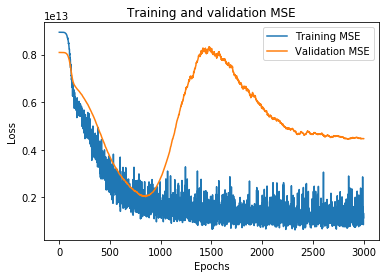

In [28]:
acc2 = history2.history['mean_absolute_error']
val_acc2 = history2.history['val_mean_absolute_error']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss2, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss2, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

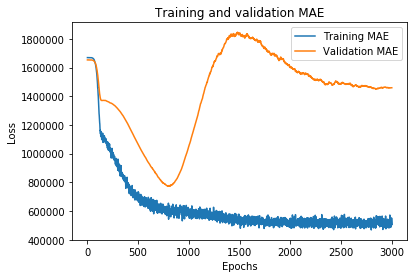

In [29]:
plt.plot(epochs, acc2, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc2, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
# Primero, definimos una función que permita construir el modelo, donde todos los valores de los hiperparámetros se obtienen del diccionario params 

model3 = Sequential()

model3.add(Dense(512, input_dim=X_train.shape[1]))
model3.add(Activation('relu'))

model3.add(Dense(256))
model3.add(Activation('relu'))

model3.add(Dense(256))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(32))
model3.add(Activation('relu'))
model3.add(Dropout(0.6))

model3.add(Dense(1))

model3.compile(optimizer=RMSprop(lr=1e-6), loss='mse', metrics=['mae',r2_for_keras])

In [31]:
history3 = model3.fit(X_train, y_train, batch_size=16, epochs=3000, validation_split = 0.3, 
                    verbose=1)

Train on 1249 samples, validate on 536 samples
Epoch 1/3000
1249/1249 [==============================] - 1s 996us/step - loss: 8938851026771.8301 - mean_absolute_error: 1669195.0236 - r2_for_keras: -14889933306882504.0000 - val_loss: 8088665941802.0303 - val_mean_absolute_error: 1653097.4571 - val_r2_for_keras: -2.1346
Epoch 2/3000
1249/1249 [==============================] - 1s 567us/step - loss: 8938850750040.9531 - mean_absolute_error: 1669194.9274 - r2_for_keras: -25338269230563856.0000 - val_loss: 8088665887025.6719 - val_mean_absolute_error: 1653097.4104 - val_r2_for_keras: -2.1346
Epoch 3/3000
1249/1249 [==============================] - 1s 585us/step - loss: 8938850792227.4590 - mean_absolute_error: 1669194.9063 - r2_for_keras: -15825278781401950.0000 - val_loss: 8088665652269.8506 - val_mean_absolute_error: 1653097.3787 - val_r2_for_keras: -2.1346
Epoch 4/3000
1249/1249 [==============================] - 1s 602us/step - loss: 8938850863797.5977 - mean_absolute_error: 1669194.9

Epoch 31/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8938845955733.6230 - mean_absolute_error: 1669193.6410 - r2_for_keras: -1217515568819442.2500 - val_loss: 8088660444603.2236 - val_mean_absolute_error: 1653095.9123 - val_r2_for_keras: -2.1346
Epoch 32/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938845580095.3340 - mean_absolute_error: 1669193.4895 - r2_for_keras: -13263794343198132.0000 - val_loss: 8088660245060.7764 - val_mean_absolute_error: 1653095.8302 - val_r2_for_keras: -2.1346
Epoch 33/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8938845739396.6113 - mean_absolute_error: 1669193.4159 - r2_for_keras: -7616795055863667.0000 - val_loss: 8088659994654.5674 - val_mean_absolute_error: 1653095.7593 - val_r2_for_keras: -2.1346
Epoch 34/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938845349958.5078 - mean_absolute_error: 1669193.3833 - r2_for_keras: -27550023580720256.0000 -

Epoch 61/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8938835743608.7227 - mean_absolute_error: 1669190.5288 - r2_for_keras: -216410142817723360.0000 - val_loss: 8088650880259.8213 - val_mean_absolute_error: 1653092.9422 - val_r2_for_keras: -2.1346
Epoch 62/3000
1249/1249 [==============================] - 1s 533us/step - loss: 8938835053250.7148 - mean_absolute_error: 1669190.2766 - r2_for_keras: -1303866735670551.7500 - val_loss: 8088650332496.2393 - val_mean_absolute_error: 1653092.8004 - val_r2_for_keras: -2.1346
Epoch 63/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8938834372862.1543 - mean_absolute_error: 1669190.3901 - r2_for_keras: -24859244850037380.0000 - val_loss: 8088649866897.1943 - val_mean_absolute_error: 1653092.6940 - val_r2_for_keras: -2.1346
Epoch 64/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8938833199825.4727 - mean_absolute_error: 1669190.1266 - r2_for_keras: -20319437926229392.0000

Epoch 91/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938809822205.5410 - mean_absolute_error: 1669183.4784 - r2_for_keras: -189431602950007808.0000 - val_loss: 8088629891133.1348 - val_mean_absolute_error: 1653086.6978 - val_r2_for_keras: -2.1346
Epoch 92/3000
1249/1249 [==============================] - 1s 539us/step - loss: 8938807313682.6504 - mean_absolute_error: 1669183.2346 - r2_for_keras: -184579047030203040.0000 - val_loss: 8088628586282.0303 - val_mean_absolute_error: 1653086.4067 - val_r2_for_keras: -2.1346
Epoch 93/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8938809997536.6406 - mean_absolute_error: 1669183.2419 - r2_for_keras: -3596631060234046.0000 - val_loss: 8088627547487.5225 - val_mean_absolute_error: 1653086.0896 - val_r2_for_keras: -2.1346
Epoch 94/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938804452136.3770 - mean_absolute_error: 1669181.8903 - r2_for_keras: -69890881811027568.000

Epoch 121/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8938753399723.5547 - mean_absolute_error: 1669168.6046 - r2_for_keras: -3583988877298504.0000 - val_loss: 8088584638036.0596 - val_mean_absolute_error: 1653073.4888 - val_r2_for_keras: -2.1346
Epoch 122/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8938751577964.4258 - mean_absolute_error: 1669167.1719 - r2_for_keras: -23071097381615016.0000 - val_loss: 8088582411768.3584 - val_mean_absolute_error: 1653072.8489 - val_r2_for_keras: -2.1346
Epoch 123/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938754064869.3555 - mean_absolute_error: 1669166.3770 - r2_for_keras: -9771949646125866.0000 - val_loss: 8088580103336.1191 - val_mean_absolute_error: 1653072.1959 - val_r2_for_keras: -2.1346
Epoch 124/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8938751638673.1152 - mean_absolute_error: 1669166.0242 - r2_for_keras: -5297158279779366.000

Epoch 151/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8938643896098.6387 - mean_absolute_error: 1669137.4118 - r2_for_keras: -4305079677862428.5000 - val_loss: 8088494018376.5967 - val_mean_absolute_error: 1653047.1063 - val_r2_for_keras: -2.1345
Epoch 152/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8938632899981.6309 - mean_absolute_error: 1669136.1781 - r2_for_keras: -138925296002517280.0000 - val_loss: 8088489753645.8506 - val_mean_absolute_error: 1653045.8787 - val_r2_for_keras: -2.1345
Epoch 153/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8938618618275.7656 - mean_absolute_error: 1669133.6035 - r2_for_keras: -51363630231802000.0000 - val_loss: 8088485522172.1787 - val_mean_absolute_error: 1653044.6922 - val_r2_for_keras: -2.1345
Epoch 154/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8938618540199.2520 - mean_absolute_error: 1669132.7982 - r2_for_keras: -13408864734861636.

Epoch 181/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8938368731501.6562 - mean_absolute_error: 1669071.6289 - r2_for_keras: -3184166527219519.0000 - val_loss: 8088325416746.0303 - val_mean_absolute_error: 1652998.7332 - val_r2_for_keras: -2.1343
Epoch 182/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8938378161497.1602 - mean_absolute_error: 1669068.7166 - r2_for_keras: -294475813472732160.0000 - val_loss: 8088318624477.6123 - val_mean_absolute_error: 1652996.6343 - val_r2_for_keras: -2.1343
Epoch 183/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8938368156369.4727 - mean_absolute_error: 1669065.9492 - r2_for_keras: -39739614430479400.0000 - val_loss: 8088311247275.9404 - val_mean_absolute_error: 1652994.5354 - val_r2_for_keras: -2.1343
Epoch 184/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8938371236089.2363 - mean_absolute_error: 1669066.0591 - r2_for_keras: -7761861926272960.0

Epoch 211/3000
1249/1249 [==============================] - 1s 528us/step - loss: 8937983662691.6133 - mean_absolute_error: 1668960.7144 - r2_for_keras: -54036579091781128.0000 - val_loss: 8088031234445.3730 - val_mean_absolute_error: 1652914.8881 - val_r2_for_keras: -2.1340
Epoch 212/3000
1249/1249 [==============================] - 1s 533us/step - loss: 8937903752952.0059 - mean_absolute_error: 1668948.4220 - r2_for_keras: -9597848274109442.0000 - val_loss: 8088018860857.3135 - val_mean_absolute_error: 1652911.3377 - val_r2_for_keras: -2.1340
Epoch 213/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8937899841255.6094 - mean_absolute_error: 1668944.5665 - r2_for_keras: -370580314551718272.0000 - val_loss: 8088005288058.2686 - val_mean_absolute_error: 1652907.5746 - val_r2_for_keras: -2.1340
Epoch 214/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8937882486808.5957 - mean_absolute_error: 1668940.8934 - r2_for_keras: -3955057765872173.0

Epoch 241/3000
1249/1249 [==============================] - 1s 533us/step - loss: 8937111022359.9805 - mean_absolute_error: 1668741.0643 - r2_for_keras: -8483792986123284.0000 - val_loss: 8087530441590.4482 - val_mean_absolute_error: 1652773.8116 - val_r2_for_keras: -2.1336
Epoch 242/3000
1249/1249 [==============================] - 1s 538us/step - loss: 8937211768349.9238 - mean_absolute_error: 1668744.4823 - r2_for_keras: -4357537562489467.0000 - val_loss: 8087506615830.9258 - val_mean_absolute_error: 1652767.2369 - val_r2_for_keras: -2.1335
Epoch 243/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8937162104654.9102 - mean_absolute_error: 1668729.7826 - r2_for_keras: -230371507303817888.0000 - val_loss: 8087484110572.8955 - val_mean_absolute_error: 1652760.9142 - val_r2_for_keras: -2.1335
Epoch 244/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8936979277159.9160 - mean_absolute_error: 1668716.9951 - r2_for_keras: -8691729209551693.00

Epoch 271/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8935793375272.9922 - mean_absolute_error: 1668390.8872 - r2_for_keras: -2788655952923438.0000 - val_loss: 8086700939722.5078 - val_mean_absolute_error: 1652542.8060 - val_r2_for_keras: -2.1328
Epoch 272/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8935606844810.3496 - mean_absolute_error: 1668376.3956 - r2_for_keras: -10820616123704038.0000 - val_loss: 8086666070657.9102 - val_mean_absolute_error: 1652533.1306 - val_r2_for_keras: -2.1327
Epoch 273/3000
1249/1249 [==============================] - 1s 529us/step - loss: 8935739509298.4199 - mean_absolute_error: 1668369.8566 - r2_for_keras: -10300440605826070.0000 - val_loss: 8086629857616.2393 - val_mean_absolute_error: 1652523.1045 - val_r2_for_keras: -2.1327
Epoch 274/3000
1249/1249 [==============================] - 1s 533us/step - loss: 8935697937016.9277 - mean_absolute_error: 1668353.9240 - r2_for_keras: -23471592511326932.0

Epoch 301/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8933449468846.8340 - mean_absolute_error: 1667786.3048 - r2_for_keras: -13638446107932768.0000 - val_loss: 8085383315945.0742 - val_mean_absolute_error: 1652179.0448 - val_r2_for_keras: -2.1315
Epoch 302/3000
1249/1249 [==============================] - 1s 529us/step - loss: 8933339702605.6816 - mean_absolute_error: 1667769.4141 - r2_for_keras: -47168802343795544.0000 - val_loss: 8085321999680.9551 - val_mean_absolute_error: 1652162.2556 - val_r2_for_keras: -2.1315
Epoch 303/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8932866433233.8828 - mean_absolute_error: 1667727.9074 - r2_for_keras: -934536356324989.3750 - val_loss: 8085268250379.4629 - val_mean_absolute_error: 1652147.4552 - val_r2_for_keras: -2.1314
Epoch 304/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8932824562990.5273 - mean_absolute_error: 1667704.1520 - r2_for_keras: -19129475841503252.00

Epoch 331/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8929745448031.9238 - mean_absolute_error: 1666857.4995 - r2_for_keras: -4170246452507495.0000 - val_loss: 8083335879359.0449 - val_mean_absolute_error: 1651618.9720 - val_r2_for_keras: -2.1296
Epoch 332/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8929049703662.5781 - mean_absolute_error: 1666822.4307 - r2_for_keras: -190779496807407712.0000 - val_loss: 8083255047061.0146 - val_mean_absolute_error: 1651596.8172 - val_r2_for_keras: -2.1296
Epoch 333/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8929373790030.9102 - mean_absolute_error: 1666753.0230 - r2_for_keras: -1109559526670665.8750 - val_loss: 8083164814748.6562 - val_mean_absolute_error: 1651572.2612 - val_r2_for_keras: -2.1295
Epoch 334/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8928833011948.1191 - mean_absolute_error: 1666707.8573 - r2_for_keras: -138561085636835520.

Epoch 361/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8922276728382.7188 - mean_absolute_error: 1665263.5889 - r2_for_keras: -11333860052665186.0000 - val_loss: 8080214996350.0898 - val_mean_absolute_error: 1650770.8974 - val_r2_for_keras: -2.1268
Epoch 362/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8924075318672.9082 - mean_absolute_error: 1665420.2943 - r2_for_keras: -2494493677207645.5000 - val_loss: 8080086496882.6270 - val_mean_absolute_error: 1650736.1418 - val_r2_for_keras: -2.1266
Epoch 363/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8923080689400.0059 - mean_absolute_error: 1665245.0779 - r2_for_keras: -6986429370078441.0000 - val_loss: 8079957745052.6562 - val_mean_absolute_error: 1650701.1381 - val_r2_for_keras: -2.1265
Epoch 364/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8922935172719.9102 - mean_absolute_error: 1665188.0940 - r2_for_keras: -2283531375940579.500

Epoch 391/3000
1249/1249 [==============================] - 1s 544us/step - loss: 8912137927195.4648 - mean_absolute_error: 1662869.8498 - r2_for_keras: -9846932113635134.0000 - val_loss: 8075505546133.0146 - val_mean_absolute_error: 1649500.2966 - val_r2_for_keras: -2.1224
Epoch 392/3000
1249/1249 [==============================] - 1s 541us/step - loss: 8913996627849.9414 - mean_absolute_error: 1663020.3779 - r2_for_keras: -143040994265865968.0000 - val_loss: 8075311160488.1191 - val_mean_absolute_error: 1649448.0709 - val_r2_for_keras: -2.1222
Epoch 393/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8913291366357.3672 - mean_absolute_error: 1662894.9561 - r2_for_keras: -11177957402731238.0000 - val_loss: 8075125760122.2686 - val_mean_absolute_error: 1649398.0728 - val_r2_for_keras: -2.1221
Epoch 394/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8912561187122.6250 - mean_absolute_error: 1662776.4880 - r2_for_keras: -2992036773793135.5

1249/1249 [==============================] - 1s 536us/step - loss: 8899031666448.6016 - mean_absolute_error: 1659885.2361 - r2_for_keras: -954586377809558.1250 - val_loss: 8068957318128.7168 - val_mean_absolute_error: 1647740.9646 - val_r2_for_keras: -2.1164
Epoch 421/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8900047588520.0703 - mean_absolute_error: 1659898.3845 - r2_for_keras: -2296349181429957.5000 - val_loss: 8068703075618.3877 - val_mean_absolute_error: 1647672.7761 - val_r2_for_keras: -2.1162
Epoch 422/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8900276637030.2773 - mean_absolute_error: 1659642.1424 - r2_for_keras: -1012995072016110.6250 - val_loss: 8068430518241.4326 - val_mean_absolute_error: 1647599.6623 - val_r2_for_keras: -2.1159
Epoch 423/3000
1249/1249 [==============================] - 1s 533us/step - loss: 8899771699026.1895 - mean_absolute_error: 1659488.4116 - r2_for_keras: -1343003055377473.2500 - val_loss: 806

Epoch 450/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8876427822853.1250 - mean_absolute_error: 1654872.0198 - r2_for_keras: -11076277666098222.0000 - val_loss: 8059278605602.3877 - val_mean_absolute_error: 1645151.4590 - val_r2_for_keras: -2.1076
Epoch 451/3000
1249/1249 [==============================] - 1s 525us/step - loss: 8878564471666.1641 - mean_absolute_error: 1654541.4579 - r2_for_keras: -2159647490558647.5000 - val_loss: 8058869332304.2393 - val_mean_absolute_error: 1645042.3321 - val_r2_for_keras: -2.1072
Epoch 452/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8880453606197.4961 - mean_absolute_error: 1654907.1103 - r2_for_keras: -4574614961852886.0000 - val_loss: 8058509682474.0303 - val_mean_absolute_error: 1644945.5765 - val_r2_for_keras: -2.1069
Epoch 453/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8877572807136.4355 - mean_absolute_error: 1654492.3698 - r2_for_keras: -4330144845658798.500

Epoch 480/3000
1249/1249 [==============================] - 1s 537us/step - loss: 8850020086615.9297 - mean_absolute_error: 1647924.6602 - r2_for_keras: -30639563223415508.0000 - val_loss: 8045722214033.1943 - val_mean_absolute_error: 1641529.8340 - val_r2_for_keras: -2.0953
Epoch 481/3000
1249/1249 [==============================] - 1s 541us/step - loss: 8854918016882.9844 - mean_absolute_error: 1648238.5604 - r2_for_keras: -3854883805571670.0000 - val_loss: 8045233155056.7168 - val_mean_absolute_error: 1641398.4981 - val_r2_for_keras: -2.0948
Epoch 482/3000
1249/1249 [==============================] - 1s 539us/step - loss: 8847777320655.0137 - mean_absolute_error: 1647759.0256 - r2_for_keras: -229278045190778560.0000 - val_loss: 8044677990797.3730 - val_mean_absolute_error: 1641250.5056 - val_r2_for_keras: -2.0943
Epoch 483/3000
1249/1249 [==============================] - 1s 543us/step - loss: 8849358729258.6328 - mean_absolute_error: 1647906.1676 - r2_for_keras: -8414623229004892.0

Epoch 510/3000
1249/1249 [==============================] - 1s 535us/step - loss: 8811855377751.5195 - mean_absolute_error: 1638890.6662 - r2_for_keras: -3426416492632782.5000 - val_loss: 8027050088172.8955 - val_mean_absolute_error: 1636544.0000 - val_r2_for_keras: -2.0784
Epoch 511/3000
1249/1249 [==============================] - 1s 524us/step - loss: 8805460121936.1406 - mean_absolute_error: 1638366.8422 - r2_for_keras: -12921175428032362.0000 - val_loss: 8026348672993.4326 - val_mean_absolute_error: 1636356.9067 - val_r2_for_keras: -2.0777
Epoch 512/3000
1249/1249 [==============================] - 1s 529us/step - loss: 8804404468572.8477 - mean_absolute_error: 1637827.6857 - r2_for_keras: -19233315867595488.0000 - val_loss: 8025592479499.4629 - val_mean_absolute_error: 1636155.8713 - val_r2_for_keras: -2.0770
Epoch 513/3000
1249/1249 [==============================] - 1s 526us/step - loss: 8800597738705.0645 - mean_absolute_error: 1636858.8160 - r2_for_keras: -26263969989795940.0

Epoch 540/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8758668900550.4053 - mean_absolute_error: 1625696.4683 - r2_for_keras: -10959028703965726.0000 - val_loss: 8001617196169.5518 - val_mean_absolute_error: 1629742.9030 - val_r2_for_keras: -2.0555
Epoch 541/3000
1249/1249 [==============================] - 1s 532us/step - loss: 8760808723674.9004 - mean_absolute_error: 1624918.0925 - r2_for_keras: -8280896557786160.0000 - val_loss: 8000585463899.7012 - val_mean_absolute_error: 1629467.3825 - val_r2_for_keras: -2.0546
Epoch 542/3000
1249/1249 [==============================] - 1s 534us/step - loss: 8754223511291.2861 - mean_absolute_error: 1624410.8051 - r2_for_keras: -14257345269532568.0000 - val_loss: 7999538971357.6123 - val_mean_absolute_error: 1629186.5877 - val_r2_for_keras: -2.0536
Epoch 543/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8753504510011.0303 - mean_absolute_error: 1625001.6657 - r2_for_keras: -7140699478528235.00

Epoch 570/3000
1249/1249 [==============================] - 1s 539us/step - loss: 8685796451989.6240 - mean_absolute_error: 1608139.0675 - r2_for_keras: -9416155958324952.0000 - val_loss: 7967503389955.8213 - val_mean_absolute_error: 1620570.3825 - val_r2_for_keras: -2.0250
Epoch 571/3000
1249/1249 [==============================] - 1s 529us/step - loss: 8689239697872.0381 - mean_absolute_error: 1607705.9495 - r2_for_keras: -3002406867448220.0000 - val_loss: 7966165273951.5225 - val_mean_absolute_error: 1620210.3097 - val_r2_for_keras: -2.0238
Epoch 572/3000
1249/1249 [==============================] - 1s 552us/step - loss: 8685812539739.6191 - mean_absolute_error: 1605970.2132 - r2_for_keras: -23967860473730808.0000 - val_loss: 7964756958131.5820 - val_mean_absolute_error: 1619830.7407 - val_r2_for_keras: -2.0226
Epoch 573/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8670294446916.2529 - mean_absolute_error: 1605566.5534 - r2_for_keras: -12105864227727302.00

Epoch 600/3000
1249/1249 [==============================] - 1s 538us/step - loss: 8583649962106.9775 - mean_absolute_error: 1582300.1299 - r2_for_keras: -2673749945312421.0000 - val_loss: 7921993266558.0898 - val_mean_absolute_error: 1608237.5672 - val_r2_for_keras: -1.9847
Epoch 601/3000
1249/1249 [==============================] - 1s 545us/step - loss: 8585718156246.1875 - mean_absolute_error: 1585432.6275 - r2_for_keras: -84678628320670496.0000 - val_loss: 7920204284393.0742 - val_mean_absolute_error: 1607752.7724 - val_r2_for_keras: -1.9831
Epoch 602/3000
1249/1249 [==============================] - 1s 541us/step - loss: 8576870399986.8818 - mean_absolute_error: 1584472.7841 - r2_for_keras: -12400149527262132.0000 - val_loss: 7918571898054.6865 - val_mean_absolute_error: 1607305.7687 - val_r2_for_keras: -1.9817
Epoch 603/3000
1249/1249 [==============================] - 1s 538us/step - loss: 8562294729974.7764 - mean_absolute_error: 1580430.8828 - r2_for_keras: -879261358288953.500

Epoch 630/3000
1249/1249 [==============================] - 1s 530us/step - loss: 8424915305313.7676 - mean_absolute_error: 1550910.0867 - r2_for_keras: -9772504243664296.0000 - val_loss: 7863912892324.2988 - val_mean_absolute_error: 1592341.9198 - val_r2_for_keras: -1.9337
Epoch 631/3000
1249/1249 [==============================] - 1s 527us/step - loss: 8473054802028.2207 - mean_absolute_error: 1551719.7253 - r2_for_keras: -23351241324233440.0000 - val_loss: 7861773143880.5967 - val_mean_absolute_error: 1591750.5606 - val_r2_for_keras: -1.9319
Epoch 632/3000
1249/1249 [==============================] - 1s 537us/step - loss: 8417876345487.8848 - mean_absolute_error: 1548132.7946 - r2_for_keras: -12434870854422054.0000 - val_loss: 7859500764266.9854 - val_mean_absolute_error: 1591124.0532 - val_r2_for_keras: -1.9299
Epoch 633/3000
1249/1249 [==============================] - 1s 543us/step - loss: 8447735915210.9141 - mean_absolute_error: 1548734.4104 - r2_for_keras: -1530869560305565.75

Epoch 660/3000
1249/1249 [==============================] - 1s 556us/step - loss: 8282249369962.3760 - mean_absolute_error: 1514204.6944 - r2_for_keras: -14580849936520676.0000 - val_loss: 7791565450224.7168 - val_mean_absolute_error: 1572192.4776 - val_r2_for_keras: -1.8711
Epoch 661/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8283121556106.9648 - mean_absolute_error: 1510149.9126 - r2_for_keras: -472936957287445.9375 - val_loss: 7788797686921.5518 - val_mean_absolute_error: 1571427.2612 - val_r2_for_keras: -1.8687
Epoch 662/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8272778822733.8867 - mean_absolute_error: 1508679.7538 - r2_for_keras: -152394628595025248.0000 - val_loss: 7786083483158.9258 - val_mean_absolute_error: 1570676.0205 - val_r2_for_keras: -1.8664
Epoch 663/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8296085058037.7520 - mean_absolute_error: 1509792.4751 - r2_for_keras: -3500488936006571.50

Epoch 690/3000
1249/1249 [==============================] - 1s 531us/step - loss: 8083186772694.3916 - mean_absolute_error: 1455413.2012 - r2_for_keras: -484520783253816.9375 - val_loss: 7699556128248.3584 - val_mean_absolute_error: 1546747.5718 - val_r2_for_keras: -1.7928
Epoch 691/3000
1249/1249 [==============================] - 1s 536us/step - loss: 8117534508123.0049 - mean_absolute_error: 1461896.5154 - r2_for_keras: -14063645476884294.0000 - val_loss: 7696238742879.5225 - val_mean_absolute_error: 1545824.1390 - val_r2_for_keras: -1.7900
Epoch 692/3000
1249/1249 [==============================] - 1s 540us/step - loss: 8112334893459.3691 - mean_absolute_error: 1454408.3543 - r2_for_keras: -758610204352257.7500 - val_loss: 7692617966912.9551 - val_mean_absolute_error: 1544848.1082 - val_r2_for_keras: -1.7870
Epoch 693/3000
1249/1249 [==============================] - 1s 538us/step - loss: 8012453650399.2061 - mean_absolute_error: 1455921.2299 - r2_for_keras: -2646096875748432.5000 

Epoch 720/3000
1249/1249 [==============================] - 1s 540us/step - loss: 7859401911063.9805 - mean_absolute_error: 1399404.9397 - r2_for_keras: -4614362879400798.0000 - val_loss: 7589954038768.7168 - val_mean_absolute_error: 1516311.8470 - val_r2_for_keras: -1.7019
Epoch 721/3000
1249/1249 [==============================] - 1s 537us/step - loss: 7892113528853.3164 - mean_absolute_error: 1405498.1313 - r2_for_keras: -5972931418945145.0000 - val_loss: 7586034797185.9102 - val_mean_absolute_error: 1515196.3563 - val_r2_for_keras: -1.6986
Epoch 722/3000
1249/1249 [==============================] - 1s 542us/step - loss: 7811013156437.6748 - mean_absolute_error: 1392611.9781 - r2_for_keras: -2898677760863670.5000 - val_loss: 7582141816954.2686 - val_mean_absolute_error: 1514095.0354 - val_r2_for_keras: -1.6955
Epoch 723/3000
1249/1249 [==============================] - 1s 543us/step - loss: 7850299029420.3740 - mean_absolute_error: 1391722.5776 - r2_for_keras: -664431344406906.3750 

Epoch 750/3000
1249/1249 [==============================] - 1s 541us/step - loss: 7601518934122.5811 - mean_absolute_error: 1326532.1524 - r2_for_keras: -2741409744608920.5000 - val_loss: 7461298750173.6123 - val_mean_absolute_error: 1479932.1007 - val_r2_for_keras: -1.5987
Epoch 751/3000
1249/1249 [==============================] - 1s 538us/step - loss: 7543182882187.9902 - mean_absolute_error: 1317476.2371 - r2_for_keras: -523512236361661.8750 - val_loss: 7456664806231.8809 - val_mean_absolute_error: 1478614.8769 - val_r2_for_keras: -1.5950
Epoch 752/3000
1249/1249 [==============================] - 1s 544us/step - loss: 7565854703983.2959 - mean_absolute_error: 1319809.8503 - r2_for_keras: -1342662043914854.2500 - val_loss: 7452288520497.6719 - val_mean_absolute_error: 1477359.3582 - val_r2_for_keras: -1.5916
Epoch 753/3000
1249/1249 [==============================] - 1s 550us/step - loss: 7521309518855.3789 - mean_absolute_error: 1318603.1130 - r2_for_keras: -349066056530421.0625 -

Epoch 780/3000
1249/1249 [==============================] - 1s 531us/step - loss: 7144951029530.4404 - mean_absolute_error: 1242926.9291 - r2_for_keras: -1738426148514217.5000 - val_loss: 7317849168330.5078 - val_mean_absolute_error: 1441125.5382 - val_r2_for_keras: -1.4890
Epoch 781/3000
1249/1249 [==============================] - 1s 535us/step - loss: 7277005915935.3604 - mean_absolute_error: 1241943.3882 - r2_for_keras: -5398313789691533.0000 - val_loss: 7312588218979.3438 - val_mean_absolute_error: 1439775.9049 - val_r2_for_keras: -1.4851
Epoch 782/3000
1249/1249 [==============================] - ETA: 0s - loss: 7318105206411.6367 - mean_absolute_error: 1236841.9278 - r2_for_keras: -0.902 - 1s 540us/step - loss: 7355934671844.9443 - mean_absolute_error: 1245485.1215 - r2_for_keras: -4200891487759955.5000 - val_loss: 7307149871501.3730 - val_mean_absolute_error: 1438409.0317 - val_r2_for_keras: -1.4811
Epoch 783/3000
1249/1249 [==============================] - 1s 538us/step - los

1249/1249 [==============================] - 1s 524us/step - loss: 7015615222285.4248 - mean_absolute_error: 1166001.9713 - r2_for_keras: -13676416390442.3086 - val_loss: 7166752510502.2090 - val_mean_absolute_error: 1404553.7556 - val_r2_for_keras: -1.3814
Epoch 810/3000
1249/1249 [==============================] - 1s 532us/step - loss: 6808277764763.3623 - mean_absolute_error: 1159937.6867 - r2_for_keras: -7054300224549288.0000 - val_loss: 7161589567793.6719 - val_mean_absolute_error: 1403372.2108 - val_r2_for_keras: -1.3778
Epoch 811/3000
1249/1249 [==============================] - 1s 542us/step - loss: 6909128287067.2090 - mean_absolute_error: 1167715.1137 - r2_for_keras: -1551661355997783.0000 - val_loss: 7156236722298.2686 - val_mean_absolute_error: 1402159.4244 - val_r2_for_keras: -1.3742
Epoch 812/3000
1249/1249 [==============================] - 1s 538us/step - loss: 6802070546266.3887 - mean_absolute_error: 1158854.9128 - r2_for_keras: -1545633518982376.7500 - val_loss: 7151

Epoch 839/3000
1249/1249 [==============================] - 1s 537us/step - loss: 6661511301400.3906 - mean_absolute_error: 1113391.8271 - r2_for_keras: -560555885694160.0000 - val_loss: 7013473966538.5078 - val_mean_absolute_error: 1372420.7733 - val_r2_for_keras: -1.2833
Epoch 840/3000
1249/1249 [==============================] - 1s 539us/step - loss: 6705716139371.1963 - mean_absolute_error: 1101716.3069 - r2_for_keras: -1582739285439963.2500 - val_loss: 7008402309609.0742 - val_mean_absolute_error: 1371487.3899 - val_r2_for_keras: -1.2803
Epoch 841/3000
1249/1249 [==============================] - 1s 544us/step - loss: 6682476680056.7236 - mean_absolute_error: 1094161.2544 - r2_for_keras: -2790528599929190.0000 - val_loss: 7003165577277.1348 - val_mean_absolute_error: 1370554.4366 - val_r2_for_keras: -1.2773
Epoch 842/3000
1249/1249 [==============================] - 1s 539us/step - loss: 6627723527619.7412 - mean_absolute_error: 1089290.0881 - r2_for_keras: -248209523108711.1562 -

Epoch 869/3000
1249/1249 [==============================] - 1s 528us/step - loss: 6283564882759.5332 - mean_absolute_error: 1056599.2626 - r2_for_keras: -100506773843158.3750 - val_loss: 6874437806844.1787 - val_mean_absolute_error: 1350794.6138 - val_r2_for_keras: -1.2084
Epoch 870/3000
1249/1249 [==============================] - 1s 545us/step - loss: 6370005006560.6406 - mean_absolute_error: 1055381.6322 - r2_for_keras: -3138230885707124.0000 - val_loss: 6869755355502.8057 - val_mean_absolute_error: 1350193.3657 - val_r2_for_keras: -1.2062
Epoch 871/3000
1249/1249 [==============================] - 1s 540us/step - loss: 6285123058075.9775 - mean_absolute_error: 1058928.9971 - r2_for_keras: -24312764490312.1406 - val_loss: 6865858104671.5225 - val_mean_absolute_error: 1349711.3433 - val_r2_for_keras: -1.2044
Epoch 872/3000
1249/1249 [==============================] - 1s 539us/step - loss: 6347577582187.8115 - mean_absolute_error: 1055006.3322 - r2_for_keras: -278273083749575.5625 - v

Epoch 899/3000
1249/1249 [==============================] - 1s 528us/step - loss: 6038243420282.9785 - mean_absolute_error: 1031984.6915 - r2_for_keras: -6163529866945974.0000 - val_loss: 6755491295170.8652 - val_mean_absolute_error: 1338641.2388 - val_r2_for_keras: -1.1603
Epoch 900/3000
1249/1249 [==============================] - 1s 527us/step - loss: 5774832175633.6270 - mean_absolute_error: 1028095.6078 - r2_for_keras: -337535654592800.9375 - val_loss: 6751637935852.8955 - val_mean_absolute_error: 1338329.1446 - val_r2_for_keras: -1.1590
Epoch 901/3000
1249/1249 [==============================] - 1s 531us/step - loss: 6122696155270.0850 - mean_absolute_error: 1027022.7212 - r2_for_keras: -1848902395974.7712 - val_loss: 6748626827600.2393 - val_mean_absolute_error: 1338090.9142 - val_r2_for_keras: -1.1581
Epoch 902/3000
1249/1249 [==============================] - 1s 527us/step - loss: 6129491075460.6123 - mean_absolute_error: 1020907.9837 - r2_for_keras: -262733128675738.3750 - va

Epoch 929/3000
1249/1249 [==============================] - 1s 524us/step - loss: 5936713357018.4912 - mean_absolute_error: 1026177.3629 - r2_for_keras: -1452951577214412.5000 - val_loss: 6668072536216.8359 - val_mean_absolute_error: 1334396.1194 - val_r2_for_keras: -1.1382
Epoch 930/3000
1249/1249 [==============================] - 1s 526us/step - loss: 5897217254143.3848 - mean_absolute_error: 1024184.2027 - r2_for_keras: -1431048495700645.7500 - val_loss: 6664869279346.6270 - val_mean_absolute_error: 1334322.2071 - val_r2_for_keras: -1.1377
Epoch 931/3000
1249/1249 [==============================] - 1s 522us/step - loss: 5863563519899.9775 - mean_absolute_error: 1019349.6918 - r2_for_keras: -5055888983664212.0000 - val_loss: 6662766057930.5078 - val_mean_absolute_error: 1334268.8433 - val_r2_for_keras: -1.1373
Epoch 932/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5862661476256.8965 - mean_absolute_error: 1013791.5257 - r2_for_keras: -709727603181789.7500 

Epoch 959/3000
1249/1249 [==============================] - 1s 544us/step - loss: 5726554016621.2451 - mean_absolute_error: 1026913.1034 - r2_for_keras: -171759669190780.8750 - val_loss: 6601017017542.6865 - val_mean_absolute_error: 1333468.5354 - val_r2_for_keras: -1.1306
Epoch 960/3000
1249/1249 [==============================] - 1s 552us/step - loss: 5689256393689.4668 - mean_absolute_error: 1007780.5741 - r2_for_keras: -3917782649094813.5000 - val_loss: 6599147729323.9404 - val_mean_absolute_error: 1333469.8442 - val_r2_for_keras: -1.1305
Epoch 961/3000
1249/1249 [==============================] - 1s 540us/step - loss: 5938225165340.6953 - mean_absolute_error: 1023262.2117 - r2_for_keras: -2005585796342541.0000 - val_loss: 6597342465864.5967 - val_mean_absolute_error: 1333464.5168 - val_r2_for_keras: -1.1304
Epoch 962/3000
1249/1249 [==============================] - 1s 556us/step - loss: 5905381637160.1729 - mean_absolute_error: 1017797.9008 - r2_for_keras: -4755973198643988.0000 

Epoch 989/3000
1249/1249 [==============================] - 1s 531us/step - loss: 5736529062404.5098 - mean_absolute_error: 1037963.0564 - r2_for_keras: -694765408896747.3750 - val_loss: 6550455922137.7910 - val_mean_absolute_error: 1333881.2127 - val_r2_for_keras: -1.1299
Epoch 990/3000
1249/1249 [==============================] - 1s 535us/step - loss: 5669202978732.3740 - mean_absolute_error: 1022710.6625 - r2_for_keras: -242946953668902.0000 - val_loss: 6549215770715.7012 - val_mean_absolute_error: 1333899.9478 - val_r2_for_keras: -1.1299
Epoch 991/3000
1249/1249 [==============================] - 1s 527us/step - loss: 5780515329990.6104 - mean_absolute_error: 1025034.0514 - r2_for_keras: -22282204391037384.0000 - val_loss: 6547691419984.2393 - val_mean_absolute_error: 1333913.2575 - val_r2_for_keras: -1.1299
Epoch 992/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5861284231707.4648 - mean_absolute_error: 1038917.1014 - r2_for_keras: -188407333812357.4062 -

Epoch 1019/3000
1249/1249 [==============================] - 1s 529us/step - loss: 5616425863664.8330 - mean_absolute_error: 1015030.2266 - r2_for_keras: -5600773582506336.0000 - val_loss: 6510547147944.1191 - val_mean_absolute_error: 1334410.2537 - val_r2_for_keras: -1.1306
Epoch 1020/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5556977781980.5420 - mean_absolute_error: 1011014.6760 - r2_for_keras: -2362766638224695.5000 - val_loss: 6509431607846.2090 - val_mean_absolute_error: 1334442.7976 - val_r2_for_keras: -1.1306
Epoch 1021/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5389982223764.1885 - mean_absolute_error: 1006054.4002 - r2_for_keras: -6723483673189437.0000 - val_loss: 6508468486877.6123 - val_mean_absolute_error: 1334460.1035 - val_r2_for_keras: -1.1306
Epoch 1022/3000
1249/1249 [==============================] - 1s 524us/step - loss: 5708982118142.5654 - mean_absolute_error: 1031847.8066 - r2_for_keras: -57253660322671288

Epoch 1049/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5653511852750.1934 - mean_absolute_error: 1002179.8784 - r2_for_keras: -1841273290957791.0000 - val_loss: 6478251390578.6270 - val_mean_absolute_error: 1334527.7724 - val_r2_for_keras: -1.1297
Epoch 1050/3000
1249/1249 [==============================] - 1s 524us/step - loss: 5737211241405.5918 - mean_absolute_error: 1020451.3407 - r2_for_keras: -758940652052237.7500 - val_loss: 6477189658471.1641 - val_mean_absolute_error: 1334505.4646 - val_r2_for_keras: -1.1296
Epoch 1051/3000
1249/1249 [==============================] - 1s 527us/step - loss: 5828331747880.5830 - mean_absolute_error: 1028580.4235 - r2_for_keras: -974235526509898.7500 - val_loss: 6476214856444.1787 - val_mean_absolute_error: 1334497.6894 - val_r2_for_keras: -1.1296
Epoch 1052/3000
1249/1249 [==============================] - 1s 527us/step - loss: 5829278350692.8486 - mean_absolute_error: 1019080.6406 - r2_for_keras: -539418093678.4427 -

Epoch 1079/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5102703282476.0674 - mean_absolute_error: 1001707.1720 - r2_for_keras: -826149070574404.6250 - val_loss: 6447803157610.9854 - val_mean_absolute_error: 1334382.0550 - val_r2_for_keras: -1.1285
Epoch 1080/3000
1249/1249 [==============================] - 1s 529us/step - loss: 5487248265383.2500 - mean_absolute_error: 1011100.6945 - r2_for_keras: -6393323395583394.0000 - val_loss: 6446857860478.0898 - val_mean_absolute_error: 1334387.0653 - val_r2_for_keras: -1.1285
Epoch 1081/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5930208731824.6797 - mean_absolute_error: 1025266.7927 - r2_for_keras: -895456431705060.0000 - val_loss: 6446199456477.6123 - val_mean_absolute_error: 1334274.3619 - val_r2_for_keras: -1.1282
Epoch 1082/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5558235206337.0762 - mean_absolute_error: 1013517.7028 - r2_for_keras: -11471596552118122.0

Epoch 1109/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5663821580050.2412 - mean_absolute_error: 1028078.2754 - r2_for_keras: -857253519462371.2500 - val_loss: 6417439804522.9854 - val_mean_absolute_error: 1333961.4701 - val_r2_for_keras: -1.1270
Epoch 1110/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5668134569523.2412 - mean_absolute_error: 1024951.1514 - r2_for_keras: -9439698183674520.0000 - val_loss: 6416740036546.8652 - val_mean_absolute_error: 1333898.6978 - val_r2_for_keras: -1.1268
Epoch 1111/3000
1249/1249 [==============================] - 1s 536us/step - loss: 5404367824179.4453 - mean_absolute_error: 1021707.3501 - r2_for_keras: -21506403423620908.0000 - val_loss: 6415883365605.2539 - val_mean_absolute_error: 1333870.7183 - val_r2_for_keras: -1.1267
Epoch 1112/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5641550285965.8350 - mean_absolute_error: 1030687.1217 - r2_for_keras: -7816038182955577.

Epoch 1139/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5356041820837.2012 - mean_absolute_error: 1002154.3035 - r2_for_keras: -681361479639821.0000 - val_loss: 6390645178123.4629 - val_mean_absolute_error: 1332619.6968 - val_r2_for_keras: -1.1231
Epoch 1140/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5593650045131.3242 - mean_absolute_error: 1010058.7826 - r2_for_keras: -3771780885692167.0000 - val_loss: 6389712019822.8057 - val_mean_absolute_error: 1332582.6586 - val_r2_for_keras: -1.1230
Epoch 1141/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5611656847930.6201 - mean_absolute_error: 999022.3905 - r2_for_keras: -5588334311844777.0000 - val_loss: 6388657079983.7607 - val_mean_absolute_error: 1332542.9459 - val_r2_for_keras: -1.1229
Epoch 1142/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5662831447050.6582 - mean_absolute_error: 1018034.1467 - r2_for_keras: -700528546630667.250

Epoch 1169/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5395530916882.8564 - mean_absolute_error: 1019121.8891 - r2_for_keras: -5918810622016369.0000 - val_loss: 6362760254723.8213 - val_mean_absolute_error: 1331265.5606 - val_r2_for_keras: -1.1192
Epoch 1170/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5678797821310.8730 - mean_absolute_error: 999380.1642 - r2_for_keras: -52386231918034.7188 - val_loss: 6361464489647.7607 - val_mean_absolute_error: 1331246.1940 - val_r2_for_keras: -1.1191
Epoch 1171/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5662216485810.1133 - mean_absolute_error: 989311.9443 - r2_for_keras: -3760940264442969.5000 - val_loss: 6360239687343.7607 - val_mean_absolute_error: 1331194.2659 - val_r2_for_keras: -1.1190
Epoch 1172/3000
1249/1249 [==============================] - 1s 529us/step - loss: 5554698909277.8740 - mean_absolute_error: 1005516.4231 - r2_for_keras: -3083402195198414848.0

Epoch 1199/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5534628451140.2529 - mean_absolute_error: 1018468.4598 - r2_for_keras: -7101297084049899.0000 - val_loss: 6337113372030.0898 - val_mean_absolute_error: 1329305.6875 - val_r2_for_keras: -1.1134
Epoch 1200/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5381705923384.7754 - mean_absolute_error: 985195.1536 - r2_for_keras: -465623642406178.0000 - val_loss: 6336018569674.5078 - val_mean_absolute_error: 1329258.6082 - val_r2_for_keras: -1.1133
Epoch 1201/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5360881386770.6523 - mean_absolute_error: 971700.9298 - r2_for_keras: -3491404980452510.5000 - val_loss: 6335217640524.4180 - val_mean_absolute_error: 1329224.3284 - val_r2_for_keras: -1.1132
Epoch 1202/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5243727711360.7178 - mean_absolute_error: 988338.7590 - r2_for_keras: -19767884512066036.000

Epoch 1229/3000
1249/1249 [==============================] - 1s 536us/step - loss: 5530442988295.5840 - mean_absolute_error: 1004374.3286 - r2_for_keras: -393588932339140.1250 - val_loss: 6309367038685.6123 - val_mean_absolute_error: 1327437.3321 - val_r2_for_keras: -1.1081
Epoch 1230/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5265013409160.7109 - mean_absolute_error: 971164.2476 - r2_for_keras: -29874683425938336.0000 - val_loss: 6308681478327.4033 - val_mean_absolute_error: 1327346.8825 - val_r2_for_keras: -1.1078
Epoch 1231/3000
1249/1249 [==============================] - 1s 531us/step - loss: 5396466412980.9834 - mean_absolute_error: 1002358.6209 - r2_for_keras: -1519376076517576.5000 - val_loss: 6308018089678.3281 - val_mean_absolute_error: 1327254.3591 - val_r2_for_keras: -1.1075
Epoch 1232/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5393186988615.7373 - mean_absolute_error: 984726.3232 - r2_for_keras: -243064448018437.218

Epoch 1259/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5678150318343.9932 - mean_absolute_error: 993285.4134 - r2_for_keras: -10971082837447820.0000 - val_loss: 6283166457978.2686 - val_mean_absolute_error: 1325006.7239 - val_r2_for_keras: -1.1011
Epoch 1260/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5363546667914.7607 - mean_absolute_error: 978274.2274 - r2_for_keras: -1911114507238781.7500 - val_loss: 6282134846020.7764 - val_mean_absolute_error: 1324955.8563 - val_r2_for_keras: -1.1010
Epoch 1261/3000
1249/1249 [==============================] - 1s 529us/step - loss: 5060739974077.5918 - mean_absolute_error: 949744.1119 - r2_for_keras: -5961640517313555.0000 - val_loss: 6280795386039.4033 - val_mean_absolute_error: 1324961.2631 - val_r2_for_keras: -1.1010
Epoch 1262/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5540628811864.5449 - mean_absolute_error: 993844.2483 - r2_for_keras: -3490006602373470.000

Epoch 1289/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5343657061340.7461 - mean_absolute_error: 974515.5967 - r2_for_keras: -1044381331280249.5000 - val_loss: 6254237989200.2393 - val_mean_absolute_error: 1322933.8722 - val_r2_for_keras: -1.0950
Epoch 1290/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5561898897115.7217 - mean_absolute_error: 996246.2739 - r2_for_keras: -57998303032034.4062 - val_loss: 6253513476982.4482 - val_mean_absolute_error: 1322795.0606 - val_r2_for_keras: -1.0946
Epoch 1291/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4971457496089.4150 - mean_absolute_error: 965978.3669 - r2_for_keras: -1602693242708053.5000 - val_loss: 6252644030433.4326 - val_mean_absolute_error: 1322753.0560 - val_r2_for_keras: -1.0944
Epoch 1292/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5152933843875.3564 - mean_absolute_error: 993892.4436 - r2_for_keras: -358958002377199.5625 - 

Epoch 1319/3000
1249/1249 [==============================] - 1s 535us/step - loss: 5423286870402.9717 - mean_absolute_error: 974107.0079 - r2_for_keras: -1402255089967858.7500 - val_loss: 6225130831138.3877 - val_mean_absolute_error: 1320703.3862 - val_r2_for_keras: -1.0883
Epoch 1320/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4906917151415.2373 - mean_absolute_error: 958925.9634 - r2_for_keras: -8612184957210450.0000 - val_loss: 6224265342181.2539 - val_mean_absolute_error: 1320661.0560 - val_r2_for_keras: -1.0882
Epoch 1321/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5237525917896.0449 - mean_absolute_error: 984543.0661 - r2_for_keras: -6536942150197898.0000 - val_loss: 6223558638148.7764 - val_mean_absolute_error: 1320532.5560 - val_r2_for_keras: -1.0878
Epoch 1322/3000
1249/1249 [==============================] - 1s 531us/step - loss: 5050715599375.9873 - mean_absolute_error: 965640.8919 - r2_for_keras: -21441110567390208.000

Epoch 1349/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5308191767631.5264 - mean_absolute_error: 956863.1996 - r2_for_keras: -1937894965993295.5000 - val_loss: 6196269706958.3281 - val_mean_absolute_error: 1318118.6287 - val_r2_for_keras: -1.0808
Epoch 1350/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4844611712172.9893 - mean_absolute_error: 981573.0850 - r2_for_keras: -5353541482539512.0000 - val_loss: 6195533566502.2090 - val_mean_absolute_error: 1317998.9888 - val_r2_for_keras: -1.0804
Epoch 1351/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5266374716197.0986 - mean_absolute_error: 978936.9570 - r2_for_keras: -1126983682865639.5000 - val_loss: 6194487979726.3281 - val_mean_absolute_error: 1317880.1306 - val_r2_for_keras: -1.0801
Epoch 1352/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5645552617706.4785 - mean_absolute_error: 983813.9361 - r2_for_keras: -4597470542631067.0000

Epoch 1379/3000
1249/1249 [==============================] - 1s 535us/step - loss: 5080397166908.4639 - mean_absolute_error: 967410.2528 - r2_for_keras: -1398822527346077.0000 - val_loss: 6166990763390.0898 - val_mean_absolute_error: 1315511.6427 - val_r2_for_keras: -1.0731
Epoch 1380/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5300297606346.5049 - mean_absolute_error: 938975.1955 - r2_for_keras: -3215437685486595.0000 - val_loss: 6165812975829.9697 - val_mean_absolute_error: 1315487.7090 - val_r2_for_keras: -1.0730
Epoch 1381/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5223103884383.9229 - mean_absolute_error: 986863.3710 - r2_for_keras: -509932409452913.2500 - val_loss: 6164673362500.7764 - val_mean_absolute_error: 1315363.3172 - val_r2_for_keras: -1.0727
Epoch 1382/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5621804558640.9863 - mean_absolute_error: 958053.6675 - r2_for_keras: -38025948586174.4844 - 

Epoch 1409/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5060375276334.1172 - mean_absolute_error: 954600.1639 - r2_for_keras: -25463764144767.7500 - val_loss: 6136555749131.4629 - val_mean_absolute_error: 1312782.9524 - val_r2_for_keras: -1.0651
Epoch 1410/3000
1249/1249 [==============================] - 1s 540us/step - loss: 5508053387870.6934 - mean_absolute_error: 980848.5474 - r2_for_keras: -144905044019421.7188 - val_loss: 6136105558871.8809 - val_mean_absolute_error: 1312570.8451 - val_r2_for_keras: -1.0645
Epoch 1411/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4870805719707.3623 - mean_absolute_error: 947050.3915 - r2_for_keras: -639531015323346.6250 - val_loss: 6135213324379.7012 - val_mean_absolute_error: 1312464.4608 - val_r2_for_keras: -1.0642
Epoch 1412/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5087727429230.2705 - mean_absolute_error: 948627.5615 - r2_for_keras: -379799755863554.5625 - va

Epoch 1439/3000
1249/1249 [==============================] - 1s 536us/step - loss: 5008789798607.0137 - mean_absolute_error: 920538.6941 - r2_for_keras: -23421477966358.8047 - val_loss: 6106095202242.8652 - val_mean_absolute_error: 1309935.4468 - val_r2_for_keras: -1.0568
Epoch 1440/3000
1249/1249 [==============================] - 1s 536us/step - loss: 5273684232147.7275 - mean_absolute_error: 949816.4957 - r2_for_keras: -254265750236203.8125 - val_loss: 6104625862625.4326 - val_mean_absolute_error: 1309863.0690 - val_r2_for_keras: -1.0566
Epoch 1441/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5337749526024.6084 - mean_absolute_error: 940172.3385 - r2_for_keras: -182246486921042.5312 - val_loss: 6103755336199.6416 - val_mean_absolute_error: 1309754.8134 - val_r2_for_keras: -1.0563
Epoch 1442/3000
1249/1249 [==============================] - 1s 531us/step - loss: 5031193073514.7861 - mean_absolute_error: 946243.1884 - r2_for_keras: -69021491188530728.0000 - 

Epoch 1469/3000
1249/1249 [==============================] - 1s 535us/step - loss: 5343367619576.6221 - mean_absolute_error: 946154.3252 - r2_for_keras: -1601474558633031.5000 - val_loss: 6074381522913.4326 - val_mean_absolute_error: 1306986.8974 - val_r2_for_keras: -1.0482
Epoch 1470/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5020669172080.9355 - mean_absolute_error: 925926.0181 - r2_for_keras: -604778106914709.8750 - val_loss: 6073081467674.7461 - val_mean_absolute_error: 1306932.1194 - val_r2_for_keras: -1.0481
Epoch 1471/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5098443827834.5684 - mean_absolute_error: 954670.4283 - r2_for_keras: -14238235422922668.0000 - val_loss: 6072132175780.2988 - val_mean_absolute_error: 1306824.8032 - val_r2_for_keras: -1.0478
Epoch 1472/3000
1249/1249 [==============================] - 1s 536us/step - loss: 5034897277400.2363 - mean_absolute_error: 943239.0963 - r2_for_keras: -1258763650700966.2500

Epoch 1499/3000
1249/1249 [==============================] - 1s 535us/step - loss: 5107538193385.8643 - mean_absolute_error: 934718.8511 - r2_for_keras: -11150471372663944.0000 - val_loss: 6041574626808.3584 - val_mean_absolute_error: 1304220.3974 - val_r2_for_keras: -1.0402
Epoch 1500/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5124970357910.0332 - mean_absolute_error: 896784.6071 - r2_for_keras: -10703574035256514.0000 - val_loss: 6040481512738.3877 - val_mean_absolute_error: 1304130.8806 - val_r2_for_keras: -1.0399
Epoch 1501/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5402835539503.9619 - mean_absolute_error: 925273.3573 - r2_for_keras: -2263962885969535.0000 - val_loss: 6039440195584.0000 - val_mean_absolute_error: 1304021.0159 - val_r2_for_keras: -1.0396
Epoch 1502/3000
1249/1249 [==============================] - 1s 526us/step - loss: 4972529804844.6826 - mean_absolute_error: 923499.8461 - r2_for_keras: -2323360502413760.00

Epoch 1529/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5093691767349.7012 - mean_absolute_error: 954823.3243 - r2_for_keras: -13773605929615884.0000 - val_loss: 6008502331422.5674 - val_mean_absolute_error: 1301268.4422 - val_r2_for_keras: -1.0317
Epoch 1530/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4730552626918.8916 - mean_absolute_error: 916420.3137 - r2_for_keras: -3751308771053.0225 - val_loss: 6007567361589.4922 - val_mean_absolute_error: 1301183.3638 - val_r2_for_keras: -1.0314
Epoch 1531/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4813453730310.1484 - mean_absolute_error: 899213.4579 - r2_for_keras: -5352548488851656.0000 - val_loss: 6006142893590.9258 - val_mean_absolute_error: 1301150.9067 - val_r2_for_keras: -1.0313
Epoch 1532/3000
1249/1249 [==============================] - 1s 530us/step - loss: 5240182968114.0107 - mean_absolute_error: 947424.0497 - r2_for_keras: -23540822349845.6758 - v

Epoch 1559/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4644376611852.2979 - mean_absolute_error: 911837.2511 - r2_for_keras: -190098361128194.5000 - val_loss: 5974156322357.4922 - val_mean_absolute_error: 1298096.0662 - val_r2_for_keras: -1.0226
Epoch 1560/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5045193474677.6494 - mean_absolute_error: 911142.6457 - r2_for_keras: -5214240665902783.0000 - val_loss: 5973082547276.4180 - val_mean_absolute_error: 1297994.9440 - val_r2_for_keras: -1.0224
Epoch 1561/3000
1249/1249 [==============================] - 1s 528us/step - loss: 5030114395889.4473 - mean_absolute_error: 905292.6512 - r2_for_keras: -683459321856367.5000 - val_loss: 5972173993342.0898 - val_mean_absolute_error: 1297861.3004 - val_r2_for_keras: -1.0220
Epoch 1562/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4774360669925.9697 - mean_absolute_error: 914305.2727 - r2_for_keras: -6082576672763054.0000 -

Epoch 1589/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4696007856951.1348 - mean_absolute_error: 913488.1938 - r2_for_keras: -1469443591395887.2500 - val_loss: 5942219812802.8652 - val_mean_absolute_error: 1294182.2882 - val_r2_for_keras: -1.0114
Epoch 1590/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4664045014607.1162 - mean_absolute_error: 912001.4404 - r2_for_keras: -520206218813132.0625 - val_loss: 5940889011398.6865 - val_mean_absolute_error: 1294013.9664 - val_r2_for_keras: -1.0109
Epoch 1591/3000
1249/1249 [==============================] - 1s 532us/step - loss: 5068076677016.6982 - mean_absolute_error: 919952.1155 - r2_for_keras: -37995994982198080.0000 - val_loss: 5939580500059.7012 - val_mean_absolute_error: 1293948.6082 - val_r2_for_keras: -1.0108
Epoch 1592/3000
1249/1249 [==============================] - 1s 533us/step - loss: 4695036491069.2842 - mean_absolute_error: 884521.0660 - r2_for_keras: -2596654285119022.5000

Epoch 1619/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4804141184999.4043 - mean_absolute_error: 899317.0470 - r2_for_keras: -2717399412527508.0000 - val_loss: 5906206800697.3135 - val_mean_absolute_error: 1291188.8601 - val_r2_for_keras: -1.0031
Epoch 1620/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4878087477413.6113 - mean_absolute_error: 900011.4099 - r2_for_keras: -1320741906325996.2500 - val_loss: 5905128805880.3584 - val_mean_absolute_error: 1291014.6082 - val_r2_for_keras: -1.0026
Epoch 1621/3000
1249/1249 [==============================] - 1s 533us/step - loss: 4790002407563.3750 - mean_absolute_error: 875658.3943 - r2_for_keras: -60153163157412568.0000 - val_loss: 5904501778951.6416 - val_mean_absolute_error: 1290844.5812 - val_r2_for_keras: -1.0021
Epoch 1622/3000
1249/1249 [==============================] - 1s 537us/step - loss: 5046486804445.5664 - mean_absolute_error: 908476.9648 - r2_for_keras: -5982990761915998.000

Epoch 1649/3000
1249/1249 [==============================] - 1s 534us/step - loss: 5077377259816.7881 - mean_absolute_error: 917375.7282 - r2_for_keras: -1378398482640650.2500 - val_loss: 5872312837440.9551 - val_mean_absolute_error: 1287114.2500 - val_r2_for_keras: -0.9917
Epoch 1650/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4600394917801.0947 - mean_absolute_error: 900205.6577 - r2_for_keras: -7663613651869781.0000 - val_loss: 5871121279495.6416 - val_mean_absolute_error: 1286987.1567 - val_r2_for_keras: -0.9913
Epoch 1651/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4934060744002.2031 - mean_absolute_error: 911428.6454 - r2_for_keras: -2045054214337355.2500 - val_loss: 5870107123589.7314 - val_mean_absolute_error: 1286839.9170 - val_r2_for_keras: -0.9909
Epoch 1652/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4951893908421.7900 - mean_absolute_error: 894803.0378 - r2_for_keras: -7100150035490256.0000

Epoch 1679/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4577013564677.5342 - mean_absolute_error: 894047.5099 - r2_for_keras: -2985153161964955.0000 - val_loss: 5836256325081.7910 - val_mean_absolute_error: 1283242.2929 - val_r2_for_keras: -0.9807
Epoch 1680/3000
1249/1249 [==============================] - 1s 533us/step - loss: 4785436191957.9824 - mean_absolute_error: 877921.4906 - r2_for_keras: -102815298861418736.0000 - val_loss: 5834815070085.7314 - val_mean_absolute_error: 1283131.9888 - val_r2_for_keras: -0.9804
Epoch 1681/3000
1249/1249 [==============================] - 1s 528us/step - loss: 4459582256477.6689 - mean_absolute_error: 895598.1712 - r2_for_keras: -56901992857062.4062 - val_loss: 5833216180468.5371 - val_mean_absolute_error: 1283046.7183 - val_r2_for_keras: -0.9802
Epoch 1682/3000
1249/1249 [==============================] - 1s 533us/step - loss: 5400399267354.6455 - mean_absolute_error: 920300.7747 - r2_for_keras: -64920531739903.2188 -

Epoch 1709/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4652607231706.4912 - mean_absolute_error: 890763.8605 - r2_for_keras: -745507782487254.3750 - val_loss: 5797531992797.6123 - val_mean_absolute_error: 1279526.9776 - val_r2_for_keras: -0.9705
Epoch 1710/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4804112805300.9834 - mean_absolute_error: 877032.7679 - r2_for_keras: -1345706828416510.7500 - val_loss: 5795863428630.9258 - val_mean_absolute_error: 1279430.7463 - val_r2_for_keras: -0.9703
Epoch 1711/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4768390932423.4297 - mean_absolute_error: 906568.3447 - r2_for_keras: -82130056486721.9688 - val_loss: 5795040009873.1943 - val_mean_absolute_error: 1279252.7780 - val_r2_for_keras: -0.9698
Epoch 1712/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4796941325937.5508 - mean_absolute_error: 918801.1058 - r2_for_keras: -233778955680323.0625 - v

Epoch 1739/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4502588603720.7627 - mean_absolute_error: 878603.5411 - r2_for_keras: -4093868688016619.0000 - val_loss: 5759475885132.4180 - val_mean_absolute_error: 1275253.8545 - val_r2_for_keras: -0.9584
Epoch 1740/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4499965547292.9004 - mean_absolute_error: 869127.2729 - r2_for_keras: -1327992498866607.5000 - val_loss: 5758349714508.4180 - val_mean_absolute_error: 1275142.9776 - val_r2_for_keras: -0.9581
Epoch 1741/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4810606329067.2988 - mean_absolute_error: 890144.9637 - r2_for_keras: -102311829273915.8438 - val_loss: 5757029095637.9697 - val_mean_absolute_error: 1274950.3004 - val_r2_for_keras: -0.9575
Epoch 1742/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4987006025258.0381 - mean_absolute_error: 885259.4010 - r2_for_keras: -22755985.7031 - val_lo

Epoch 1769/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4878416677150.9492 - mean_absolute_error: 890122.7556 - r2_for_keras: -4286001522540439.0000 - val_loss: 5720618626277.2539 - val_mean_absolute_error: 1271001.8358 - val_r2_for_keras: -0.9464
Epoch 1770/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4472696846770.5244 - mean_absolute_error: 857528.3614 - r2_for_keras: -1124024288778628.7500 - val_loss: 5719062314518.9258 - val_mean_absolute_error: 1270889.2192 - val_r2_for_keras: -0.9461
Epoch 1771/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4102546094370.2290 - mean_absolute_error: 848433.3691 - r2_for_keras: -60786728342806400.0000 - val_loss: 5717937779360.4775 - val_mean_absolute_error: 1270755.7519 - val_r2_for_keras: -0.9458
Epoch 1772/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4529526614129.1396 - mean_absolute_error: 867622.9306 - r2_for_keras: -280723023877548.9062

Epoch 1799/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4327370462387.5488 - mean_absolute_error: 856206.1475 - r2_for_keras: -6077749913551609.0000 - val_loss: 5681355382661.7314 - val_mean_absolute_error: 1266556.3694 - val_r2_for_keras: -0.9337
Epoch 1800/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4555904086894.0654 - mean_absolute_error: 869357.5258 - r2_for_keras: -99561289577369.6094 - val_loss: 5680318749864.1191 - val_mean_absolute_error: 1266449.6119 - val_r2_for_keras: -0.9334
Epoch 1801/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4735925882168.3652 - mean_absolute_error: 866361.4464 - r2_for_keras: -670504352511503.2500 - val_loss: 5679200529637.2539 - val_mean_absolute_error: 1266271.7257 - val_r2_for_keras: -0.9329
Epoch 1802/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4219312820102.6616 - mean_absolute_error: 860220.0572 - r2_for_keras: -17761553090144050.0000 -

Epoch 1829/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4959276292576.4355 - mean_absolute_error: 866517.2313 - r2_for_keras: -5429164378158634.0000 - val_loss: 5639993126606.3281 - val_mean_absolute_error: 1262192.6567 - val_r2_for_keras: -0.9216
Epoch 1830/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4562195591996.0547 - mean_absolute_error: 870838.4846 - r2_for_keras: -146669439967947.0625 - val_loss: 5638648302454.4482 - val_mean_absolute_error: 1262031.2854 - val_r2_for_keras: -0.9212
Epoch 1831/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4554814692031.4355 - mean_absolute_error: 864002.7192 - r2_for_keras: -2800813963404792.0000 - val_loss: 5637226035291.7012 - val_mean_absolute_error: 1261878.2369 - val_r2_for_keras: -0.9207
Epoch 1832/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4381103522093.7070 - mean_absolute_error: 833792.1723 - r2_for_keras: -166891824095225.4688 -

Epoch 1859/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4639666862685.8740 - mean_absolute_error: 827940.0275 - r2_for_keras: -27548477309964.3633 - val_loss: 5600818673511.1641 - val_mean_absolute_error: 1257108.0009 - val_r2_for_keras: -0.9072
Epoch 1860/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3837889134159.1162 - mean_absolute_error: 824130.0638 - r2_for_keras: -1602997170962248.2500 - val_loss: 5599030266497.9102 - val_mean_absolute_error: 1256974.3284 - val_r2_for_keras: -0.9069
Epoch 1861/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4321398368557.7070 - mean_absolute_error: 855132.5256 - r2_for_keras: -170667970345788.2188 - val_loss: 5597469684139.9404 - val_mean_absolute_error: 1256854.1213 - val_r2_for_keras: -0.9066
Epoch 1862/3000
1249/1249 [==============================] - 1s 533us/step - loss: 4497124216087.5713 - mean_absolute_error: 846124.7783 - r2_for_keras: -865286985849640.6250 - v

Epoch 1889/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4659021992240.9863 - mean_absolute_error: 855114.0897 - r2_for_keras: -20880023054839.5469 - val_loss: 5555767517306.2686 - val_mean_absolute_error: 1252512.8713 - val_r2_for_keras: -0.8947
Epoch 1890/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4344883167885.0151 - mean_absolute_error: 860927.9395 - r2_for_keras: -21498429570967.0781 - val_loss: 5554681245390.3281 - val_mean_absolute_error: 1252301.0037 - val_r2_for_keras: -0.8941
Epoch 1891/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4133570832834.9209 - mean_absolute_error: 845515.8794 - r2_for_keras: -3518665650250220.0000 - val_loss: 5553299568487.1641 - val_mean_absolute_error: 1252136.8899 - val_r2_for_keras: -0.8937
Epoch 1892/3000
1249/1249 [==============================] - 1s 533us/step - loss: 4638811009565.1045 - mean_absolute_error: 856587.4742 - r2_for_keras: -2446281544847028.5000 - v

Epoch 1919/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4266395778140.6440 - mean_absolute_error: 836112.0169 - r2_for_keras: -4214918403914464.5000 - val_loss: 5515740547469.3730 - val_mean_absolute_error: 1247299.7826 - val_r2_for_keras: -0.8800
Epoch 1920/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4268742550245.1494 - mean_absolute_error: 816689.3143 - r2_for_keras: -433908255912385.3125 - val_loss: 5513951533025.4326 - val_mean_absolute_error: 1247159.7715 - val_r2_for_keras: -0.8797
Epoch 1921/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4442915878008.5195 - mean_absolute_error: 818660.6606 - r2_for_keras: -5080760042322131.0000 - val_loss: 5511823937108.0596 - val_mean_absolute_error: 1247004.5485 - val_r2_for_keras: -0.8793
Epoch 1922/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4720132342425.7236 - mean_absolute_error: 843255.7095 - r2_for_keras: -192248953383428.4688 -

Epoch 1949/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4701178468740.6123 - mean_absolute_error: 824868.0814 - r2_for_keras: -201900724934113.1562 - val_loss: 5469176105357.3730 - val_mean_absolute_error: 1242432.0103 - val_r2_for_keras: -0.8668
Epoch 1950/3000
1249/1249 [==============================] - 1s 537us/step - loss: 4379913752887.5454 - mean_absolute_error: 834925.4414 - r2_for_keras: -15509749755204590.0000 - val_loss: 5468616959052.4180 - val_mean_absolute_error: 1242193.8946 - val_r2_for_keras: -0.8660
Epoch 1951/3000
1249/1249 [==============================] - 1s 531us/step - loss: 4652781827664.7559 - mean_absolute_error: 841052.5367 - r2_for_keras: -210570080314478.5938 - val_loss: 5467379599268.2988 - val_mean_absolute_error: 1241989.5504 - val_r2_for_keras: -0.8654
Epoch 1952/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4439881597295.2949 - mean_absolute_error: 831000.9834 - r2_for_keras: -1913839957999065.0000 

Epoch 1979/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3912282176880.1152 - mean_absolute_error: 824449.6029 - r2_for_keras: -19076609491387588.0000 - val_loss: 5424529271059.1045 - val_mean_absolute_error: 1237131.1315 - val_r2_for_keras: -0.8523
Epoch 1980/3000
1249/1249 [==============================] - 1s 534us/step - loss: 4227709988347.4902 - mean_absolute_error: 815492.9089 - r2_for_keras: -85358984702310.9688 - val_loss: 5422962417786.2686 - val_mean_absolute_error: 1236980.3993 - val_r2_for_keras: -0.8519
Epoch 1981/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4590133983473.0381 - mean_absolute_error: 832944.9614 - r2_for_keras: -308259424385957.0625 - val_loss: 5421836553322.9854 - val_mean_absolute_error: 1236741.7537 - val_r2_for_keras: -0.8512
Epoch 1982/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3955723472715.6318 - mean_absolute_error: 812281.4133 - r2_for_keras: -551953021496848.6875 - 

Epoch 2009/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4522056222036.2402 - mean_absolute_error: 834402.3247 - r2_for_keras: -285178660061137376.0000 - val_loss: 5380833408137.5518 - val_mean_absolute_error: 1231614.3787 - val_r2_for_keras: -0.8368
Epoch 2010/3000
1249/1249 [==============================] - 1s 528us/step - loss: 4672816130984.2754 - mean_absolute_error: 838600.0781 - r2_for_keras: -2734800130374132.0000 - val_loss: 5379090523212.4180 - val_mean_absolute_error: 1231419.0336 - val_r2_for_keras: -0.8363
Epoch 2011/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4307287799102.5142 - mean_absolute_error: 801553.2894 - r2_for_keras: -65506366654567.1328 - val_loss: 5377300961983.0449 - val_mean_absolute_error: 1231261.0401 - val_r2_for_keras: -0.8359
Epoch 2012/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4310151552951.8530 - mean_absolute_error: 799439.9092 - r2_for_keras: -9843615972480744.0000

Epoch 2039/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4089882179621.8672 - mean_absolute_error: 835983.8439 - r2_for_keras: -7962540108882.7969 - val_loss: 5336054861151.5225 - val_mean_absolute_error: 1225805.5970 - val_r2_for_keras: -0.8208
Epoch 2040/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4162689880817.0376 - mean_absolute_error: 796918.8646 - r2_for_keras: -57918902876017.3047 - val_loss: 5334583944757.4922 - val_mean_absolute_error: 1225625.3312 - val_r2_for_keras: -0.8203
Epoch 2041/3000
1249/1249 [==============================] - 1s 528us/step - loss: 3810488464871.8145 - mean_absolute_error: 796490.5944 - r2_for_keras: -1288654147199257.7500 - val_loss: 5333172524291.8213 - val_mean_absolute_error: 1225451.4291 - val_r2_for_keras: -0.8199
Epoch 2042/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4270865607657.8638 - mean_absolute_error: 797802.5943 - r2_for_keras: -3493243735386471.0000 - va

Epoch 2069/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3462256388783.0391 - mean_absolute_error: 781134.7856 - r2_for_keras: -20764612490013480.0000 - val_loss: 5287552307261.1348 - val_mean_absolute_error: 1220124.2351 - val_r2_for_keras: -0.8056
Epoch 2070/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3682975315477.7266 - mean_absolute_error: 777697.6568 - r2_for_keras: -1010433469615888.6250 - val_loss: 5285526162049.9102 - val_mean_absolute_error: 1220034.4739 - val_r2_for_keras: -0.8054
Epoch 2071/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4460036777021.4893 - mean_absolute_error: 802969.3315 - r2_for_keras: -244224728791172.8125 - val_loss: 5283599743067.7012 - val_mean_absolute_error: 1219858.7472 - val_r2_for_keras: -0.8050
Epoch 2072/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3824357195972.7656 - mean_absolute_error: 805699.3855 - r2_for_keras: -1325168122870798.0000

Epoch 2099/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4525514875161.5693 - mean_absolute_error: 776814.1420 - r2_for_keras: -4276494896125.4414 - val_loss: 5241438311683.8213 - val_mean_absolute_error: 1214016.3041 - val_r2_for_keras: -0.7891
Epoch 2100/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3845326721853.6943 - mean_absolute_error: 797685.5933 - r2_for_keras: -1100026281086959.3750 - val_loss: 5239815758679.8809 - val_mean_absolute_error: 1213795.7892 - val_r2_for_keras: -0.7885
Epoch 2101/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3908736511950.8086 - mean_absolute_error: 782649.1692 - r2_for_keras: -74388345267796.0312 - val_loss: 5238561292043.4629 - val_mean_absolute_error: 1213629.2631 - val_r2_for_keras: -0.7880
Epoch 2102/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3980418825210.2607 - mean_absolute_error: 788461.8301 - r2_for_keras: -858634731427126.6250 - val

Epoch 2129/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4066801522669.9634 - mean_absolute_error: 830221.9876 - r2_for_keras: -807172261350214.0000 - val_loss: 5195377306364.1787 - val_mean_absolute_error: 1207905.7034 - val_r2_for_keras: -0.7726
Epoch 2130/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4038394253728.4863 - mean_absolute_error: 797533.5961 - r2_for_keras: -1214142317323296.0000 - val_loss: 5193726178686.0898 - val_mean_absolute_error: 1207710.6269 - val_r2_for_keras: -0.7720
Epoch 2131/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3898660320022.3408 - mean_absolute_error: 792225.6547 - r2_for_keras: -3285864970515537.0000 - val_loss: 5191842186927.7607 - val_mean_absolute_error: 1207534.8918 - val_r2_for_keras: -0.7716
Epoch 2132/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4330363628036.5098 - mean_absolute_error: 803470.0905 - r2_for_keras: -13630489834040180.0000

Epoch 2159/3000
1249/1249 [==============================] - 1s 535us/step - loss: 3925180466034.1650 - mean_absolute_error: 792791.2824 - r2_for_keras: -4343301152341.5098 - val_loss: 5148510251283.1045 - val_mean_absolute_error: 1201571.0187 - val_r2_for_keras: -0.7553
Epoch 2160/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4248432320408.6982 - mean_absolute_error: 779857.5934 - r2_for_keras: -132145889420516.5625 - val_loss: 5146459757980.6562 - val_mean_absolute_error: 1201378.4272 - val_r2_for_keras: -0.7548
Epoch 2161/3000
1249/1249 [==============================] - 1s 529us/step - loss: 4342290000178.6265 - mean_absolute_error: 805477.6213 - r2_for_keras: -63182054478183088.0000 - val_loss: 5144870774080.9551 - val_mean_absolute_error: 1201161.9207 - val_r2_for_keras: -0.7542
Epoch 2162/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3862762552766.8218 - mean_absolute_error: 773068.2302 - r2_for_keras: -19987341398963384.0000 -

Epoch 2189/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3757931165907.5234 - mean_absolute_error: 772163.6159 - r2_for_keras: -5786584005092056.0000 - val_loss: 5099419616454.6865 - val_mean_absolute_error: 1195341.5205 - val_r2_for_keras: -0.7384
Epoch 2190/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3614675787389.0278 - mean_absolute_error: 764344.9295 - r2_for_keras: -29174610551610572.0000 - val_loss: 5097517600340.0596 - val_mean_absolute_error: 1195120.5392 - val_r2_for_keras: -0.7378
Epoch 2191/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3848268976426.4272 - mean_absolute_error: 772137.5856 - r2_for_keras: -565700163000275.7500 - val_loss: 5095490108217.3135 - val_mean_absolute_error: 1194984.6978 - val_r2_for_keras: -0.7375
Epoch 2192/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3751447560244.4702 - mean_absolute_error: 769619.6587 - r2_for_keras: -1175471353368362.5000

Epoch 2219/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3992542735636.2910 - mean_absolute_error: 794186.3847 - r2_for_keras: -329234792963787.8125 - val_loss: 5049019569411.8213 - val_mean_absolute_error: 1189066.5672 - val_r2_for_keras: -0.7216
Epoch 2220/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4305273056727.7246 - mean_absolute_error: 809279.5158 - r2_for_keras: -10324628554921.6777 - val_loss: 5047740219636.5371 - val_mean_absolute_error: 1188762.7295 - val_r2_for_keras: -0.7207
Epoch 2221/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3877731438334.5654 - mean_absolute_error: 779088.4945 - r2_for_keras: -228812020290450.9062 - val_loss: 5046149576795.7012 - val_mean_absolute_error: 1188547.9720 - val_r2_for_keras: -0.7201
Epoch 2222/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3801373206375.5073 - mean_absolute_error: 788923.0098 - r2_for_keras: -23453572492895720.0000 - 

Epoch 2249/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3411146058821.6875 - mean_absolute_error: 756854.8188 - r2_for_keras: -1529815935021741.2500 - val_loss: 5000686129702.2090 - val_mean_absolute_error: 1182235.2575 - val_r2_for_keras: -0.7032
Epoch 2250/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4094272231878.2002 - mean_absolute_error: 777776.2098 - r2_for_keras: -7640031812410322.0000 - val_loss: 4999649174115.3438 - val_mean_absolute_error: 1181985.6530 - val_r2_for_keras: -0.7024
Epoch 2251/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3806209993489.4214 - mean_absolute_error: 781507.8344 - r2_for_keras: -366058886594192.5625 - val_loss: 4998002249544.5967 - val_mean_absolute_error: 1181741.9524 - val_r2_for_keras: -0.7018
Epoch 2252/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4219778801263.9102 - mean_absolute_error: 790263.2363 - r2_for_keras: -1404751329086763.0000 

Epoch 2279/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3398777375243.0679 - mean_absolute_error: 755846.7674 - r2_for_keras: -18242676138181028.0000 - val_loss: 4951818072736.4775 - val_mean_absolute_error: 1175243.3022 - val_r2_for_keras: -0.6845
Epoch 2280/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3555411963894.1616 - mean_absolute_error: 769669.2696 - r2_for_keras: -860196957866231.3750 - val_loss: 4950937209229.3730 - val_mean_absolute_error: 1175027.8153 - val_r2_for_keras: -0.6839
Epoch 2281/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4122610788697.9790 - mean_absolute_error: 762622.6293 - r2_for_keras: -36282031536892352.0000 - val_loss: 4949620830635.9404 - val_mean_absolute_error: 1174791.3246 - val_r2_for_keras: -0.6833
Epoch 2282/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3853612432876.7334 - mean_absolute_error: 771350.3058 - r2_for_keras: -267347594771902.6250

Epoch 2309/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3739733870970.7734 - mean_absolute_error: 771440.1813 - r2_for_keras: -2252684088649300.0000 - val_loss: 4901315364038.6865 - val_mean_absolute_error: 1168301.1735 - val_r2_for_keras: -0.6664
Epoch 2310/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3840169731324.5161 - mean_absolute_error: 749086.9097 - r2_for_keras: -48464214960749.2969 - val_loss: 4899504493827.8213 - val_mean_absolute_error: 1168077.6968 - val_r2_for_keras: -0.6658
Epoch 2311/3000
1249/1249 [==============================] - 1s 536us/step - loss: 4078984171982.3984 - mean_absolute_error: 777576.0768 - r2_for_keras: -503437070921232.6875 - val_loss: 4897813051728.2393 - val_mean_absolute_error: 1167827.6549 - val_r2_for_keras: -0.6651
Epoch 2312/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3081003089565.8223 - mean_absolute_error: 756297.0448 - r2_for_keras: -523648629942788.3750 - v

Epoch 2339/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3667391876434.6006 - mean_absolute_error: 777933.6138 - r2_for_keras: -2352749770382776.5000 - val_loss: 4849126782823.1641 - val_mean_absolute_error: 1161473.5224 - val_r2_for_keras: -0.6489
Epoch 2340/3000
1249/1249 [==============================] - 1s 541us/step - loss: 4028269949698.6650 - mean_absolute_error: 756787.6012 - r2_for_keras: -633539546261600.6250 - val_loss: 4847472861550.8057 - val_mean_absolute_error: 1161244.0784 - val_r2_for_keras: -0.6483
Epoch 2341/3000
1249/1249 [==============================] - 1s 546us/step - loss: 3869756794458.5942 - mean_absolute_error: 753378.4874 - r2_for_keras: -354887982703805.1875 - val_loss: 4845729880767.0449 - val_mean_absolute_error: 1161002.9151 - val_r2_for_keras: -0.6477
Epoch 2342/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3771888592579.5361 - mean_absolute_error: 772472.5596 - r2_for_keras: -392028769134924.8125 - 

Epoch 2369/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3488410714361.2358 - mean_absolute_error: 715669.9396 - r2_for_keras: -10035067444314492.0000 - val_loss: 4798864506146.3877 - val_mean_absolute_error: 1154239.0187 - val_r2_for_keras: -0.6302
Epoch 2370/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4664070605309.9502 - mean_absolute_error: 770872.9049 - r2_for_keras: -72251342853037.2031 - val_loss: 4797685105618.1494 - val_mean_absolute_error: 1153932.3088 - val_r2_for_keras: -0.6294
Epoch 2371/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3550747561875.7793 - mean_absolute_error: 747570.7078 - r2_for_keras: -25554602764974936.0000 - val_loss: 4795804961898.9854 - val_mean_absolute_error: 1153646.7631 - val_r2_for_keras: -0.6286
Epoch 2372/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3659556540032.3071 - mean_absolute_error: 741782.9890 - r2_for_keras: -9857943075556848.0000

Epoch 2399/3000
1249/1249 [==============================] - 1s 535us/step - loss: 3584273143579.2603 - mean_absolute_error: 736230.4155 - r2_for_keras: -118758411023113.0938 - val_loss: 4746365901503.0449 - val_mean_absolute_error: 1146663.7118 - val_r2_for_keras: -0.6109
Epoch 2400/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3204822502263.0840 - mean_absolute_error: 739585.7851 - r2_for_keras: -499638517939764.7500 - val_loss: 4744594727523.3438 - val_mean_absolute_error: 1146402.4235 - val_r2_for_keras: -0.6102
Epoch 2401/3000
1249/1249 [==============================] - 1s 530us/step - loss: 4042713309484.0674 - mean_absolute_error: 738258.5599 - r2_for_keras: -154881843839775.9375 - val_loss: 4743310814681.7910 - val_mean_absolute_error: 1146131.6567 - val_r2_for_keras: -0.6095
Epoch 2402/3000
1249/1249 [==============================] - 1s 538us/step - loss: 3522484068227.3818 - mean_absolute_error: 724679.3419 - r2_for_keras: -180887227775515.2188 - v

Epoch 2429/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3933326150706.0112 - mean_absolute_error: 746641.2542 - r2_for_keras: -2734107103529483.0000 - val_loss: 4696424422568.1191 - val_mean_absolute_error: 1139013.2369 - val_r2_for_keras: -0.5914
Epoch 2430/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3826484500922.7222 - mean_absolute_error: 752052.4711 - r2_for_keras: -195339926836823.1562 - val_loss: 4694865772054.9258 - val_mean_absolute_error: 1138772.1278 - val_r2_for_keras: -0.5908
Epoch 2431/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3200703004567.0586 - mean_absolute_error: 741289.4315 - r2_for_keras: -8269044896421267.0000 - val_loss: 4692223196205.8506 - val_mean_absolute_error: 1138501.7631 - val_r2_for_keras: -0.5902
Epoch 2432/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3784792627667.3174 - mean_absolute_error: 720220.7793 - r2_for_keras: -780974130011051.3750 -

Epoch 2459/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3765926248172.5288 - mean_absolute_error: 729259.3663 - r2_for_keras: -685241571664140.6250 - val_loss: 4643576873938.1494 - val_mean_absolute_error: 1131265.3619 - val_r2_for_keras: -0.5718
Epoch 2460/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3289309672963.1641 - mean_absolute_error: 695291.6614 - r2_for_keras: -2103957988632.9175 - val_loss: 4641365986655.5225 - val_mean_absolute_error: 1131070.4692 - val_r2_for_keras: -0.5714
Epoch 2461/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3702081819658.0176 - mean_absolute_error: 740359.2434 - r2_for_keras: -704823712512.7738 - val_loss: 4639567752176.7168 - val_mean_absolute_error: 1130813.4580 - val_r2_for_keras: -0.5707
Epoch 2462/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3288952116237.5278 - mean_absolute_error: 739754.6313 - r2_for_keras: -39660735557635.0938 - val_los

Epoch 2489/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3538534449584.8838 - mean_absolute_error: 728759.9493 - r2_for_keras: -790534665314900.7500 - val_loss: 4592620543633.1943 - val_mean_absolute_error: 1123420.1744 - val_r2_for_keras: -0.5520
Epoch 2490/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3984334380931.3818 - mean_absolute_error: 733749.7002 - r2_for_keras: -3534416440420015.5000 - val_loss: 4590683092105.5518 - val_mean_absolute_error: 1123123.0849 - val_r2_for_keras: -0.5513
Epoch 2491/3000
1249/1249 [==============================] - 1s 540us/step - loss: 3600184138129.7290 - mean_absolute_error: 751355.3931 - r2_for_keras: -5596106600204771.0000 - val_loss: 4588991001493.0146 - val_mean_absolute_error: 1122886.2537 - val_r2_for_keras: -0.5507
Epoch 2492/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3032241893838.3989 - mean_absolute_error: 705486.0875 - r2_for_keras: -1782907732115337.7500 

Epoch 2519/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3403004726754.0752 - mean_absolute_error: 729880.7431 - r2_for_keras: -51026247201571.2812 - val_loss: 4537907992056.3584 - val_mean_absolute_error: 1115732.5112 - val_r2_for_keras: -0.5329
Epoch 2520/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3928286222160.5513 - mean_absolute_error: 739563.4666 - r2_for_keras: -284992131962927.4375 - val_loss: 4536007854966.4482 - val_mean_absolute_error: 1115494.0672 - val_r2_for_keras: -0.5323
Epoch 2521/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3531964800739.5098 - mean_absolute_error: 737391.3429 - r2_for_keras: -136902787498587.2656 - val_loss: 4535225143846.2090 - val_mean_absolute_error: 1115180.0933 - val_r2_for_keras: -0.5315
Epoch 2522/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3839324822732.1440 - mean_absolute_error: 741011.8531 - r2_for_keras: -88383811725446304.0000 - 

Epoch 2549/3000
1249/1249 [==============================] - 1s 532us/step - loss: 4176657945700.8423 - mean_absolute_error: 744575.0276 - r2_for_keras: -2648453034973205.0000 - val_loss: 4489076572649.0742 - val_mean_absolute_error: 1107610.5634 - val_r2_for_keras: -0.5122
Epoch 2550/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3754797723034.7480 - mean_absolute_error: 745625.1779 - r2_for_keras: -462196581744102.0000 - val_loss: 4487340356745.5518 - val_mean_absolute_error: 1107354.7071 - val_r2_for_keras: -0.5116
Epoch 2551/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3920658602530.0239 - mean_absolute_error: 726090.0520 - r2_for_keras: -5002061331148607.0000 - val_loss: 4485566544697.3135 - val_mean_absolute_error: 1107032.4552 - val_r2_for_keras: -0.5108
Epoch 2552/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3268704395637.8545 - mean_absolute_error: 729941.1191 - r2_for_keras: -6736180435565267.0000 

Epoch 2579/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3589425199207.3018 - mean_absolute_error: 718162.3931 - r2_for_keras: -284881129925845.9375 - val_loss: 4436909756232.5967 - val_mean_absolute_error: 1099696.8563 - val_r2_for_keras: -0.4925
Epoch 2580/3000
1249/1249 [==============================] - 1s 528us/step - loss: 3384351892348.0034 - mean_absolute_error: 713717.2107 - r2_for_keras: -636097242270428.6250 - val_loss: 4434227639678.0898 - val_mean_absolute_error: 1099422.5429 - val_r2_for_keras: -0.4919
Epoch 2581/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3494525560791.0073 - mean_absolute_error: 717407.7350 - r2_for_keras: -663377829162276.5000 - val_loss: 4432482351440.2393 - val_mean_absolute_error: 1099109.0578 - val_r2_for_keras: -0.4912
Epoch 2582/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3662320581311.4360 - mean_absolute_error: 727177.1746 - r2_for_keras: -977727620335705.8750 - v

Epoch 2609/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3393023455878.0464 - mean_absolute_error: 707142.5002 - r2_for_keras: -4347311400100305.5000 - val_loss: 4384132638261.4927 - val_mean_absolute_error: 1091426.7099 - val_r2_for_keras: -0.4722
Epoch 2610/3000
1249/1249 [==============================] - 1s 531us/step - loss: 2772294248544.7427 - mean_absolute_error: 690797.5162 - r2_for_keras: -839310968623835.0000 - val_loss: 4382059647526.2090 - val_mean_absolute_error: 1091201.2836 - val_r2_for_keras: -0.4717
Epoch 2611/3000
1249/1249 [==============================] - 1s 535us/step - loss: 2732466613915.3628 - mean_absolute_error: 704821.4761 - r2_for_keras: -12174736438864.4668 - val_loss: 4379736698574.3281 - val_mean_absolute_error: 1090936.4748 - val_r2_for_keras: -0.4711
Epoch 2612/3000
1249/1249 [==============================] - 1s 535us/step - loss: 3465512645437.6938 - mean_absolute_error: 719479.5645 - r2_for_keras: -36574359679320.1562 - va

Epoch 2639/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3713450081041.4214 - mean_absolute_error: 713319.8982 - r2_for_keras: -454946511889662.7500 - val_loss: 4332082222584.3584 - val_mean_absolute_error: 1083599.7015 - val_r2_for_keras: -0.4531
Epoch 2640/3000
1249/1249 [==============================] - 1s 535us/step - loss: 4042440370767.9360 - mean_absolute_error: 743861.2967 - r2_for_keras: -372275523356932.6250 - val_loss: 4330945122120.5972 - val_mean_absolute_error: 1083298.6101 - val_r2_for_keras: -0.4523
Epoch 2641/3000
1249/1249 [==============================] - 1s 539us/step - loss: 2796545707612.2334 - mean_absolute_error: 678719.6929 - r2_for_keras: -197436544867335.0938 - val_loss: 4329247008064.9551 - val_mean_absolute_error: 1083031.9142 - val_r2_for_keras: -0.4517
Epoch 2642/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3568047990644.6245 - mean_absolute_error: 727477.3237 - r2_for_keras: -4961959967709140.0000 - 

Epoch 2669/3000
1249/1249 [==============================] - 1s 536us/step - loss: 2687910859653.8418 - mean_absolute_error: 683294.8988 - r2_for_keras: -8800812383165972.0000 - val_loss: 4281611417202.6270 - val_mean_absolute_error: 1075273.1791 - val_r2_for_keras: -0.4327
Epoch 2670/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3525321050044.7720 - mean_absolute_error: 722543.9970 - r2_for_keras: -12327903954589338.0000 - val_loss: 4280276613211.7017 - val_mean_absolute_error: 1074986.0634 - val_r2_for_keras: -0.4320
Epoch 2671/3000
1249/1249 [==============================] - 1s 535us/step - loss: 2934909439472.0127 - mean_absolute_error: 690649.6942 - r2_for_keras: -13902178364981432.0000 - val_loss: 4277417573910.9253 - val_mean_absolute_error: 1074773.7668 - val_r2_for_keras: -0.4316
Epoch 2672/3000
1249/1249 [==============================] - 1s 534us/step - loss: 2712789192136.6597 - mean_absolute_error: 691415.8889 - r2_for_keras: -1414814303351023.25

Epoch 2699/3000
1249/1249 [==============================] - 1s 535us/step - loss: 3593421538145.7681 - mean_absolute_error: 737240.9317 - r2_for_keras: -1975038695972857.5000 - val_loss: 4229651099831.4028 - val_mean_absolute_error: 1067518.3675 - val_r2_for_keras: -0.4142
Epoch 2700/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3288843609264.2690 - mean_absolute_error: 698512.9082 - r2_for_keras: -1228560092695365.7500 - val_loss: 4227862850300.1792 - val_mean_absolute_error: 1067260.7052 - val_r2_for_keras: -0.4135
Epoch 2701/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3887530460562.9590 - mean_absolute_error: 692747.5897 - r2_for_keras: -60459157672575.1797 - val_loss: 4226843608996.2983 - val_mean_absolute_error: 1067045.6614 - val_r2_for_keras: -0.4130
Epoch 2702/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3677732357460.2402 - mean_absolute_error: 712068.6066 - r2_for_keras: -1997025187195776.5000 -

Epoch 2729/3000
1249/1249 [==============================] - 1s 536us/step - loss: 2694618024301.6558 - mean_absolute_error: 670734.6739 - r2_for_keras: -5116339235039512.0000 - val_loss: 4180701993418.5073 - val_mean_absolute_error: 1059422.9142 - val_r2_for_keras: -0.3946
Epoch 2730/3000
1249/1249 [==============================] - 1s 531us/step - loss: 2876937777955.4590 - mean_absolute_error: 711670.9652 - r2_for_keras: -66894822664532104.0000 - val_loss: 4180381672035.3433 - val_mean_absolute_error: 1059167.8881 - val_r2_for_keras: -0.3939
Epoch 2731/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3207198378480.8330 - mean_absolute_error: 691609.2612 - r2_for_keras: -7566506263831373.0000 - val_loss: 4178186088875.9404 - val_mean_absolute_error: 1058904.3181 - val_r2_for_keras: -0.3933
Epoch 2732/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3320975109088.0254 - mean_absolute_error: 690694.4343 - r2_for_keras: -427290801385015.9375

Epoch 2759/3000
1249/1249 [==============================] - 1s 537us/step - loss: 3583384565148.3877 - mean_absolute_error: 720554.2596 - r2_for_keras: -159920731107711.5000 - val_loss: 4124137713358.3281 - val_mean_absolute_error: 1051183.4944 - val_r2_for_keras: -0.3748
Epoch 2760/3000
1249/1249 [==============================] - 1s 530us/step - loss: 3378344134496.9482 - mean_absolute_error: 723773.2993 - r2_for_keras: -2544840349856049.0000 - val_loss: 4122072077327.2837 - val_mean_absolute_error: 1050874.6866 - val_r2_for_keras: -0.3741
Epoch 2761/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3742451335968.1792 - mean_absolute_error: 692689.5990 - r2_for_keras: -1576057705572212.2500 - val_loss: 4120708311315.1045 - val_mean_absolute_error: 1050589.0597 - val_r2_for_keras: -0.3734
Epoch 2762/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3419712895672.8774 - mean_absolute_error: 711034.6697 - r2_for_keras: -53891151292815080.0000

Epoch 2789/3000
1249/1249 [==============================] - 1s 535us/step - loss: 3625253419119.8081 - mean_absolute_error: 700873.3287 - r2_for_keras: -4085557981318.2817 - val_loss: 4071787825549.3730 - val_mean_absolute_error: 1043018.5000 - val_r2_for_keras: -0.3554
Epoch 2790/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3133602311631.2183 - mean_absolute_error: 711699.6291 - r2_for_keras: -50299933280618824.0000 - val_loss: 4069681299945.0747 - val_mean_absolute_error: 1042732.4468 - val_r2_for_keras: -0.3547
Epoch 2791/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3287503584307.7534 - mean_absolute_error: 700733.8568 - r2_for_keras: -11579891205499.3047 - val_loss: 4068761662601.5522 - val_mean_absolute_error: 1042502.4832 - val_r2_for_keras: -0.3541
Epoch 2792/3000
1249/1249 [==============================] - 1s 528us/step - loss: 3049619751725.2974 - mean_absolute_error: 695659.5905 - r2_for_keras: -120909756606670512.0000 -

Epoch 2819/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3089275821233.9087 - mean_absolute_error: 696899.6475 - r2_for_keras: -2617596064232843.5000 - val_loss: 4023646061033.0747 - val_mean_absolute_error: 1034900.2136 - val_r2_for_keras: -0.3358
Epoch 2820/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3600538327764.7529 - mean_absolute_error: 712166.9690 - r2_for_keras: -156055246786412.1562 - val_loss: 4022789167073.4326 - val_mean_absolute_error: 1034672.7285 - val_r2_for_keras: -0.3352
Epoch 2821/3000
1249/1249 [==============================] - 1s 529us/step - loss: 3204879629418.5811 - mean_absolute_error: 697073.6684 - r2_for_keras: -74368283747215.4219 - val_loss: 4021855401342.0894 - val_mean_absolute_error: 1034422.0560 - val_r2_for_keras: -0.3345
Epoch 2822/3000
1249/1249 [==============================] - 1s 535us/step - loss: 2939033781063.5322 - mean_absolute_error: 695116.3692 - r2_for_keras: -2444331430248605.0000 - 

Epoch 2849/3000
1249/1249 [==============================] - 1s 542us/step - loss: 2863650768587.7339 - mean_absolute_error: 673401.3775 - r2_for_keras: -43697743472788.8750 - val_loss: 3968552092870.6865 - val_mean_absolute_error: 1026586.2668 - val_r2_for_keras: -0.3163
Epoch 2850/3000
1249/1249 [==============================] - 1s 540us/step - loss: 2987400096301.5020 - mean_absolute_error: 690926.6935 - r2_for_keras: -143744488148699.7500 - val_loss: 3966791804714.0298 - val_mean_absolute_error: 1026343.5093 - val_r2_for_keras: -0.3157
Epoch 2851/3000
1249/1249 [==============================] - 1s 532us/step - loss: 2468632112223.9233 - mean_absolute_error: 698858.8278 - r2_for_keras: -3573959244910063.5000 - val_loss: 3964826052394.0298 - val_mean_absolute_error: 1026023.0550 - val_r2_for_keras: -0.3149
Epoch 2852/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3189616397355.4526 - mean_absolute_error: 690102.3047 - r2_for_keras: -1025094871763768.3750 - 

Epoch 2879/3000
1249/1249 [==============================] - 1s 534us/step - loss: 3408940515892.0610 - mean_absolute_error: 704869.4307 - r2_for_keras: -8297262467051156.0000 - val_loss: 3913045933590.9253 - val_mean_absolute_error: 1018066.2836 - val_r2_for_keras: -0.2962
Epoch 2880/3000
1249/1249 [==============================] - 1s 531us/step - loss: 2893046413313.6396 - mean_absolute_error: 668331.3116 - r2_for_keras: -2260830290190958.5000 - val_loss: 3911397793180.6567 - val_mean_absolute_error: 1017796.6203 - val_r2_for_keras: -0.2956
Epoch 2881/3000
1249/1249 [==============================] - 1s 531us/step - loss: 3035017910201.4922 - mean_absolute_error: 677554.0367 - r2_for_keras: -728596463956535.0000 - val_loss: 3909509865349.7314 - val_mean_absolute_error: 1017507.3479 - val_r2_for_keras: -0.2949
Epoch 2882/3000
1249/1249 [==============================] - 1s 534us/step - loss: 2859937278993.2168 - mean_absolute_error: 687510.4367 - r2_for_keras: -1695868380144120.7500 

Epoch 2909/3000
1249/1249 [==============================] - 1s 532us/step - loss: 2433729389160.5317 - mean_absolute_error: 649166.8788 - r2_for_keras: -308972643422729.0625 - val_loss: 3865290239694.3281 - val_mean_absolute_error: 1009808.9114 - val_r2_for_keras: -0.2767
Epoch 2910/3000
1249/1249 [==============================] - 1s 532us/step - loss: 2639955639294.5654 - mean_absolute_error: 653289.9426 - r2_for_keras: -28608488305771.0820 - val_loss: 3863758399274.0298 - val_mean_absolute_error: 1009491.0410 - val_r2_for_keras: -0.2759
Epoch 2911/3000
1249/1249 [==============================] - 1s 530us/step - loss: 2802477892948.2402 - mean_absolute_error: 679273.7766 - r2_for_keras: -2348995453157349.5000 - val_loss: 3862222071104.9551 - val_mean_absolute_error: 1009196.0308 - val_r2_for_keras: -0.2752
Epoch 2912/3000
1249/1249 [==============================] - 1s 532us/step - loss: 2873298195845.4316 - mean_absolute_error: 678694.1590 - r2_for_keras: -1141625608076157.2500 - 

Epoch 2939/3000
1249/1249 [==============================] - 1s 536us/step - loss: 2453404238230.6484 - mean_absolute_error: 648135.6449 - r2_for_keras: -550260783749875.6250 - val_loss: 3812873072334.3281 - val_mean_absolute_error: 1001421.5336 - val_r2_for_keras: -0.2576
Epoch 2940/3000
1249/1249 [==============================] - 1s 537us/step - loss: 3022195598197.4443 - mean_absolute_error: 666456.6677 - r2_for_keras: -76068027927855552.0000 - val_loss: 3810015968790.9253 - val_mean_absolute_error: 1001093.7920 - val_r2_for_keras: -0.2569
Epoch 2941/3000
1249/1249 [==============================] - 1s 536us/step - loss: 3063195815788.4258 - mean_absolute_error: 695164.9475 - r2_for_keras: -5386131570587466.0000 - val_loss: 3808168369564.6567 - val_mean_absolute_error: 1000787.5336 - val_r2_for_keras: -0.2562
Epoch 2942/3000
1249/1249 [==============================] - 1s 531us/step - loss: 2989939015535.7051 - mean_absolute_error: 674022.9147 - r2_for_keras: -10519684456843576.000

Epoch 2969/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3374907606398.8726 - mean_absolute_error: 703048.4747 - r2_for_keras: -266498064683398.0000 - val_loss: 3766141289915.2241 - val_mean_absolute_error: 993012.1772 - val_r2_for_keras: -0.2380
Epoch 2970/3000
1249/1249 [==============================] - 1s 532us/step - loss: 3177499343203.8174 - mean_absolute_error: 666383.1964 - r2_for_keras: -29799832125148468.0000 - val_loss: 3764492541096.1196 - val_mean_absolute_error: 992700.8573 - val_r2_for_keras: -0.2373
Epoch 2971/3000
1249/1249 [==============================] - 1s 532us/step - loss: 2945035363963.3882 - mean_absolute_error: 684967.4233 - r2_for_keras: -2553639964132468.5000 - val_loss: 3764664449849.3135 - val_mean_absolute_error: 992511.3601 - val_r2_for_keras: -0.2368
Epoch 2972/3000
1249/1249 [==============================] - 1s 533us/step - loss: 3373954200001.2812 - mean_absolute_error: 677022.0708 - r2_for_keras: -13748485302065672.0000 -

Epoch 2999/3000
1249/1249 [==============================] - 1s 533us/step - loss: 2516846338080.7944 - mean_absolute_error: 658105.1197 - r2_for_keras: -272344505388452448.0000 - val_loss: 3716615084245.9702 - val_mean_absolute_error: 984792.1959 - val_r2_for_keras: -0.2192
Epoch 3000/3000
1249/1249 [==============================] - 1s 530us/step - loss: 2293245229464.2886 - mean_absolute_error: 640958.6253 - r2_for_keras: -2899172056923713.5000 - val_loss: 3714528476694.9253 - val_mean_absolute_error: 984523.6269 - val_r2_for_keras: -0.2186


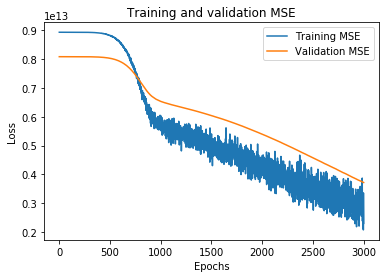

In [32]:
acc3 = history3.history['mean_absolute_error']
val_acc3 = history3.history['val_mean_absolute_error']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es por "blue dot"
plt.plot(epochs, loss3, label='Training MSE')
# b es por "solid blue line"
plt.plot(epochs, val_loss3, label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

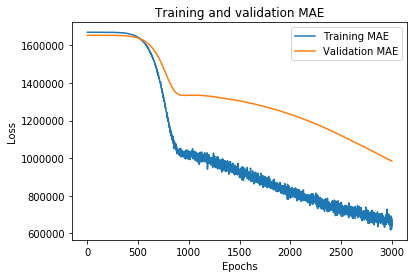

In [33]:
plt.plot(epochs, acc3, label='Training MAE')
# b es por "solid blue line"
plt.plot(epochs, val_acc3, label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()